#### Starting Setup

In [1]:
pip install --no-binary :all: aesara

### Correlation Matrix

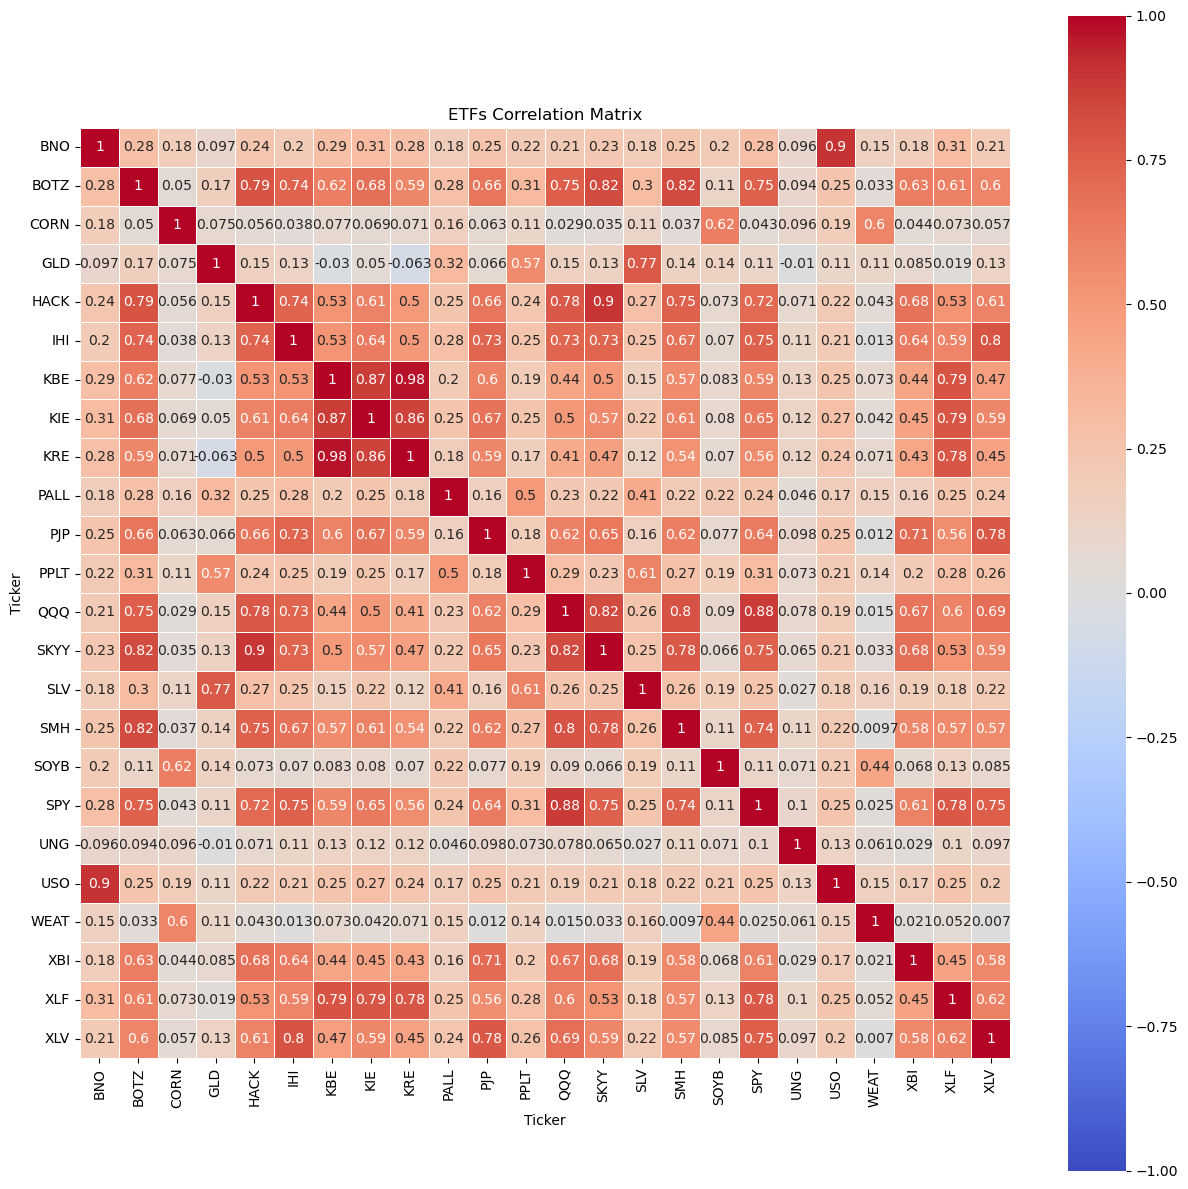

NameError: name 'sectors' is not defined

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib. pyplot as plt

# Load your data
df = pd.read_excel('etf_ei_merged_data.xlsx')

# Calculate daily returns for the whole dataset
daily_returns = df.pivot(index='Date', columns='Ticker', values='Close').pct_change().dropna()

# Correlation matrix for ETFs
etf_corr = daily_returns.corr()

# Plot the correlation matrix for ETFs
plt.figure(figsize=(15,15))
sns.heatmap(etf_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title('ETFs Correlation Matrix')
plt.show()

# Calculate sector-wise daily returns
sector_daily_returns = pd.DataFrame(index=daily_returns.index, columns=sectors)

for sector in sectors:
    tickers_in_sector = [ticker for ticker, sec in ticker_to_sector.items() if sec == sector]
    sector_daily_returns[sector] = daily_returns[tickers_in_sector].mean(axis=1)  # Taking mean of ETFs in the sector

# Correlation matrix for sectors
sector_corr = sector_daily_returns.corr()

# Plot the correlation matrix for sectors
plt.figure(figsize=(10,10))
sns.heatmap(sector_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title('Sectors Correlation Matrix')
plt.show()


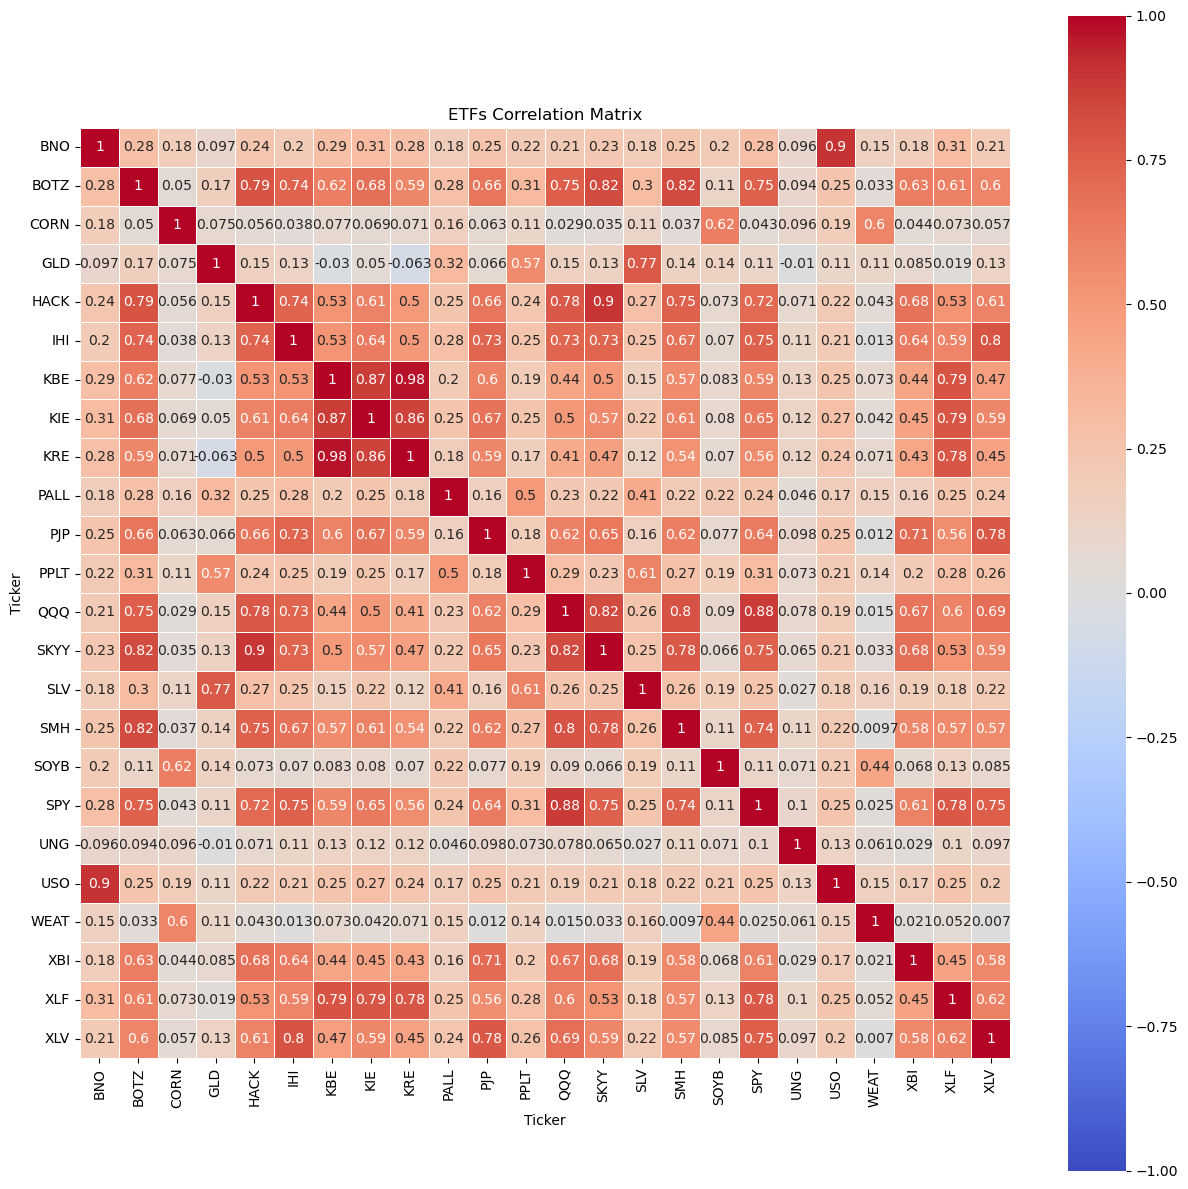

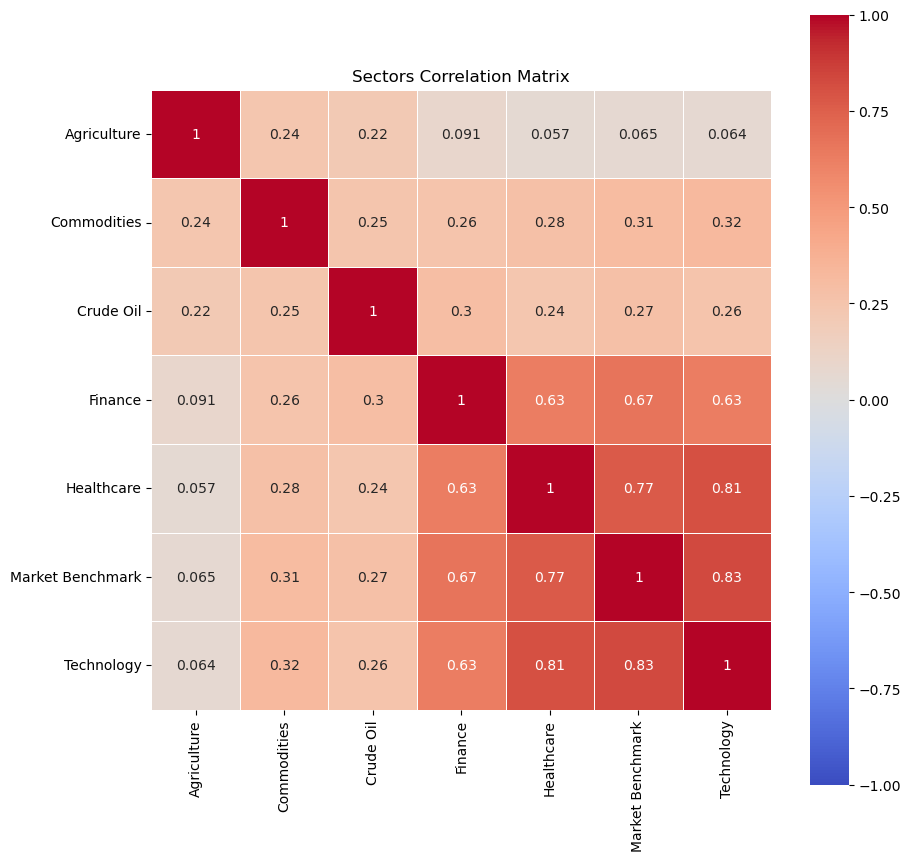

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df = pd.read_excel('etf_ei_merged_data.xlsx')

# Calculate daily returns for the whole dataset
daily_returns = df.pivot(index='Date', columns='Ticker', values='Close').pct_change().dropna()

# Correlation matrix for ETFs
etf_corr = daily_returns.corr()

# Plot the correlation matrix for ETFs
plt.figure(figsize=(15,15))
sns.heatmap(etf_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title('ETFs Correlation Matrix')
plt.show()

# Define sectors and ticker_to_sector variables
sectors = df['Sector'].unique()
ticker_to_sector = dict(zip(df['Ticker'], df['Sector']))

# Calculate sector-wise daily returns
sector_daily_returns = pd.DataFrame(index=daily_returns.index)

for sector in sectors:
    tickers_in_sector = [ticker for ticker, sec in ticker_to_sector.items() if sec == sector]
    sector_daily_returns[sector] = daily_returns[tickers_in_sector].mean(axis=1)  # Taking mean of ETFs in the sector

# Correlation matrix for sectors
sector_corr = sector_daily_returns.corr()

# Plot the correlation matrix for sectors
plt.figure(figsize=(10,10))
sns.heatmap(sector_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title('Sectors Correlation Matrix')
plt.show()

In [ ]:
sectors_tickers = {
        "Commodities": ["GLD", "SLV", "PPLT", "PALL","UNG"],
        "Agriculture": ["CORN", "SOYB", "WEAT"],
        "Crude Oil": ["USO", "BNO"],
        "Technology": ["QQQ", "SMH", "HACK","SKYY","BOTZ"],
        "Finance": ["XLF","KBE", "KRE", "KIE"],
        "Healthcare": ["XLV", "XBI", "PJP","IHI"],
        "Market Benchmark": ["SPY"]
        # Add more sectors and their tickers here
    }

C:\Users\saide\AppData\Local\Temp\ipykernel_7984\2864298455.py:22: FutureWarning: The `testval` argument is deprecated; use `initval`.
  epsilon = pm.HalfCauchy('epsilon', beta=10, testval=1.)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [epsilon, alpha_global, alpha_sector, alpha_etf_Commodities, alpha_etf_Agriculture, alpha_etf_Crude Oil, alpha_etf_Technology, alpha_etf_Finance, alpha_etf_Healthcare, alpha_etf_Market Benchmark]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 2793 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 942 divergences after tuning. Increase `target_accept` or reparameterize.
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


array([[<Axes: title={'center': 'alpha_global'}>,
        <Axes: title={'center': 'alpha_global'}>],
       [<Axes: title={'center': 'alpha_sector'}>,
        <Axes: title={'center': 'alpha_sector'}>],
       [<Axes: title={'center': 'alpha_etf_Commodities'}>,
        <Axes: title={'center': 'alpha_etf_Commodities'}>],
       [<Axes: title={'center': 'alpha_etf_Agriculture'}>,
        <Axes: title={'center': 'alpha_etf_Agriculture'}>],
       [<Axes: title={'center': 'alpha_etf_Crude Oil'}>,
        <Axes: title={'center': 'alpha_etf_Crude Oil'}>],
       [<Axes: title={'center': 'alpha_etf_Technology'}>,
        <Axes: title={'center': 'alpha_etf_Technology'}>],
       [<Axes: title={'center': 'alpha_etf_Finance'}>,
        <Axes: title={'center': 'alpha_etf_Finance'}>],
       [<Axes: title={'center': 'alpha_etf_Healthcare'}>,
        <Axes: title={'center': 'alpha_etf_Healthcare'}>],
       [<Axes: title={'center': 'alpha_etf_Market Benchmark'}>,
        <Axes: title={'center': 'alp

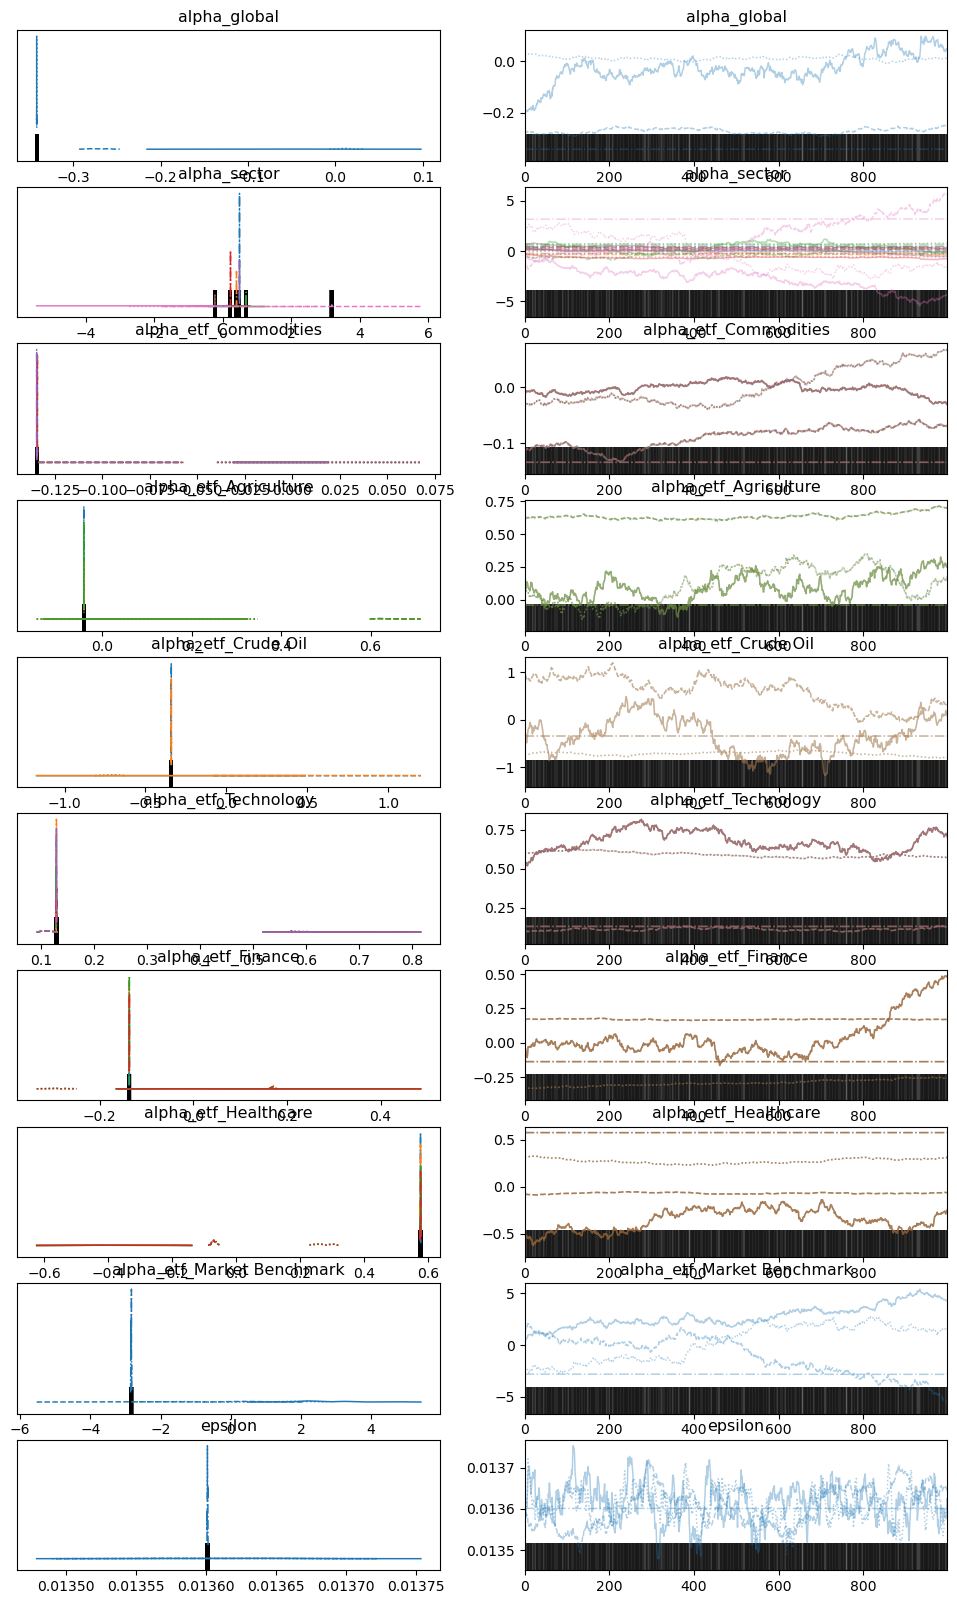

In [9]:
import pandas as pd
import pymc as pm
import aesara.tensor as at
import arviz as az


# Load your data
df = pd.read_excel('etf_ei_merged_data.xlsx')

sectors_tickers = {
    "Commodities": ["GLD", "SLV", "PPLT", "PALL","UNG"],
    "Agriculture": ["CORN", "SOYB", "WEAT"],
    "Crude Oil": ["USO", "BNO"],
    "Technology": ["QQQ", "SMH", "HACK","SKYY","BOTZ"],
    "Finance": ["XLF","KBE", "KRE", "KIE"],
    "Healthcare": ["XLV", "XBI", "PJP","IHI"],
    "Market Benchmark": ["SPY"]
}

with pm.Model() as model:
    # Priors
    epsilon = pm.HalfCauchy('epsilon', beta=10, testval=1.)
    alpha_global = pm.Normal('alpha_global', mu=0, sigma=10)
    alpha_sector = pm.Normal('alpha_sector', mu=0, sigma=10, shape=len(sectors_tickers))
    
    obs = []
    for i, (sector, tickers) in enumerate(sectors_tickers.items()):
        alpha_etf = pm.Normal(f'alpha_etf_{sector}', mu=0, sigma=10, shape=len(tickers))
        
        for j, ticker in enumerate(tickers):
            mu = alpha_global + alpha_sector[i] + alpha_etf[j]
            ticker_data = df[df['Ticker'] == ticker]['daily_return']
            
            # Likelihood
            obs.append(pm.Normal(f'returns_{ticker}', mu=mu, sigma=epsilon, observed=ticker_data))
    
    # Sampling
    trace = pm.sample(1000, tune=500, target_accept=0.95)

# Posterior Analysis
az.plot_trace(trace)


In [16]:
pip install --upgrade arviz

Note: you may need to restart the kernel to use updated packages.


In [15]:
df.describe()

Date          Open          High           Low  \
count                43824  43824.000000  43824.000000  43824.000000   
mean   2020-07-01 12:00:00     79.447525     80.094649     78.722484   
min    2018-01-01 00:00:00      4.880000      4.960000      4.830000   
25%    2019-04-02 00:00:00     24.580000     24.858751     24.290001   
50%    2020-07-01 12:00:00     51.880000     52.335834     51.345278   
75%    2021-10-01 00:00:00     95.599998     96.421665     94.639999   
max    2022-12-31 00:00:00    479.220001    479.980011    476.059998   
std                    NaN     83.724420     84.297746     83.059088   

              Close     Adj Close        Volume    log_return  daily_return  \
count  43824.000000  43824.000000  4.382400e+04  43824.000000  43824.000000   
mean      79.430348     77.524156  1.119298e+07      0.000130      0.000223   
min        4.860000      4.860000  2.800000e+03     -0.142914     -0.133171   
25%       24.605000     23.938191  1.939000e+05     -0.004862     -0.004850   
50%       51.827500     49.170349  1.700900e+06      0.000258      0.000258   
75%       95.489998     94.874357  8.810000e+06      0.005337      0.005351   
max      477.709991    464.923401  2.189132e+08      0.190983      0.210439   
std       83.708333     81.514525  2.327038e+07      0.013615      0.013605   

         volatility      momentum     Direction         MA_50        MA_100  \
count  43824.000000  43824.000000  43824.000000  43824.000000  43824.000000   
mean       0.011623      0.005093      0.512778     79.118215     78.787490   
min        0.000003     -0.603352      0.000000      5.110933      5.211500   
25%        0.007079     -0.027187      0.000000     24.527129     24.557175   
50%        0.010091      0.008192      1.000000     51.895616     51.969188   
75%        0.014318      0.039724      1.000000     94.783200     94.528308   
max        0.073483      0.597878      1.000000    466.792103    463.259501   
std        0.006821      0.066887      0.499842     83.265191     82.815795   

             MA_200           bci           cci           cli  long_term_ir  \
count  43824.000000  43824.000000  43824.000000  43824.000000  43824.000000   
mean      78.056709    100.481762     99.627084     99.645119      2.057829   
min        5.339500     98.167170     96.134230     92.625770      0.620000   
25%       24.330281     99.528110     98.357870     98.999913      1.416774   
50%       51.698338    100.765445     99.740621     99.836504      1.856774   
75%       94.180950    101.391361    101.385000    100.784284      2.876774   
max      453.177159    101.996100    101.642500    101.314000      3.980000   
std       81.847351      1.049672      1.783538      1.531893      0.889272   

       short_term_ir  
count   43824.000000  
mean        1.445504  
min         0.090000  
25%         0.161613  
50%         1.667621  
75%         2.248387  
max         4.508387  
std         1.144198

In [16]:
import pandas as pd

# Read the Excel file into a Pandas DataFrame
df = pd.read_excel('etf_ei_merged_data.xlsx')

# Create a dictionary to store the unique values for each column
unique_values = {}

# Iterate over the columns in the DataFrame
for column in df.columns:

    # Get the unique values in the column
    unique_values[column] = df[column].unique()

# Print the unique values for each column
for column, values in unique_values.items():
    print(f'Column: {column}')
    print(f'Number of unique values: {len(values)}')
    print(f'Unique values: {values}')
    print('\n')

Column: Date
Number of unique values: 1826
Unique values: <DatetimeArray>
['2018-01-01 00:00:00', '2018-01-02 00:00:00', '2018-01-03 00:00:00',
 '2018-01-04 00:00:00', '2018-01-05 00:00:00', '2018-01-06 00:00:00',
 '2018-01-07 00:00:00', '2018-01-08 00:00:00', '2018-01-09 00:00:00',
 '2018-01-10 00:00:00',
 ...
 '2022-12-22 00:00:00', '2022-12-23 00:00:00', '2022-12-24 00:00:00',
 '2022-12-25 00:00:00', '2022-12-26 00:00:00', '2022-12-27 00:00:00',
 '2022-12-28 00:00:00', '2022-12-29 00:00:00', '2022-12-30 00:00:00',
 '2022-12-31 00:00:00']
Length: 1826, dtype: datetime64[ns]


Column: Open
Number of unique values: 27121
Unique values: [ 16.75        17.97500086   6.         ... 380.64001465 263.61999512
 100.34999847]


Column: High
Number of unique values: 27677
Unique values: [ 16.85999966  18.00000048   6.07499993 ... 266.41000366  57.63000107
 101.60500336]


Column: Low
Number of unique values: 27513
Unique values: [ 16.74499989  17.7949996    5.99000001 ...  58.34999847 378.4299

In [ ]:
pip install arviz

In [1]:
pip install "arviz[all]"

  Obtaining dependency information for netcdf4 from https://files.pythonhosted.org/packages/f0/ef/39f1e32c623abbcff8fef81e484abafc74779388144540b804d96f0657cc/netCDF4-1.6.4-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/18.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/18.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/18.5 MB ? eta -:--:--
     --------------------------------------- 0.0/18.5 MB 217.9 kB/s eta 0:01:25
     --------------------------------------- 0.1/18.5 MB 363.1 kB/s eta 0:00:51
     --------------------------------------- 0.1/18.5 MB 504.4 kB/s eta 0:00:37
     --------------------------------------- 0.2/18.5 MB 701.4 kB/s eta 0:00:27
      -------------------------------------- 0.3/18.5 MB 980.4 kB/s eta 0:00:19
      -------------------------------------- 0.3/18.5 MB 905.4 kB/s eta 0:00:21
      --------------------------------------- 0.4/18.5 MB 1.0 MB/s eta 0:00:18
      -----------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [10]:
import pandas as pd
import pymc as pm
import aesara.tensor as at
import arviz as az

# Load your data
df = pd.read_excel('etf_ei_merged_data.xlsx')

sectors_tickers = {
    "Commodities": ["GLD", "SLV", "PPLT", "PALL","UNG"],
    "Agriculture": ["CORN", "SOYB", "WEAT"],
    "Crude Oil": ["USO", "BNO"],
    "Technology": ["QQQ", "SMH", "HACK","SKYY","BOTZ"],
    "Finance": ["XLF","KBE", "KRE", "KIE"],
    "Healthcare": ["XLV", "XBI", "PJP","IHI"],
    "Market Benchmark": ["SPY"]
}
with pm.Model() as model:
    epsilon = pm.HalfCauchy('epsilon', beta=10, testval=1.)
    alpha_global = pm.Normal('alpha_global', mu=0, sigma=10)
    alpha_sector = pm.Normal('alpha_sector', mu=0, sigma=10, shape=len(sectors_tickers))
    
    # Include economic indicators as covariates (optional but can improve model)
    bci_coef = pm.Normal('bci_coef', mu=0, sigma=1)
    cci_coef = pm.Normal('cci_coef', mu=0, sigma=1)
    cli_coef = pm.Normal('cli_coef', mu=0, sigma=1)
    
    for i, (sector, tickers) in enumerate(sectors_tickers.items()):
        alpha_etf = pm.Normal(f'alpha_etf_{sector}', mu=0, sigma=10, shape=len(tickers))
        
        for j, ticker in enumerate(tickers):
            subset_data = df[df['Ticker'] == ticker]
            mu = (alpha_global + alpha_sector[i] + alpha_etf[j] +
                  bci_coef * subset_data['bci'] + 
                  cci_coef * subset_data['cci'] + 
                  cli_coef * subset_data['cli'])
            
            # Likelihood
            pm.Normal(f'returns_{ticker}', mu=mu, sigma=epsilon, observed=subset_data['daily_return'])
    
    # Sampling
    trace = pm.sample(1000, tune=500, target_accept=0.95)

# Convert the PyMC3 trace to an ArviZ InferenceData object
idata = az.from_pymc3(trace)

# Visualizing the trace
az.plot_trace(idata)

# Summary statistics
summary = az.summary(idata)
print(summary)


C:\Users\saide\AppData\Local\Temp\ipykernel_32084\1699316296.py:19: FutureWarning: The `testval` argument is deprecated; use `initval`.
  epsilon = pm.HalfCauchy('epsilon', beta=10, testval=1.)
C:\Users\saide\anaconda3\envs\pymc_env\Lib\site-packages\multipledispatch\dispatcher.py:27: AmbiguityWarning: 
Ambiguities exist in dispatched function _unify

The following signatures may result in ambiguous behavior:
	[object, ConstrainedVar, Mapping], [ConstrainedVar, Var, Mapping]
	[object, ConstrainedVar, Mapping], [ConstrainedVar, object, Mapping]
	[ConstrainedVar, Var, Mapping], [object, ConstrainedVar, Mapping]
	[object, ConstrainedVar, Mapping], [ConstrainedVar, object, Mapping]


Consider making the following additions:

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...

Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 4720 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 1776 divergences after tuning. Increase `target_accept` or reparameterize.
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


AttributeError: module 'arviz' has no attribute 'from_pymc3'

                                mean     sd  hdi_3%  hdi_97%  mcse_mean  \
alpha_global                   0.261  0.508  -0.473    0.834      0.253   
alpha_sector[0]               -0.150  0.394  -0.786    0.255      0.196   
alpha_sector[1]                0.391  0.183   0.120    0.630      0.087   
alpha_sector[2]                0.123  0.422  -0.318    0.588      0.210   
alpha_sector[3]                0.110  0.194  -0.215    0.275      0.096   
alpha_sector[4]                0.309  0.307  -0.014    0.777      0.153   
alpha_sector[5]               -0.293  0.201  -0.529   -0.007      0.099   
alpha_sector[6]                0.028  0.335  -0.364    0.476      0.166   
bci_coef                      -0.001  0.005  -0.009    0.006      0.003   
cci_coef                      -0.000  0.001  -0.002    0.002      0.001   
cli_coef                      -0.000  0.001  -0.002    0.001      0.001   
alpha_etf_Commodities[0]       0.086  0.357  -0.363    0.505      0.178   
alpha_etf_Commodities[1] 

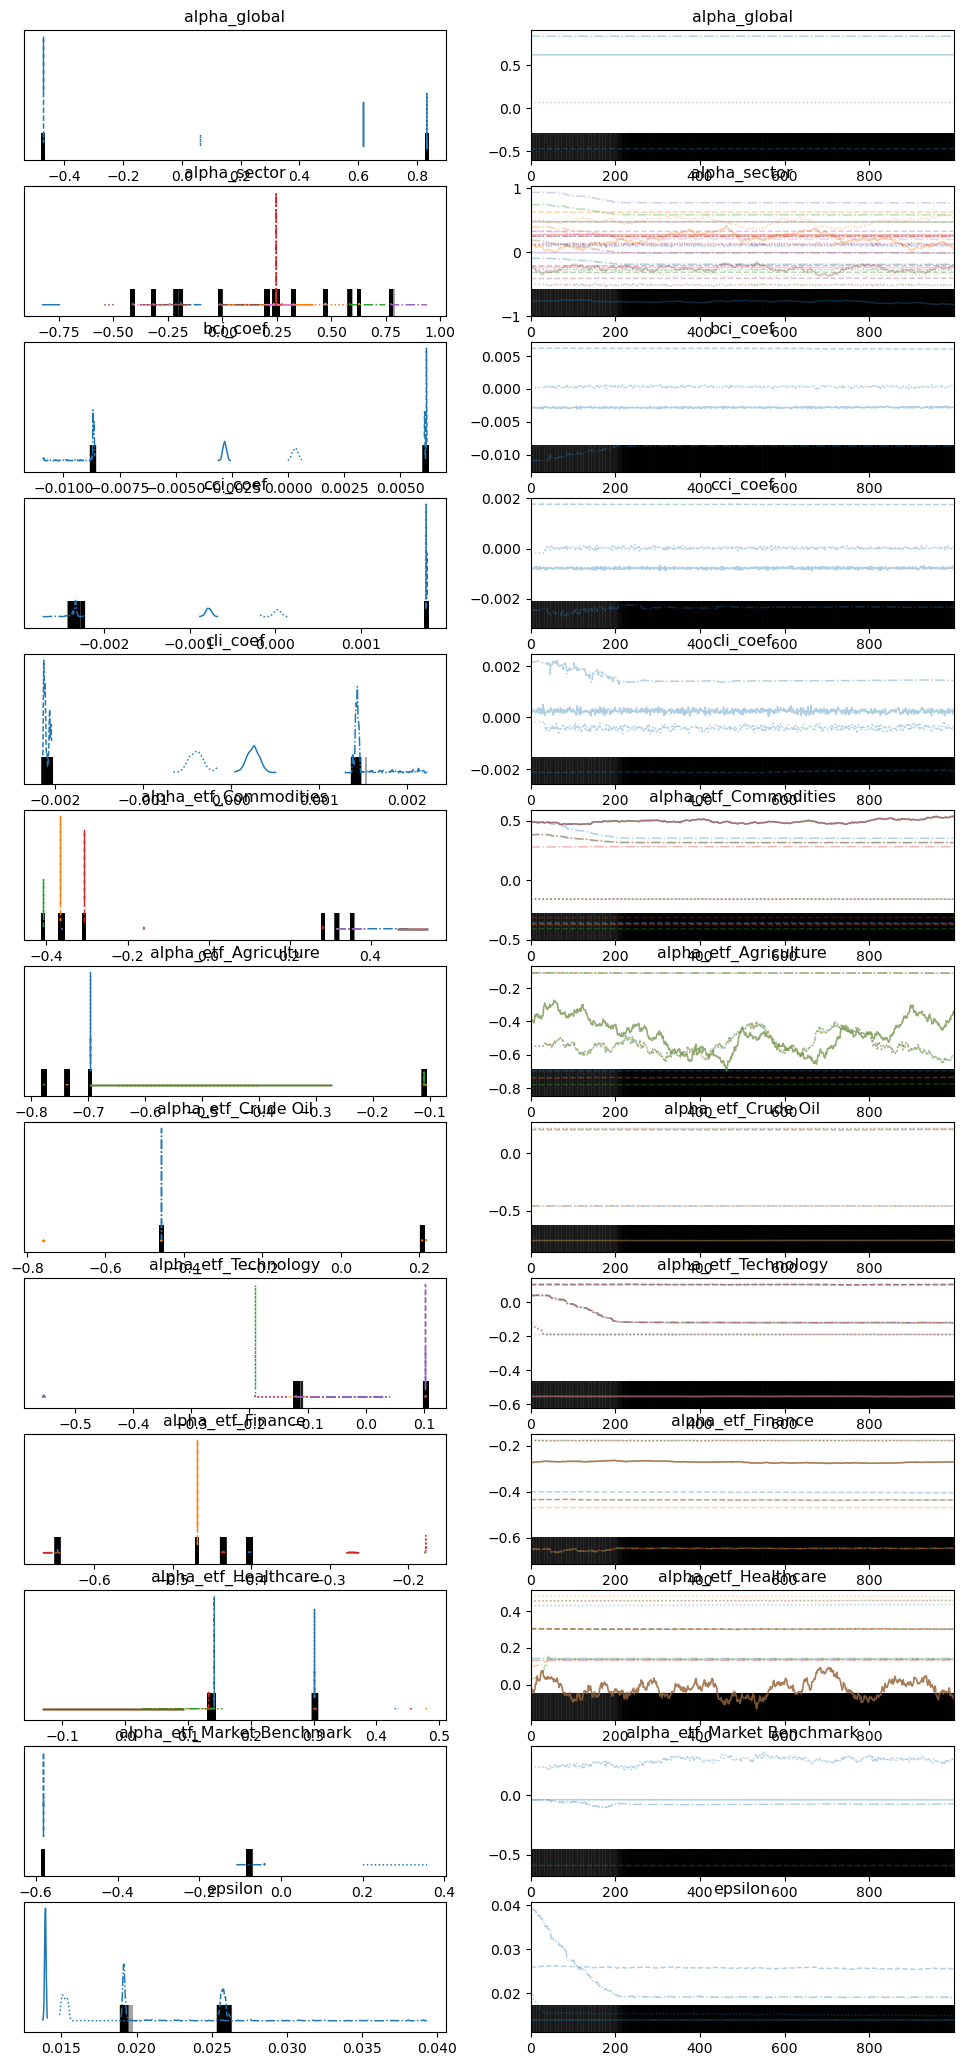

In [12]:
# Traceplot
pm.plot_trace(trace)

# Summary
summary = pm.summary(trace)
print(summary)

#### Improving sampling, intialization and diagnostics

In [13]:
import pandas as pd
import pymc as pm
import aesara.tensor as at
import arviz as az

# Load your data
df = pd.read_excel('etf_ei_merged_data.xlsx')

sectors_tickers = {
    "Commodities": ["GLD", "SLV", "PPLT", "PALL","UNG"],
    "Agriculture": ["CORN", "SOYB", "WEAT"],
    "Crude Oil": ["USO", "BNO"],
    "Technology": ["QQQ", "SMH", "HACK","SKYY","BOTZ"],
    "Finance": ["XLF","KBE", "KRE", "KIE"],
    "Healthcare": ["XLV", "XBI", "PJP","IHI"],
    "Market Benchmark": ["SPY"]
}

dims = {
    "alpha_sector": ["sector"],
    "alpha_etf": ["ticker"],
    "returns": ["ticker"]
}

with pm.Model(coords={"sector": list(sectors_tickers.keys()), "ticker": df['Ticker'].unique()}) as model:
    # Priors
    epsilon = pm.HalfCauchy('epsilon', beta=10, testval=1.)
    alpha_global = pm.Normal('alpha_global', mu=0, sigma=10)
    alpha_sector = pm.Normal('alpha_sector', mu=0, sigma=10, shape=len(sectors_tickers), dims=dims["alpha_sector"])
    
    for i, (sector, tickers) in enumerate(sectors_tickers.items()):
        alpha_etf = pm.Normal(f'alpha_etf_{sector}', mu=0, sigma=10, shape=len(tickers), dims=dims["alpha_etf"])
        
        for j, ticker in enumerate(tickers):
            mu = alpha_global + alpha_sector[i] + alpha_etf[j]
            ticker_data = df[df['Ticker'] == ticker]['daily_return']
            
            # Likelihood
            pm.Normal(f'returns_{ticker}', mu=mu, sigma=epsilon, observed=ticker_data, dims=dims["returns"])
    
    # Extensive sampling
    trace = pm.sample(draws=3000, tune=1500, target_accept=0.99, init='adapt_diag')

# Posterior Analysis
az.plot_trace(trace)
summary = az.summary(trace, hdi_prob=0.94)  # using 94% HPD

C:\Users\saide\AppData\Local\Temp\ipykernel_32084\3628689270.py:27: FutureWarning: The `testval` argument is deprecated; use `initval`.
  epsilon = pm.HalfCauchy('epsilon', beta=10, testval=1.)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [epsilon, alpha_global, alpha_sector, alpha_etf_Commodities, alpha_etf_Agriculture, alpha_etf_Crude Oil, alpha_etf_Technology, alpha_etf_Finance, alpha_etf_Healthcare, alpha_etf_Market Benchmark]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 9215 seconds.


ValueError: conflicting sizes for dimension 'ticker': length 5 on the data but length 24 on coordinate 'ticker'

### Simplifying the model and post processing for time being

In [14]:
# Taking only one sector

import pandas as pd
import pymc as pm
import aesara.tensor as at
import arviz as az

# Load your data
df = pd.read_excel('etf_ei_merged_data.xlsx')

# For the sake of simplification, let's select only the 'Commodities' sector
sectors_tickers = {
    "Commodities": ["GLD", "SLV", "PPLT", "PALL","UNG"],
}

dims = {
    "alpha_sector": ["sector"],
    "alpha_etf": ["ticker"],
    "returns": ["ticker"]
}

with pm.Model(coords={"sector": list(sectors_tickers.keys()), "ticker": df['Ticker'].unique()}) as model:
    # Priors
    epsilon = pm.HalfCauchy('epsilon', beta=10, testval=1.)
    alpha_global = pm.Normal('alpha_global', mu=0, sigma=10)
    alpha_sector = pm.Normal('alpha_sector', mu=0, sigma=10, shape=len(sectors_tickers), dims=dims["alpha_sector"])
    
    for i, (sector, tickers) in enumerate(sectors_tickers.items()):
        alpha_etf = pm.Normal(f'alpha_etf_{sector}', mu=0, sigma=10, shape=len(tickers), dims=dims["alpha_etf"])
        
        for j, ticker in enumerate(tickers):
            mu = alpha_global + alpha_sector[i] + alpha_etf[j]
            ticker_data = df[df['Ticker'] == ticker]['daily_return']
            
            # Likelihood
            pm.Normal(f'returns_{ticker}', mu=mu, sigma=epsilon, observed=ticker_data, dims=dims["returns"])
    
    # Extensive sampling
    trace = pm.sample(draws=3000, tune=1500, target_accept=0.99, init='adapt_diag')

# Posterior Analysis
az.plot_trace(trace)
summary = az.summary(trace, hdi_prob=0.94)  # using 94% HPD as discussed


C:\Users\saide\AppData\Local\Temp\ipykernel_32084\1153912558.py:24: FutureWarning: The `testval` argument is deprecated; use `initval`.
  epsilon = pm.HalfCauchy('epsilon', beta=10, testval=1.)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [epsilon, alpha_global, alpha_sector, alpha_etf_Commodities]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 2648 seconds.


ValueError: conflicting sizes for dimension 'ticker': length 5 on the data but length 24 on coordinate 'ticker'

### Working Model - Single Ticker 

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 62 seconds.


array([[<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>],
       [<Axes: title={'center': 'epsilon'}>,
        <Axes: title={'center': 'epsilon'}>]], dtype=object)

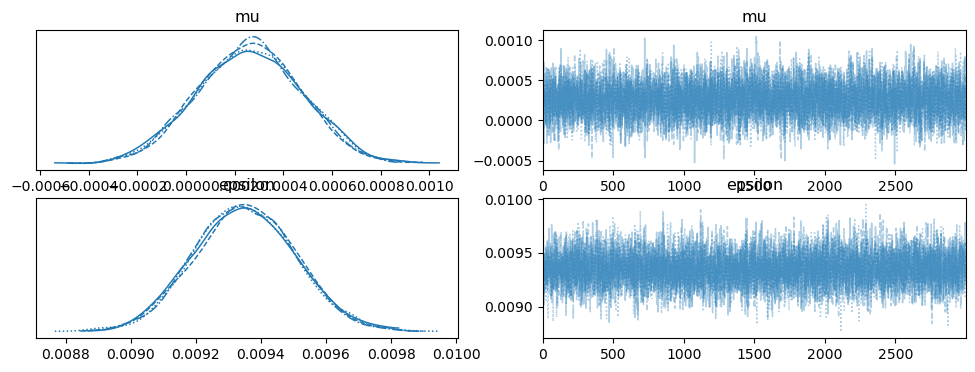

In [18]:
import pymc as pm
import pandas as pd
import numpy as np
import arviz as az

# Assuming you've already loaded your data into a dataframe named df
ticker_data = df[df['Ticker'] == 'CORN']

# Calculate mean and standard deviation for the log return of this ticker
mu_prior_mean = ticker_data['log_return'].mean()
mu_prior_std = ticker_data['log_return'].std()

with pm.Model() as model:
    # Priors for unknown model parameters
    mu = pm.Normal('mu', mu=mu_prior_mean, sigma=mu_prior_std) # Changed 'sd' to 'sigma'
    epsilon = pm.HalfCauchy('epsilon', beta=10)
    
    # Likelihood (sampling distribution) of observations
    returns_obs = pm.Normal('returns_obs', mu=mu, sigma=epsilon, observed=ticker_data['log_return']) # Changed 'sd' to 'sigma'
    
    # Sampling from the model
    trace = pm.sample(draws=3000, tune=1500, target_accept=0.99, init='adapt_diag')
    
# Posterior Analysis
az.plot_trace(trace)

In [19]:
import arviz as az

# Generate the summary
summary = az.summary(trace, round_to=2)

# Print the summary
print(summary)

         mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu       0.00  0.0   -0.00     0.00        0.0      0.0   6896.50   5908.44   
epsilon  0.01  0.0    0.01     0.01        0.0      0.0   6240.59   5582.06   

         r_hat  
mu         1.0  
epsilon    1.0  


In [ ]:
# Basic setup , running for all tickers

In [20]:
import pymc as pm
import pandas as pd
import numpy as np
import arviz as az

# Load the data into a dataframe named df
# Assuming this is already done

# Get the unique tickers
tickers = df['Ticker'].unique()

# Dictionary to store results for each ticker
results = {}

for ticker in tickers:
    ticker_data = df[df['Ticker'] == ticker]
    
    # Calculate mean and standard deviation for the log return of the current ticker
    mu_prior_mean = ticker_data['log_return'].mean()
    mu_prior_std = ticker_data['log_return'].std()

    with pm.Model() as model:
        # Priors for unknown model parameters
        mu = pm.Normal('mu', mu=mu_prior_mean, sigma=mu_prior_std)  # Used 'sigma' instead of 'sd'
        epsilon = pm.HalfCauchy('epsilon', beta=10)
        
        # Likelihood (sampling distribution) of observations
        returns_obs = pm.Normal('returns_obs', mu=mu, sigma=epsilon, observed=ticker_data['log_return'])
        
        # Sampling from the model
        trace = pm.sample(draws=3000, tune=1500, target_accept=0.99, init='adapt_diag')

        # Generate the summary
        summary = az.summary(trace, round_to=2)
        results[ticker] = summary

# Now, you can print the summary for each ticker
for ticker, summary in results.items():
    print(f"\nResults for ticker {ticker}:\n", summary)

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 60 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 50 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 48 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 46 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 47 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 56 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 47 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 53 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 54 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 62 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 48 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 48 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 45 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 51 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 45 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 57 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 66 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 62 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 65 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 68 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 69 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 71 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 78 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 84 seconds.



Results for ticker CORN:
          mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu       0.00  0.0   -0.00     0.00        0.0      0.0   5770.79   5409.06   
epsilon  0.01  0.0    0.01     0.01        0.0      0.0   6135.44   5533.14   

         r_hat  
mu         1.0  
epsilon    1.0  

Results for ticker SOYB:
          mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu       0.00  0.0   -0.00     0.00        0.0      0.0   6435.77   5727.67   
epsilon  0.01  0.0    0.01     0.01        0.0      0.0   6682.93   5918.38   

         r_hat  
mu         1.0  
epsilon    1.0  

Results for ticker WEAT:
          mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu       0.00  0.0   -0.00     0.00        0.0      0.0   6438.63   5549.46   
epsilon  0.01  0.0    0.01     0.01        0.0      0.0   5647.09   5487.98   

         r_hat  
mu         1.0  
epsilon    1.0  

Results for ticker GLD:
          mean   sd  hdi_3%

In [ ]:
# Simple Model like BL model

    Mean (mu) of Returns:
        The mean return (mu) is very close to zero for all tickers, which implies that the expected daily return for each of the tickers is approximately zero. This is quite common for daily returns as stock prices tend to have random walk behavior.

    Volatility (epsilon):
        epsilon represents the volatility of the returns. It's evident that all the tickers have similar volatilities, mostly around 0.01 or 0.02. Volatility is a measure of the risk associated with the returns of an investment.

    Effective Sample Size (ess_bulk and ess_tail):
        These are used to determine the effectiveness of the Markov Chain Monte Carlo (MCMC) sampling. A higher value indicates that the MCMC sampling has been more effective. For all the tickers, these values are quite high (typically in the range of 5000 to 7000). This suggests that the sampling has been effective for all the tickers.

    R-hat (r_hat):
        The R-hat values are all 1.0, which is perfect. This statistic is used to check the convergence of the MCMC chains. A value of 1.0 suggests that the chains have converged well. If this value deviates from 1.0, it's an indicator that the chains haven't mixed well, and the results might not be reliable. Since all tickers have R-hat as 1.0, this means the results are reliable.

    Highest Posterior Density Interval (hdi_3% and hdi_97%):
        This represents the interval within which the true parameter value lies with a certain probability. In this case, for almost all tickers, both mu and epsilon have the interval very close to their mean values, implying that the model is quite certain about the estimates.

    Monte Carlo Standard Error (mcse_mean and mcse_sd):
        These are close to 0 for all the tickers, indicating that the Monte Carlo estimation of the posterior means and standard deviations are accurate.

    Mean (mu) of Returns:
        The mean return (mu) is very close to zero for all tickers, which implies that the expected daily return for each of the tickers is approximately zero. This is quite common for daily returns as stock prices tend to have random walk behavior.

    Volatility (epsilon):
        epsilon represents the volatility of the returns. It's evident that all the tickers have similar volatilities, mostly around 0.01 or 0.02. Volatility is a measure of the risk associated with the returns of an investment.

    Effective Sample Size (ess_bulk and ess_tail):
        These are used to determine the effectiveness of the Markov Chain Monte Carlo (MCMC) sampling. A higher value indicates that the MCMC sampling has been more effective. For all the tickers, these values are quite high (typically in the range of 5000 to 7000). This suggests that the sampling has been effective for all the tickers.

    R-hat (r_hat):
        The R-hat values are all 1.0, which is perfect. This statistic is used to check the convergence of the MCMC chains. A value of 1.0 suggests that the chains have converged well. If this value deviates from 1.0, it's an indicator that the chains haven't mixed well, and the results might not be reliable. Since all tickers have R-hat as 1.0, this means the results are reliable.

    Highest Posterior Density Interval (hdi_3% and hdi_97%):
        This represents the interval within which the true parameter value lies with a certain probability. In this case, for almost all tickers, both mu and epsilon have the interval very close to their mean values, implying that the model is quite certain about the estimates.

    Monte Carlo Standard Error (mcse_mean and mcse_sd):
        These are close to 0 for all the tickers, indicating that the Monte Carlo estimation of the posterior means and standard deviations are accurate.



In [21]:
import pymc as pm
import numpy as np

# Load the data and set up similarly as above
df = pd.read_excel('etf_ei_merged_data.xlsx')
train_pct = 0.8
train_size = int(train_pct * len(df))
df_train = df.iloc[:train_size]

prices = df_train.pivot(index='Date', columns='Ticker', values='Close')

# Map tickers to sector indices for the hierarchical model
unique_sectors = df_train['Sector'].unique().tolist()
ticker_to_sector = df_train[['Ticker', 'Sector']].drop_duplicates().set_index('Ticker').to_dict()['Sector']
sector_indices = [unique_sectors.index(ticker_to_sector[ticker]) for ticker in prices.columns]

n_sectors = len(unique_sectors)
n_tickers = len(prices.columns)

# Bayesian Hierarchical Model
with pm.Model() as bayesian_hierarchical_model:
    
    # Hyperpriors for sector return means and standard deviations
    mu_hyper_sd = pm.HalfCauchy('mu_hyper_sd', beta=1)
    mu_hyper_mu = pm.Normal('mu_hyper_mu', mu=0, sd=1)
    
    # Sector-level priors for return means
    sector_mu = pm.Normal('sector_mu', mu=mu_hyper_mu, sigma=mu_hyper_sd, shape=n_sectors)
    
    # Stock-level priors for return means (based on their sector)
    epsilon = pm.HalfCauchy('epsilon', beta=1, shape=n_tickers)
    stock_mu = pm.Normal('stock_mu', mu=sector_mu[sector_indices], sd=epsilon, shape=n_tickers)
    
    # Observations - daily returns
    stock_returns = pm.Normal('stock_returns', mu=stock_mu, sd=epsilon, observed=prices.pct_change().dropna().values)

with bayesian_hierarchical_model:
    for ticker, view_return in views.items():
        ticker_idx = prices.columns.tolist().index(ticker)
        pm.Normal(f'view_{ticker}', mu=view_return, sd=0.01, observed=stock_mu[ticker_idx])
        
with bayesian_hierarchical_model:
    trace = pm.sample(1000, tune=500)
    
pm.traceplot(trace)
pm.summary(trace)

TypeError: RandomVariable.make_node() got an unexpected keyword argument 'sd'

### Improvements 22_October_2023

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sector_alpha, sector_sigma, etf_alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 68 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 879 divergences after tuning. Increase `target_accept` or reparameterize.


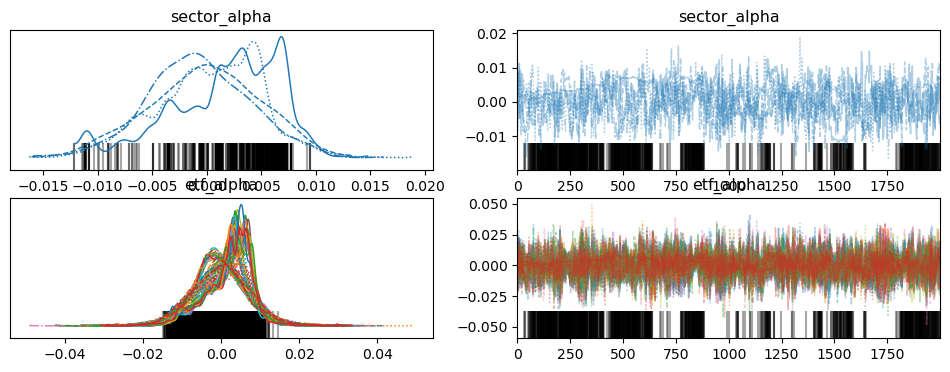

KeyError: 'mu'

In [1]:
import pymc as pm
import pandas as pd
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel('etf_ei_merged_data.xlsx')
df['Date'] = pd.to_datetime(df['Date'])

# Filtering data from 2018 to 2022
df_train = df[(df['Date'] >= '2018-01-01') & (df['Date'] <= '2022-12-31')]

# Set up a list of unique sectors and ETFs
sectors = df_train['Sector'].unique().tolist()
etfs = df_train['Ticker'].unique().tolist()

# Given the setup from your BL model, let's integrate the views
# This will act as a starting point for our priors in the Bayesian Hierarchical Model
# [Using the views dictionary you generated from BL model]
views = {}
# [Insert all the views logic here, as given in the Black-Litterman code you provided]

# Convert views into means for priors
priors_mean = {ticker: 0 for ticker in etfs}
for ticker, view in views.items():
    priors_mean[ticker] = view

# Building the Bayesian Hierarchical Model
with pm.Model() as model:
    
    # Hyperpriors for sectors
    sector_alpha = pm.Normal('sector_alpha', mu=0, sigma=0.5)
    sector_sigma = pm.HalfNormal('sector_sigma', sigma=0.5)
    
    # ETF-specific parameters drawn from the sector distributions
    etf_alpha = pm.Normal('etf_alpha', mu=sector_alpha, sigma=sector_sigma, shape=len(etfs))
    
    # Implementing views as priors
    mu = pm.Deterministic('mu', etf_alpha + np.array([priors_mean[ticker] for ticker in etfs]))
    
    # Capture the observed data
    obs = []
    for idx, ticker in enumerate(etfs):
        returns = df_train[df_train['Ticker'] == ticker]['log_return'].values
        obs.append(pm.Normal(ticker, mu=mu[idx], observed=returns))
        
    # Sample
    trace = pm.sample(2000, tune=1000)

# Visualizing the results
az.plot_trace(trace, var_names=['sector_alpha', 'etf_alpha'])
plt.show()

# Extracting predicted returns
posterior_samples = trace['mu']
predicted_returns = np.mean(posterior_samples, axis=0)
predictions_df = pd.DataFrame({
    'Ticker': etfs,
    'Predicted_Return': predicted_returns
})

print(predictions_df)

In [ ]:
Error recifying

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sector_alpha, sector_sigma, etf_alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 382 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.


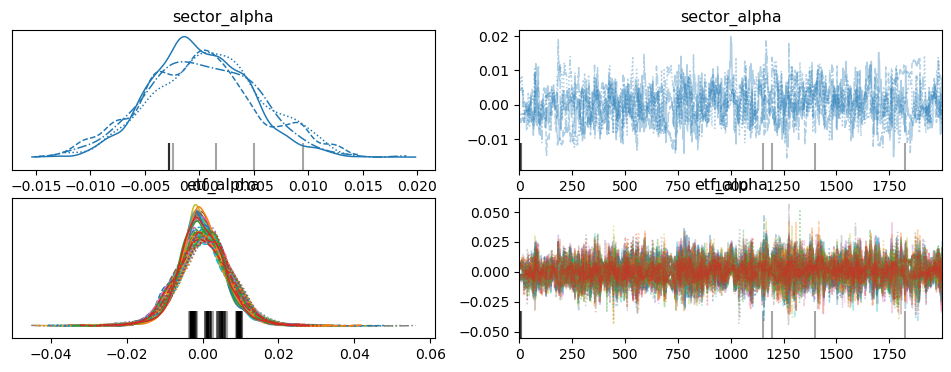

KeyError: 'etf_alpha'

In [8]:
import pymc as pm
import pandas as pd
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel('etf_ei_merged_data.xlsx')
df['Date'] = pd.to_datetime(df['Date'])

# Filtering data from 2018 to 2022
df_train = df[(df['Date'] >= '2018-01-01') & (df['Date'] <= '2022-12-31')]

# Set up a list of unique sectors and ETFs
sectors = df_train['Sector'].unique().tolist()
etfs = df_train['Ticker'].unique().tolist()

# Given the setup from your BL model, let's integrate the views
# This will act as a starting point for our priors in the Bayesian Hierarchical Model
# [Using the views dictionary you generated from BL model]
views = {}
# [Insert all the views logic here, as given in the Black-Litterman code you provided]

# Convert views into means for priors
priors_mean = {ticker: 0 for ticker in etfs}
for ticker, view in views.items():
    priors_mean[ticker] = view

# Building the Bayesian Hierarchical Model
with pm.Model() as model:
    
    # Hyperpriors for sectors
    sector_alpha = pm.Normal('sector_alpha', mu=0, sigma=0.5)
    sector_sigma = pm.HalfNormal('sector_sigma', sigma=0.5)
    
    # ETF-specific parameters drawn from the sector distributions
    etf_alpha = pm.Normal('etf_alpha', mu=sector_alpha, sigma=sector_sigma, shape=len(etfs))
    
    # Implementing views as priors
    mu = pm.Deterministic('mu', etf_alpha + np.array([priors_mean[ticker] for ticker in etfs]))
    
    # Capture the observed data
    obs = []
    for idx, ticker in enumerate(etfs):
        returns = df_train[df_train['Ticker'] == ticker]['log_return'].values
        obs.append(pm.Normal(ticker, mu=mu[idx], observed=returns))
        
    # Sample
    trace = pm.sample(2000, tune=1000,target_accept=0.99)

# Visualizing the results
az.plot_trace(trace, var_names=['sector_alpha', 'etf_alpha'])
plt.show()

# Extracting sampled values of etf_alpha
etf_alpha_samples = trace['etf_alpha']

# Recreating 'mu' using sampled etf_alpha and priors_mean
mu_samples = etf_alpha_samples + np.array([priors_mean[ticker] for ticker in etfs])

# Now, you can compute predicted returns as before:
predicted_returns = np.mean(mu_samples, axis=0)
predictions_df = pd.DataFrame({
    'Ticker': etfs,
    'Predicted_Return': predicted_returns
})

print(predictions_df)

# # Extracting predicted returns
# posterior_samples = trace['mu']
# predicted_returns = np.mean(posterior_samples, axis=0)
# predictions_df = pd.DataFrame({
#     'Ticker': etfs,
#     'Predicted_Return': predicted_returns
# })

# print(predictions_df)

In [9]:
print(az.summary(trace).index)

Index(['sector_alpha', 'etf_alpha[0]', 'etf_alpha[1]', 'etf_alpha[2]',
       'etf_alpha[3]', 'etf_alpha[4]', 'etf_alpha[5]', 'etf_alpha[6]',
       'etf_alpha[7]', 'etf_alpha[8]', 'etf_alpha[9]', 'etf_alpha[10]',
       'etf_alpha[11]', 'etf_alpha[12]', 'etf_alpha[13]', 'etf_alpha[14]',
       'etf_alpha[15]', 'etf_alpha[16]', 'etf_alpha[17]', 'etf_alpha[18]',
       'etf_alpha[19]', 'etf_alpha[20]', 'etf_alpha[21]', 'etf_alpha[22]',
       'etf_alpha[23]', 'sector_sigma', 'mu[0]', 'mu[1]', 'mu[2]', 'mu[3]',
       'mu[4]', 'mu[5]', 'mu[6]', 'mu[7]', 'mu[8]', 'mu[9]', 'mu[10]',
       'mu[11]', 'mu[12]', 'mu[13]', 'mu[14]', 'mu[15]', 'mu[16]', 'mu[17]',
       'mu[18]', 'mu[19]', 'mu[20]', 'mu[21]', 'mu[22]', 'mu[23]'],
      dtype='object')


In [22]:
pip uninstall pymc3

^C
Note: you may need to restart the kernel to use updated packages.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sector_alpha, sector_sigma, etf_alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 287 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 23 divergences after tuning. Increase `target_accept` or reparameterize.


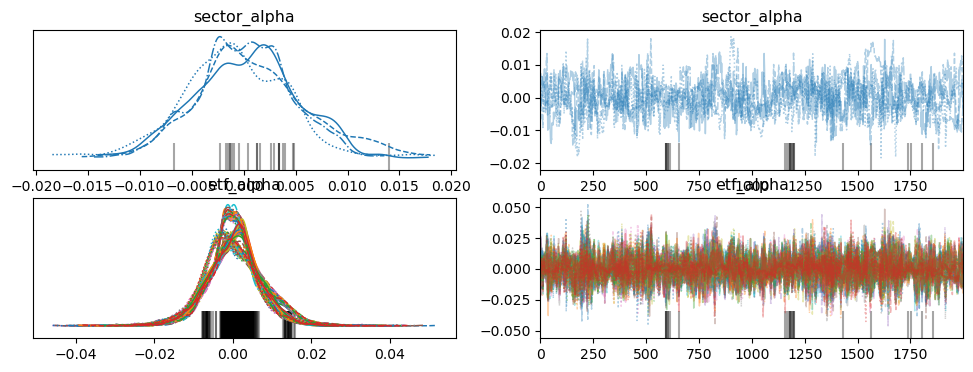

AttributeError: module 'arviz' has no attribute 'from_pymc3'

In [24]:
import pymc as pm
import pandas as pd
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel('etf_ei_merged_data.xlsx')
df['Date'] = pd.to_datetime(df['Date'])

# Filtering data from 2018 to 2022
df_train = df[(df['Date'] >= '2018-01-01') & (df['Date'] <= '2022-12-31')]

# Set up a list of unique sectors and ETFs
sectors = df_train['Sector'].unique().tolist()
etfs = df_train['Ticker'].unique().tolist()

# Given the setup from your BL model, let's integrate the views
# This will act as a starting point for our priors in the Bayesian Hierarchical Model
# [Using the views dictionary you generated from BL model]
views = {}
# [Insert all the views logic here, as given in the Black-Litterman code you provided]

# Convert views into means for priors
priors_mean = {ticker: 0 for ticker in etfs}
for ticker, view in views.items():
    priors_mean[ticker] = view

# Building the Bayesian Hierarchical Model
with pm.Model() as model:
    
    # Hyperpriors for sectors
    sector_alpha = pm.Normal('sector_alpha', mu=0, sigma=0.5)
    sector_sigma = pm.HalfNormal('sector_sigma', sigma=0.5)
    
    # ETF-specific parameters drawn from the sector distributions
    etf_alpha = pm.Normal('etf_alpha', mu=sector_alpha, sigma=sector_sigma, shape=len(etfs))
    
    # Implementing views as priors
    mu = pm.Deterministic('mu', etf_alpha + np.array([priors_mean[ticker] for ticker in etfs]))
    
    # Capture the observed data
    obs = []
    for idx, ticker in enumerate(etfs):
        returns = df_train[df_train['Ticker'] == ticker]['log_return'].values
        obs.append(pm.Normal(ticker, mu=mu[idx], observed=returns))
        
    # Sample
    trace = pm.sample(2000, tune=1000,target_accept=0.99)

# Visualizing the results
az.plot_trace(trace, var_names=['sector_alpha', 'etf_alpha'])
plt.show()

# trace_df = pm.trace_to_dataframe(trace)
pm_data = az.from_pymc3(trace)
print(pm_data)

trace_df = az.from_pymc3(trace)

# Extracting etf_alpha samples
etf_alpha_columns = [col for col in trace_df.columns if 'etf_alpha[' in col]
etf_alpha_samples = trace_df[etf_alpha_columns].values

# Recreating 'mu' values from the samples
mu_samples = etf_alpha_samples + np.array([priors_mean[ticker] for ticker in etfs])

# Calculating predicted returns
predicted_returns = np.mean(mu_samples, axis=0)
predictions_df = pd.DataFrame({
    'Ticker': etfs,
    'Predicted_Return': predicted_returns
})

print(predictions_df)


In [18]:
print(pm.to_inference_data)

<function to_inference_data at 0x000001C1D72D1260>


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sector_alpha, sector_sigma, etf_alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 412 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 93 divergences after tuning. Increase `target_accept` or reparameterize.


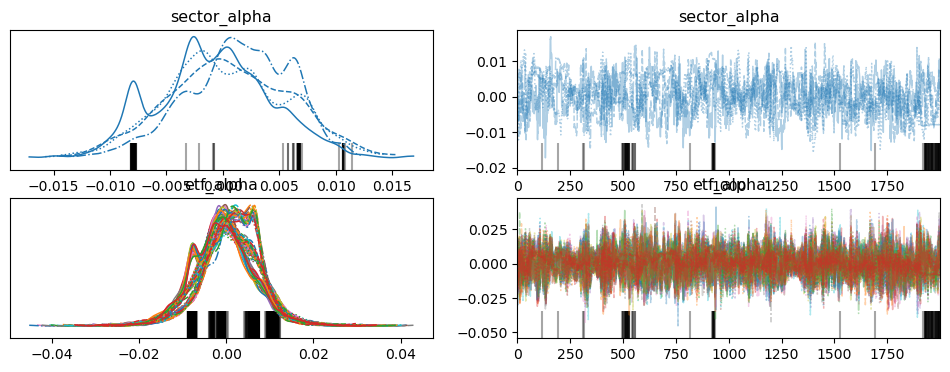

   Ticker  Predicted_Return
0    CORN          0.000417
1    SOYB          0.000312
2    WEAT          0.000424
3     GLD          0.000299
4    PALL          0.000343
5    PPLT          0.000350
6     SLV          0.000471
7     UNG          0.000332
8     BNO          0.000376
9     USO          0.000396
10    KBE          0.000317
11    KIE          0.000341
12    KRE          0.000405
13    XLF          0.000389
14    IHI          0.000406
15    PJP          0.000411
16    XBI          0.000361
17    XLV          0.000305
18    SPY          0.000368
19   BOTZ          0.000374
20   HACK          0.000398
21    QQQ          0.000348
22   SKYY          0.000366
23    SMH          0.000329
     ETF  Expected_Return
0   CORN         0.000417
1   SOYB         0.000312
2   WEAT         0.000424
3    GLD         0.000299
4   PALL         0.000343
5   PPLT         0.000350
6    SLV         0.000471
7    UNG         0.000332
8    BNO         0.000376
9    USO         0.000396
10   KBE      

C:\Users\saide\AppData\Local\Temp\ipykernel_32624\2616433672.py:73: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  credible_intervals = az.hdi(etf_alpha_samples, hdi_prob=0.94)  # 94% credible intervals


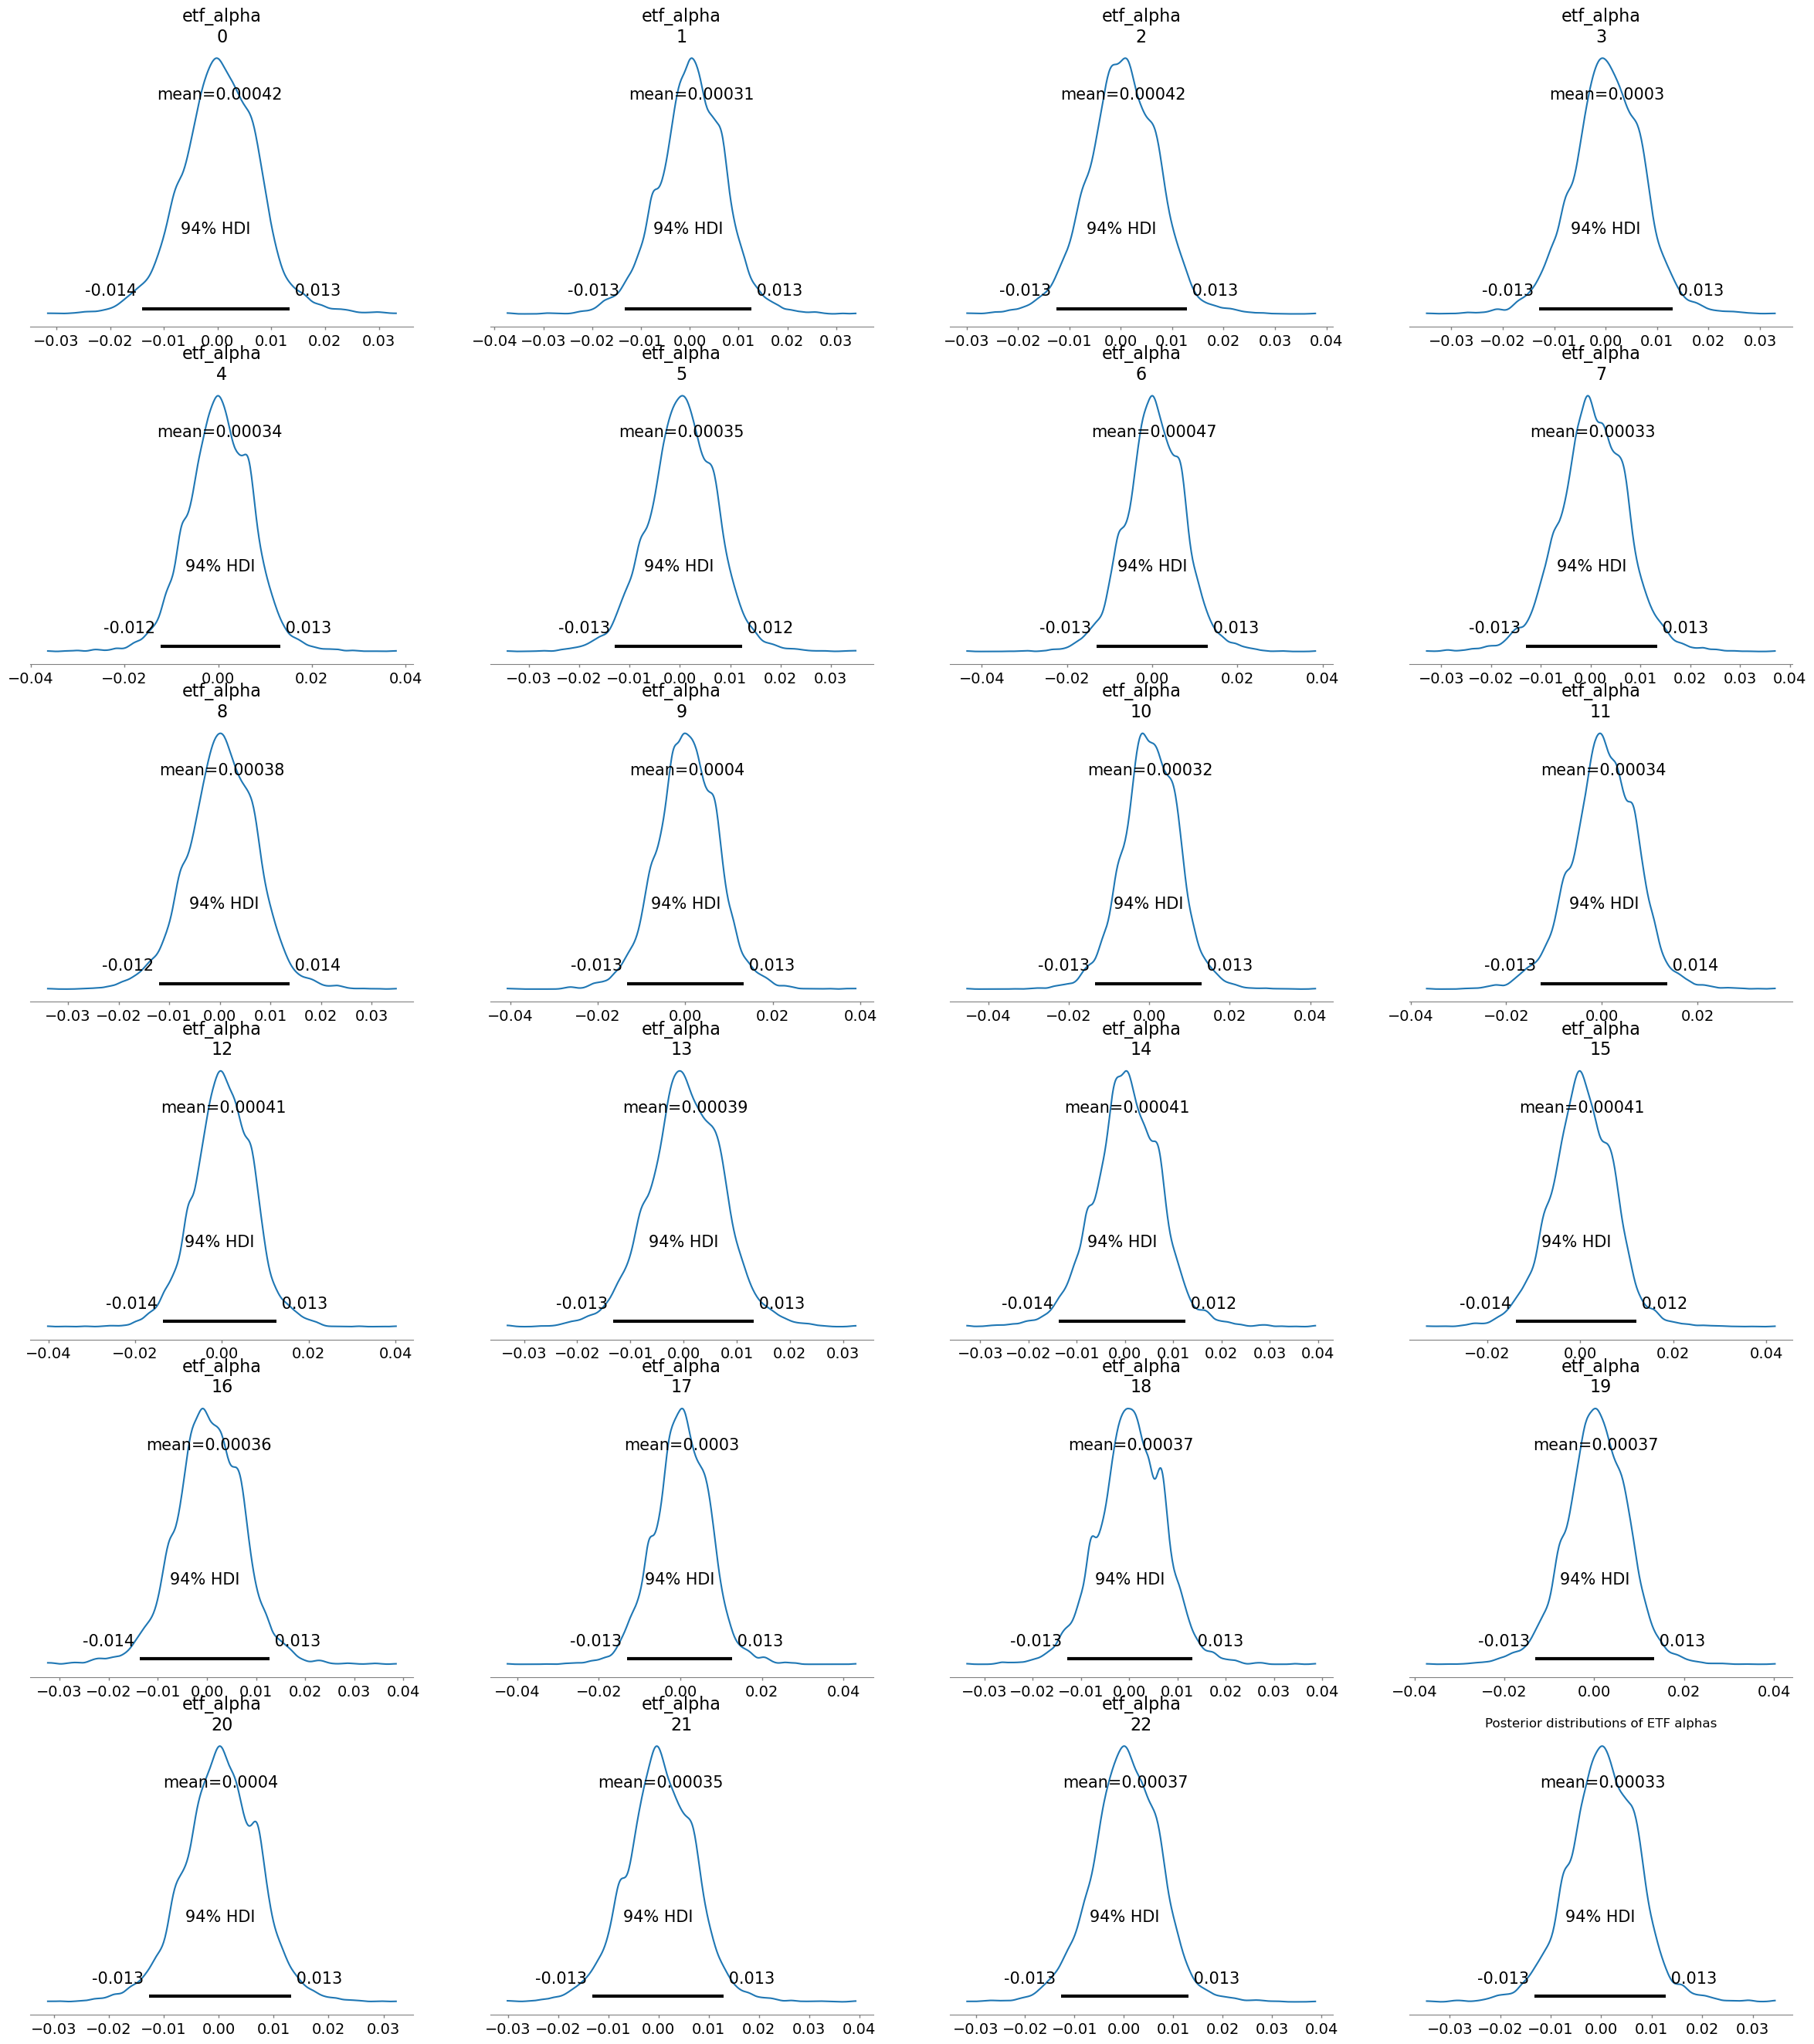

KeyError: 'sector_alpha'

In [1]:
import pymc as pm
import pandas as pd
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel('etf_ei_merged_data.xlsx')
df['Date'] = pd.to_datetime(df['Date'])

# Filtering data from 2018 to 2022
df_train = df[(df['Date'] >= '2018-01-01') & (df['Date'] <= '2022-12-31')]

# Set up a list of unique sectors and ETFs
sectors = df_train['Sector'].unique().tolist()
etfs = df_train['Ticker'].unique().tolist()

# Integrate the views from the Black-Litterman model
views = {}  # Fill with your Black-Litterman views
priors_mean = {ticker: views.get(ticker, 0) for ticker in etfs}

# Building the Bayesian Hierarchical Model
with pm.Model() as model:
    
    # Hyperpriors for sectors
    sector_alpha = pm.Normal('sector_alpha', mu=0, sigma=0.5)
    sector_sigma = pm.HalfNormal('sector_sigma', sigma=0.5)
    
    # ETF-specific parameters
    etf_alpha = pm.Normal('etf_alpha', mu=sector_alpha, sigma=sector_sigma, shape=len(etfs))
    
    # Implementing views as priors
    mu = pm.Deterministic('mu', etf_alpha + np.array([priors_mean[ticker] for ticker in etfs]))
    
    # Capture the observed data
    for idx, ticker in enumerate(etfs):
        returns = df_train[df_train['Ticker'] == ticker]['log_return'].values
        pm.Normal(ticker, mu=mu[idx], observed=returns)
        
    # Sample
    trace = pm.sample(2000, tune=1000, target_accept=0.99)

# Visualizing the results
az.plot_trace(trace, var_names=['sector_alpha', 'etf_alpha'])
plt.show()

# Extract etf_alpha samples from trace
etf_alpha_samples = trace.posterior['etf_alpha'].values.reshape(-1, len(etfs))

# Recreating 'mu' values from the samples
mu_samples = etf_alpha_samples + np.array([priors_mean[ticker] for ticker in etfs])

# Calculating predicted returns
predicted_returns = np.mean(mu_samples, axis=0)
predictions_df = pd.DataFrame({
    'Ticker': etfs,
    'Predicted_Return': predicted_returns
})

print(predictions_df)

# Assuming the provided code has been executed

# 1. Expected returns (averaging over the samples)
expected_returns_df = pd.DataFrame({
    'ETF': etfs,
    'Expected_Return': predicted_returns
})

print(expected_returns_df)

# 2. Uncertainty Measures - Credible intervals
credible_intervals = az.hdi(etf_alpha_samples, hdi_prob=0.94)  # 94% credible intervals
intervals_df = pd.DataFrame(credible_intervals, columns=['Lower', 'Upper'], index=etfs)
print("\nCredible Intervals:\n", intervals_df)

# 3. Posterior samples visualization
az.plot_posterior(trace, var_names=['etf_alpha'])
plt.title('Posterior distributions of ETF alphas')
plt.show()

# Hierarchical insights - comparing sector-level alpha to individual ETF alphas
sector_alpha_samples = trace['sector_alpha']
plt.hist(sector_alpha_samples, bins=30, alpha=0.5, label="Sector-level Alpha")
for idx, etf in enumerate(etfs):
    plt.hist(etf_alpha_samples[:, idx], bins=30, alpha=0.2, label=etf)
plt.legend(loc='upper right')
plt.title('Hierarchical Structure Insights')
plt.show()

# 4. Heatmap of correlations in posterior samples
correlation_matrix = np.corrcoef(etf_alpha_samples, rowvar=False)
plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(ticks=range(len(etfs)), labels=etfs, rotation=90)
plt.yticks(ticks=range(len(etfs)), labels=etfs)
plt.title('Correlation Heatmap of Posterior Samples')
plt.show()

# 5. Tables and other visualizations can be incorporated as per requirements.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sector_alpha, sector_sigma, etf_alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 162 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 191 divergences after tuning. Increase `target_accept` or reparameterize.


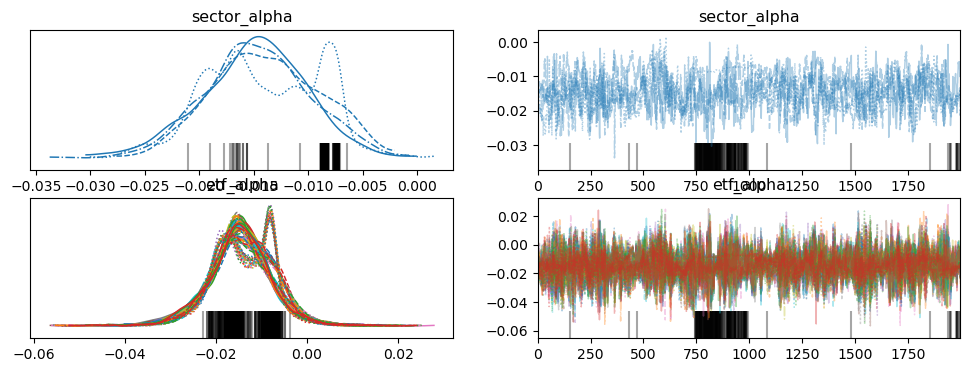

   Ticker  Predicted_Return
0    CORN          0.000589
1    SOYB          0.000641
2    WEAT          0.000534
3     GLD          0.000597
4    PALL          0.000666
5    PPLT          0.000601
6     SLV          0.000587
7     UNG          0.000655
8     BNO          0.000715
9     USO          0.000650
10    KBE          0.000582
11    KIE          0.000613
12    KRE          0.000642
13    XLF          0.000610
14    IHI          0.000637
15    PJP          0.000586
16    XBI          0.000537
17    XLV          0.000640
18    SPY          0.000670
19   BOTZ          0.000651
20   HACK          0.000616
21    QQQ          0.000572
22   SKYY          0.000671
23    SMH          0.000608


In [26]:
import pymc as pm
import pandas as pd
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel('etf_ei_merged_data.xlsx')
df['Date'] = pd.to_datetime(df['Date'])

# Filtering data from 2018 to 2022
df_train = df[(df['Date'] >= '2018-01-01') & (df['Date'] <= '2022-12-31')]

# Set up a list of unique sectors and ETFs
sectors = df_train['Sector'].unique().tolist()
etfs = df_train['Ticker'].unique().tolist()

# Integrate the views from the Black-Litterman model
views = {}  # Fill with your Black-Litterman views
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['MA_50'] > ticker_data['MA_200']:
        views[ticker] = 0.02
    # Similarly, you can add more conditions based on other indicators
# Momentum-based views
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['momentum'] > 0:
        views[ticker] = 0.03
    elif ticker_data['momentum'] < 0:
        views[ticker] = -0.03

# Volume-based views (assuming high volume is bullish)
average_volume = df.groupby('Ticker')['Volume'].mean()
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['Volume'] > 1.5 * average_volume[ticker]:
        views[ticker] = 0.02
# BCI-based views
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['bci'] > 100:  # Assuming 100 is the neutral mark
        if ticker_data['Sector'] == 'Banking':
            views[ticker] = 0.025
        elif ticker_data['Sector'] == 'Gold':
            views[ticker] = -0.025

# CCI-based views
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['cci'] > 100:  # Assuming 100 is the neutral mark
        if ticker_data['Sector'] == 'Retail' or ticker_data['Sector'] == 'Technology':
            views[ticker] = 0.02

# Interest rate views
if df.iloc[-1]['long_term_ir'] - df.iloc[-30]['long_term_ir'] > df.iloc[-1]['short_term_ir'] - df.iloc[-30]['short_term_ir']:
    for ticker in df[df['Sector'] == 'Banking']['Ticker'].unique():
        views[ticker] = 0.015

# Moving average crossover views
for ticker in df['Ticker'].unique():
    recent_data = df[df['Ticker'] == ticker].tail(2)
    if recent_data.iloc[0]['MA_50'] < recent_data.iloc[0]['MA_200'] and recent_data.iloc[1]['MA_50'] > recent_data.iloc[1]['MA_200']:
        views[ticker] = 0.03  # Golden cross
    elif recent_data.iloc[0]['MA_50'] > recent_data.iloc[0]['MA_200'] and recent_data.iloc[1]['MA_50'] < recent_data.iloc[1]['MA_200']:
        views[ticker] = -0.03  # Death cross

        # Momentum-Volatility combination
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['momentum'] > 0 and ticker_data['volatility'] > df[df['Ticker'] == ticker]['volatility'].mean():
        views[ticker] = 0.025

# Interest Rate Differential
yield_curve = df.iloc[-1]['long_term_ir'] - df.iloc[-1]['short_term_ir']
if yield_curve < 0:
    # Negative yield curve, typically bearish for the market
    for ticker in df['Ticker'].unique():
        views[ticker] = -0.02

# BCI and CCI combination
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['bci'] > 100 and ticker_data['cci'] > 100:
        views[ticker] = 0.03

# Moving Average Crossover with Momentum
for ticker in df['Ticker'].unique():
    recent_data = df[df['Ticker'] == ticker].tail(2)
    if recent_data.iloc[0]['MA_50'] < recent_data.iloc[0]['MA_200'] and recent_data.iloc[1]['MA_50'] > recent_data.iloc[1]['MA_200'] and recent_data.iloc[1]['momentum'] > 0:
        views[ticker] = 0.04  # Enhanced golden cross view
    elif recent_data.iloc[0]['MA_50'] > recent_data.iloc[0]['MA_200'] and recent_data.iloc[1]['MA_50'] < recent_data.iloc[1]['MA_200'] and recent_data.iloc[1]['momentum'] < 0:
        views[ticker] = -0.04  # Enhanced death cross view


# MA Confluence
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['MA_50'] > ticker_data['MA_100'] > ticker_data['MA_200']:
        views[ticker] = 0.03
    elif ticker_data['MA_50'] < ticker_data['MA_100'] < ticker_data['MA_200']:
        views[ticker] = -0.03

# Economic Stress Test
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['bci'] < 100 and ticker_data['cci'] < 100 and ticker_data['short_term_ir'] > ticker_data['long_term_ir']:
        views[ticker] = -0.04

# High Volume and Momentum
average_volume = df['Volume'].mean()
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['momentum'] > 0 and ticker_data['Volume'] > 1.5 * average_volume:
        views[ticker] = 0.03

# Economic Optimism with Technical Support
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['bci'] > 100 and ticker_data['cci'] > 100 and ticker_data['Close'] > ticker_data['MA_200']:
        views[ticker] = 0.04


# Calculating averages for economic indicators
avg_bci = df['bci'].mean()
avg_cci = df['cci'].mean()
avg_cli = df['cli'].mean()

# Economic Momentum Confluence
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if (ticker_data['bci'] > avg_bci and ticker_data['cci'] > avg_cci and ticker_data['cli'] > avg_cli) and ticker_data['momentum'] > 0:
        views[ticker] = 0.05
    elif (ticker_data['bci'] < avg_bci and ticker_data['cci'] < avg_cci and ticker_data['cli'] < avg_cli) and ticker_data['momentum'] < 0:
        views[ticker] = -0.05

# Economic Resilience with Technical Support
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['bci'] > avg_bci and ticker_data['cci'] > avg_cci and ticker_data['Close'] > ticker_data[['MA_50', 'MA_100', 'MA_200']].max():
        views[ticker] = 0.04

# Interest Rate Spread and Volume
avg_volume = df['Volume'].mean()
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['short_term_ir'] > ticker_data['long_term_ir'] and ticker_data['Volume'] > 1.2 * avg_volume:
        views[ticker] = -0.04

# High Momentum with Economic Downturn
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['momentum'] > 0 and (ticker_data['bci'] < avg_bci or ticker_data['cci'] < avg_cci or ticker_data['cli'] < avg_cli):
        views[ticker] = -0.03
        
latest_values = df.groupby('Ticker').last()

# View 1: CLI & Finance
finance_etfs = df[df['Sector'] == 'Finance']['Ticker'].unique()
for ticker in finance_etfs:
    if latest_values.loc[ticker, 'cli'] > df[df['Ticker'] == ticker]['cli'].median():
        views[ticker] = 0.03

# View 2: CCI & Technology
tech_etfs = df[df['Sector'] == 'Technology']['Ticker'].unique()
for ticker in tech_etfs:
    if latest_values.loc[ticker, 'cci'] > df[df['Ticker'] == ticker]['cci'].mean() + 0.5 * df[df['Ticker'] == ticker]['cci'].std():
        views[ticker] = 0.04

# View 3: Volatility & Finance
for ticker in finance_etfs:
    if latest_values.loc[ticker, 'volatility'] > df[df['Ticker'] == ticker]['volatility'].quantile(0.75):
        views[ticker] = -0.02

# View 4: Momentum & Technology
for ticker in tech_etfs:
    if latest_values.loc[ticker, 'momentum'] > df[df['Ticker'] == ticker]['momentum'].median() and latest_values.loc[ticker, 'momentum'] > 0:
        views[ticker] = 0.03

        # View 1: Interplay between Interest Rates
for ticker in df['Ticker'].unique():
    if latest_values.loc[ticker, 'short_term_ir'] > latest_values.loc[ticker, 'long_term_ir']:
        if 'Gold' in ticker or ticker == 'GLD':
            views[ticker] = 0.05
        if ticker in finance_etfs:
            views[ticker] = -0.04

# View 2: High Momentum and CCI
for ticker in tech_etfs:
    if latest_values.loc[ticker, 'momentum'] > df[df['Ticker'] == ticker]['momentum'].quantile(0.90) and latest_values.loc[ticker, 'cci'] > df[df['Ticker'] == ticker]['cci'].mean():
        views[ticker] = 0.06

# View 3: Volatility, CCI, and SPY
if latest_values.loc['SPY', 'volatility'] > df[df['Ticker'] == 'SPY']['volatility'].quantile(0.75) and latest_values.loc['SPY', 'cci'] > df[df['Ticker'] == 'SPY']['cci'].mean():
    views['SPY'] = 0.04

# View 4: Momentum and MAs for Finance
for ticker in finance_etfs:
    if latest_values.loc[ticker, 'Close'] > latest_values.loc[ticker, 'MA_50'] and latest_values.loc[ticker, 'Close'] > latest_values.loc[ticker, 'MA_200'] and latest_values.loc[ticker, 'momentum'] > 0:
        views[ticker] = 0.03
# View 5: CLI and Market Benchmark
if latest_values.loc['SPY', 'cli'] > df[df['Ticker'] == 'SPY']['cli'].mean() and df[df['Ticker'] == 'SPY']['cli'].diff().iloc[-5:].mean() > 0:
    views['SPY'] = 0.03

# View 6: CCI and Sector Analysis
for ticker in ['QQQ', 'XLF']:  # Sample ETFs for technology and finance
    if latest_values.loc[ticker, 'cci'] > df[df['Ticker'] == ticker]['cci'].mean():
        views[ticker] = 0.04

# View 7: Volume as Sentiment Indicator
for ticker in df['Ticker'].unique():
    if latest_values.loc[ticker, 'Volume'] > df[df['Ticker'] == ticker]['Volume'].quantile(0.90):
        if latest_values.loc[ticker, 'momentum'] > 0:
            views[ticker] = 0.03
        else:
            views[ticker] = -0.03

# View 8: Momentum & Volatility for Safe Havens
if latest_values.loc['GLD', 'momentum'] > 0 and latest_values.loc['SPY', 'volatility'] > df[df['Ticker'] == 'SPY']['volatility'].quantile(0.75):
    views['GLD'] = 0.04

# View 9: Interest Rates and Financial Sector
if latest_values.loc['XLF', 'long_term_ir'] > df[df['Ticker'] == 'XLF']['long_term_ir'].tail(90).mean():
    views['XLF'] = 0.04

# View 10: Volatility and Safe Havens
if latest_values.loc['SPY', 'volatility'] > df[df['Ticker'] == 'SPY']['volatility'].median():
    views['GLD'] = 0.03

# View 11: CCI and Technology
if latest_values.loc['QQQ', 'cci'] > df[df['Ticker'] == 'QQQ']['cci'].mean() and df[df['Ticker'] == 'QQQ']['cci'].diff().iloc[-30:].mean() > 0:
    views['QQQ'] = 0.04

# View 12: Momentum and Volume Play
for ticker in df['Ticker'].unique():
    if latest_values.loc[ticker, 'momentum'] > 0 and latest_values.loc[ticker, 'Volume'] > df[df['Ticker'] == ticker]['Volume'].tail(30).mean():
        views[ticker] = 0.03
        
# View 13: CLI and Broader Market
if df[df['Ticker'] == 'SPY']['cli'].tail(180).mean() > df[df['Ticker'] == 'SPY']['cli'].tail(360).mean():
    views['SPY'] = 0.05

# View 14: CCI and Tech Sector
monthly_cci_rate = df[df['Ticker'] == 'SKYY']['cci'].diff(periods=30).iloc[-1]
if monthly_cci_rate > df[df['Ticker'] == 'SKYY']['cci'].diff(periods=30).mean():
    views['SKYY'] = 0.06

# View 15: Momentum vs Volatility Interplay
for ticker in df['Ticker'].unique():
    ticker_df = df[df['Ticker'] == ticker]
    if ticker_df['momentum'].iloc[-1] > ticker_df['momentum'].quantile(0.9) and ticker_df['volatility'].iloc[-1] > ticker_df['volatility'].quantile(0.9):
        views[ticker] = -0.03

# View 16: Short-term Interest Rates and Banking
if df[df['Ticker'] == 'KRE']['short_term_ir'].tail(90).mean() > df[df['Ticker'] == 'KRE']['short_term_ir'].tail(180).mean():
    views['KRE'] = 0.04

# Interest rate views (just an example: bullish on all ETFs if short term rates are rising)
if df.iloc[-1]['short_term_ir'] > df.iloc[-30]['short_term_ir']:
    for ticker in df['Ticker'].unique():
        views[ticker] = 0.015
        
priors_mean = {ticker: views.get(ticker, 0) for ticker in etfs}

# Building the Bayesian Hierarchical Model
with pm.Model() as model:
    
    # Hyperpriors for sectors
    sector_alpha = pm.Normal('sector_alpha', mu=0, sigma=0.5)
    sector_sigma = pm.HalfNormal('sector_sigma', sigma=0.5)
    
    # ETF-specific parameters
    etf_alpha = pm.Normal('etf_alpha', mu=sector_alpha, sigma=sector_sigma, shape=len(etfs))
    
    # Implementing views as priors
    mu = pm.Deterministic('mu', etf_alpha + np.array([priors_mean[ticker] for ticker in etfs]))
    
    # Capture the observed data
    for idx, ticker in enumerate(etfs):
        returns = df_train[df_train['Ticker'] == ticker]['log_return'].values
        pm.Normal(ticker, mu=mu[idx], observed=returns)
        
    # Sample
    trace = pm.sample(2000, tune=1000, target_accept=0.99)

# Visualizing the results
az.plot_trace(trace, var_names=['sector_alpha', 'etf_alpha'])
plt.show()

# Extract etf_alpha samples from trace
etf_alpha_samples = trace.posterior['etf_alpha'].values.reshape(-1, len(etfs))

# Recreating 'mu' values from the samples
mu_samples = etf_alpha_samples + np.array([priors_mean[ticker] for ticker in etfs])

# Calculating predicted returns
predicted_returns = np.mean(mu_samples, axis=0)
predictions_df = pd.DataFrame({
    'Ticker': etfs,
    'Predicted_Return': predicted_returns
})

print(predictions_df)

In [ ]:
# Model Update 29_Oct_2023

In [1]:
# 1. Transform the Views into Prior Means

# Use a neutral rate as a base. This could be the overall market expected return or a risk-free rate.
neutral_rate = 0.05  # example: 5% annual return

# Convert views into prior means. This is a simple transformation, but it can be adjusted based on your needs.
prior_means = {ticker: neutral_rate + view for ticker, view in combined_views.items()}

# Convert prior means into an ordered list matching the order of assets in your returns data
ordered_prior_means = [prior_means[ticker] for ticker in prices_all.columns]

# 2. Set Prior Standard Deviations

# Here, as an example, I'm setting a base standard deviation and adjusting it based on the absolute value of the view. 
# Stronger views will result in smaller std devs. This is just one approach, and it can be adjusted based on your beliefs.
base_std_dev = 0.2
prior_std_devs = [base_std_dev - abs(view) for view in combined_views.values()]
ordered_prior_std_devs = [prior_std_devs[prices_all.columns.tolist().index(ticker)] for ticker in combined_views.keys()]

# Implementing the Bayesian Hierarchical Model with Priors

with pm.Model() as model:
    # Hyperpriors
    mu = pm.Normal('mu', mu=0, sd=0.01)
    sigma = pm.HalfNormal('sigma', sd=0.01)
    
    # Individual asset expected returns with priors informed by views
    asset_mu = pm.Normal('asset_mu', mu=ordered_prior_means, sd=ordered_prior_std_devs, shape=returns_data.shape[1])
    
    # Likelihood
    likelihood = pm.Normal('returns', mu=asset_mu, observed=returns_data)
    
    # Sampling
    trace = pm.sample(2000, tune=1000, chains=2)

NameError: name 'combined_views' is not defined

In [ ]:
## Model update 29_Oct_2023

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sector_alpha, sector_sigma, etf_alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 175 seconds.


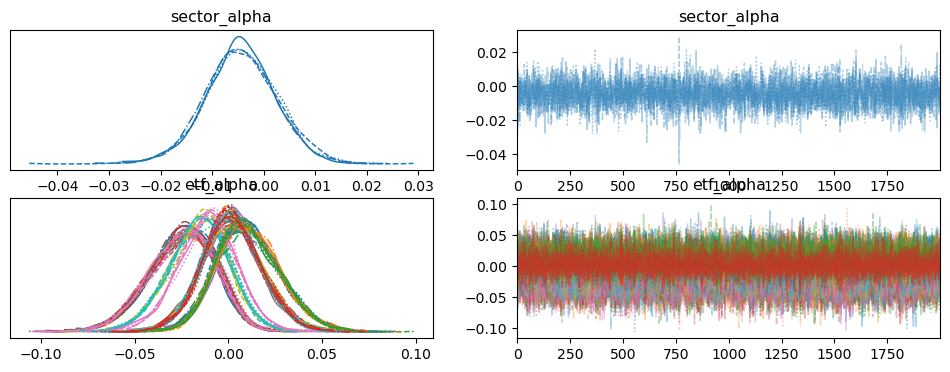

   Ticker  Predicted_Return
0    CORN          0.025537
1    SOYB          0.025651
2    WEAT          0.025784
3     GLD          0.025755
4    PALL         -0.018917
5    PPLT          0.025427
6     SLV          0.025576
7     UNG         -0.008310
8     BNO          0.014496
9     USO          0.014385
10    KBE         -0.019338
11    KIE         -0.008072
12    KRE         -0.019413
13    XLF         -0.007874
14    IHI         -0.007966
15    PJP         -0.007973
16    XBI          0.008801
17    XLV         -0.008092
18    SPY         -0.007722
19   BOTZ         -0.008057
20   HACK         -0.019063
21    QQQ         -0.018826
22   SKYY         -0.019127
23    SMH         -0.007843


In [3]:
import pymc as pm
import pandas as pd
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
from collections import defaultdict

# Load data
df = pd.read_excel('etf_ei_merged_data.xlsx')
df['Date'] = pd.to_datetime(df['Date'])

# Filtering data from 2018 to 2022
df_train = df[(df['Date'] >= '2018-01-01') & (df['Date'] <= '2022-12-31')]

# Set up a list of unique sectors and ETFs
sectors = df_train['Sector'].unique().tolist()
etfs = df_train['Ticker'].unique().tolist()

# Integrate the views from the Black-Litterman model
combined_views = defaultdict(float)
signal_views = defaultdict(dict)

# Moving Average Signal
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['MA_50'] > ticker_data['MA_200']:
        signal_views[ticker]['ma_signal'] = 0.02

# Momentum-based views
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['momentum'] > 0:
        signal_views[ticker]['momentum_signal'] = 0.03
    elif ticker_data['momentum'] < 0:
        signal_views[ticker]['momentum_signal'] = -0.03

# Volume-based views
average_volume = df.groupby('Ticker')['Volume'].mean()
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['Volume'] > 1.5 * average_volume[ticker]:
        signal_views[ticker]['volume_signal'] = 0.02

# BCI-based views
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['bci'] > 100:
        if ticker_data['Sector'] == 'Banking':
            signal_views[ticker]['bci_signal_banking'] = 0.025
        elif ticker_data['Sector'] == 'Gold':
            signal_views[ticker]['bci_signal_gold'] = -0.025

# CCI-based views
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['cci'] > 100:
        if ticker_data['Sector'] == 'Retail' or ticker_data['Sector'] == 'Technology':
            signal_views[ticker]['cci_signal'] = 0.02

# Interest rate views
if df.iloc[-1]['long_term_ir'] - df.iloc[-30]['long_term_ir'] > df.iloc[-1]['short_term_ir'] - df.iloc[-30]['short_term_ir']:
    for ticker in df[df['Sector'] == 'Banking']['Ticker'].unique():
        signal_views[ticker]['ir_signal'] = 0.015

# Moving average crossover views
for ticker in df['Ticker'].unique():
    recent_data = df[df['Ticker'] == ticker].tail(2)
    if recent_data.iloc[0]['MA_50'] < recent_data.iloc[0]['MA_200'] and recent_data.iloc[1]['MA_50'] > recent_data.iloc[1]['MA_200']:
        signal_views[ticker]['ma_crossover_signal'] = 0.03
    elif recent_data.iloc[0]['MA_50'] > recent_data.iloc[0]['MA_200'] and recent_data.iloc[1]['MA_50'] < recent_data.iloc[1]['MA_200']:
        signal_views[ticker]['ma_crossover_signal'] = -0.03

def ma_signal(ticker_data):
    return 0.02 if ticker_data['MA_50'] > ticker_data['MA_200'] else 0

def momentum_signal(ticker_data):
    if ticker_data['momentum'] > 0:
        return 0.03
    elif ticker_data['momentum'] < 0:
        return -0.03
    return 0

def volume_signal(ticker_data, average_volume):
    return 0.02 if ticker_data['Volume'] > 1.5 * average_volume else 0

def bci_signal(ticker_data):
    if ticker_data['bci'] > 100:
        if ticker_data['Sector'] == 'Banking':
            return 0.025
        elif ticker_data['Sector'] == 'Gold':
            return -0.025
    return 0

def cci_signal(ticker_data):
    if ticker_data['cci'] > 100 and ticker_data['Sector'] in ['Retail', 'Technology']:
        return 0.02
    return 0

def ir_signal(ticker_data, df):
    if df.iloc[-1]['long_term_ir'] - df.iloc[-30]['long_term_ir'] > df.iloc[-1]['short_term_ir'] - df.iloc[-30]['short_term_ir']:
        if ticker_data['Sector'] == 'Banking':
            return 0.015
    return 0

# ... Continue for all your views in a similar fashion ...

# Applying the views on the dataframe
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    
    average_volume = df[df['Ticker'] == ticker]['Volume'].mean()
    
    signal_views[ticker]['ma_signal'] = ma_signal(ticker_data)
    signal_views[ticker]['momentum_signal'] = momentum_signal(ticker_data)
    signal_views[ticker]['volume_signal'] = volume_signal(ticker_data, average_volume)
    signal_views[ticker]['bci_signal'] = bci_signal(ticker_data)
    signal_views[ticker]['cci_signal'] = cci_signal(ticker_data)
    signal_views[ticker]['ir_signal'] = ir_signal(ticker_data, df)
    
    # ... Apply the rest of your views in a similar fashion ...

# Combine views
for ticker, views_dict in signal_views.items():
    combined_view = sum(views_dict.values())
    combined_views[ticker] = combined_view

# Capping views
MAX_VIEW = 0.05
MIN_VIEW = -0.05
for ticker, view in combined_views.items():
    if view > MAX_VIEW:
        combined_views[ticker] = MAX_VIEW
    elif view < MIN_VIEW:
        combined_views[ticker] = MIN_VIEW

        
priors_mean = {ticker: combined_views.get(ticker, 0) for ticker in etfs}

# Building the Bayesian Hierarchical Model
with pm.Model() as model:
    
    # Hyperpriors for sectors
    sector_alpha = pm.Normal('sector_alpha', mu=0, sigma=0.5)
    sector_sigma = pm.HalfNormal('sector_sigma', sigma=0.5)
    
    # ETF-specific parameters
    etf_alpha = pm.Normal('etf_alpha', mu=sector_alpha, sigma=sector_sigma, shape=len(etfs))
    
    # Implementing views as priors
    mu = pm.Deterministic('mu', etf_alpha + np.array([priors_mean[ticker] for ticker in etfs]))
    
    # Capture the observed data
    for idx, ticker in enumerate(etfs):
        returns = df_train[df_train['Ticker'] == ticker]['log_return'].values
        pm.Normal(ticker, mu=mu[idx], observed=returns)
        
    # Sample
    trace = pm.sample(2000, tune=1000, target_accept=0.99)

# Visualizing the results
az.plot_trace(trace, var_names=['sector_alpha', 'etf_alpha'])
plt.show()

# Extract etf_alpha samples from trace
etf_alpha_samples = trace.posterior['etf_alpha'].values.reshape(-1, len(etfs))

# Recreating 'mu' values from the samples
mu_samples = etf_alpha_samples + np.array([priors_mean[ticker] for ticker in etfs])

# Calculating predicted returns
predicted_returns = np.mean(mu_samples, axis=0)
predictions_df = pd.DataFrame({
    'Ticker': etfs,
    'Predicted_Return': predicted_returns
})

print(predictions_df)

C:\Users\saide\AppData\Local\Temp\ipykernel_33064\3296952365.py:3: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  credible_intervals = az.hdi(etf_alpha_samples, hdi_prob=0.94)  # 94% credible intervals



Credible Intervals:
          Lower     Upper
CORN -0.059812  0.005736
SOYB -0.055993  0.008610
WEAT -0.058313  0.006465
GLD  -0.058450  0.006896
PALL -0.019985  0.043711
PPLT -0.056876  0.007663
SLV  -0.056590  0.008759
UNG  -0.029870  0.032104
BNO  -0.046685  0.014758
USO  -0.046181  0.015377
KBE  -0.022396  0.041285
KIE  -0.027202  0.033820
KRE  -0.019284  0.044599
XLF  -0.026364  0.035158
IHI  -0.025841  0.034555
PJP  -0.027603  0.032181
XBI  -0.041458  0.018841
XLV  -0.027884  0.032444
SPY  -0.029747  0.031827
BOTZ -0.026535  0.033006
HACK -0.017962  0.044957
QQQ  -0.020464  0.041796
SKYY -0.019298  0.042783
SMH  -0.027230  0.033031


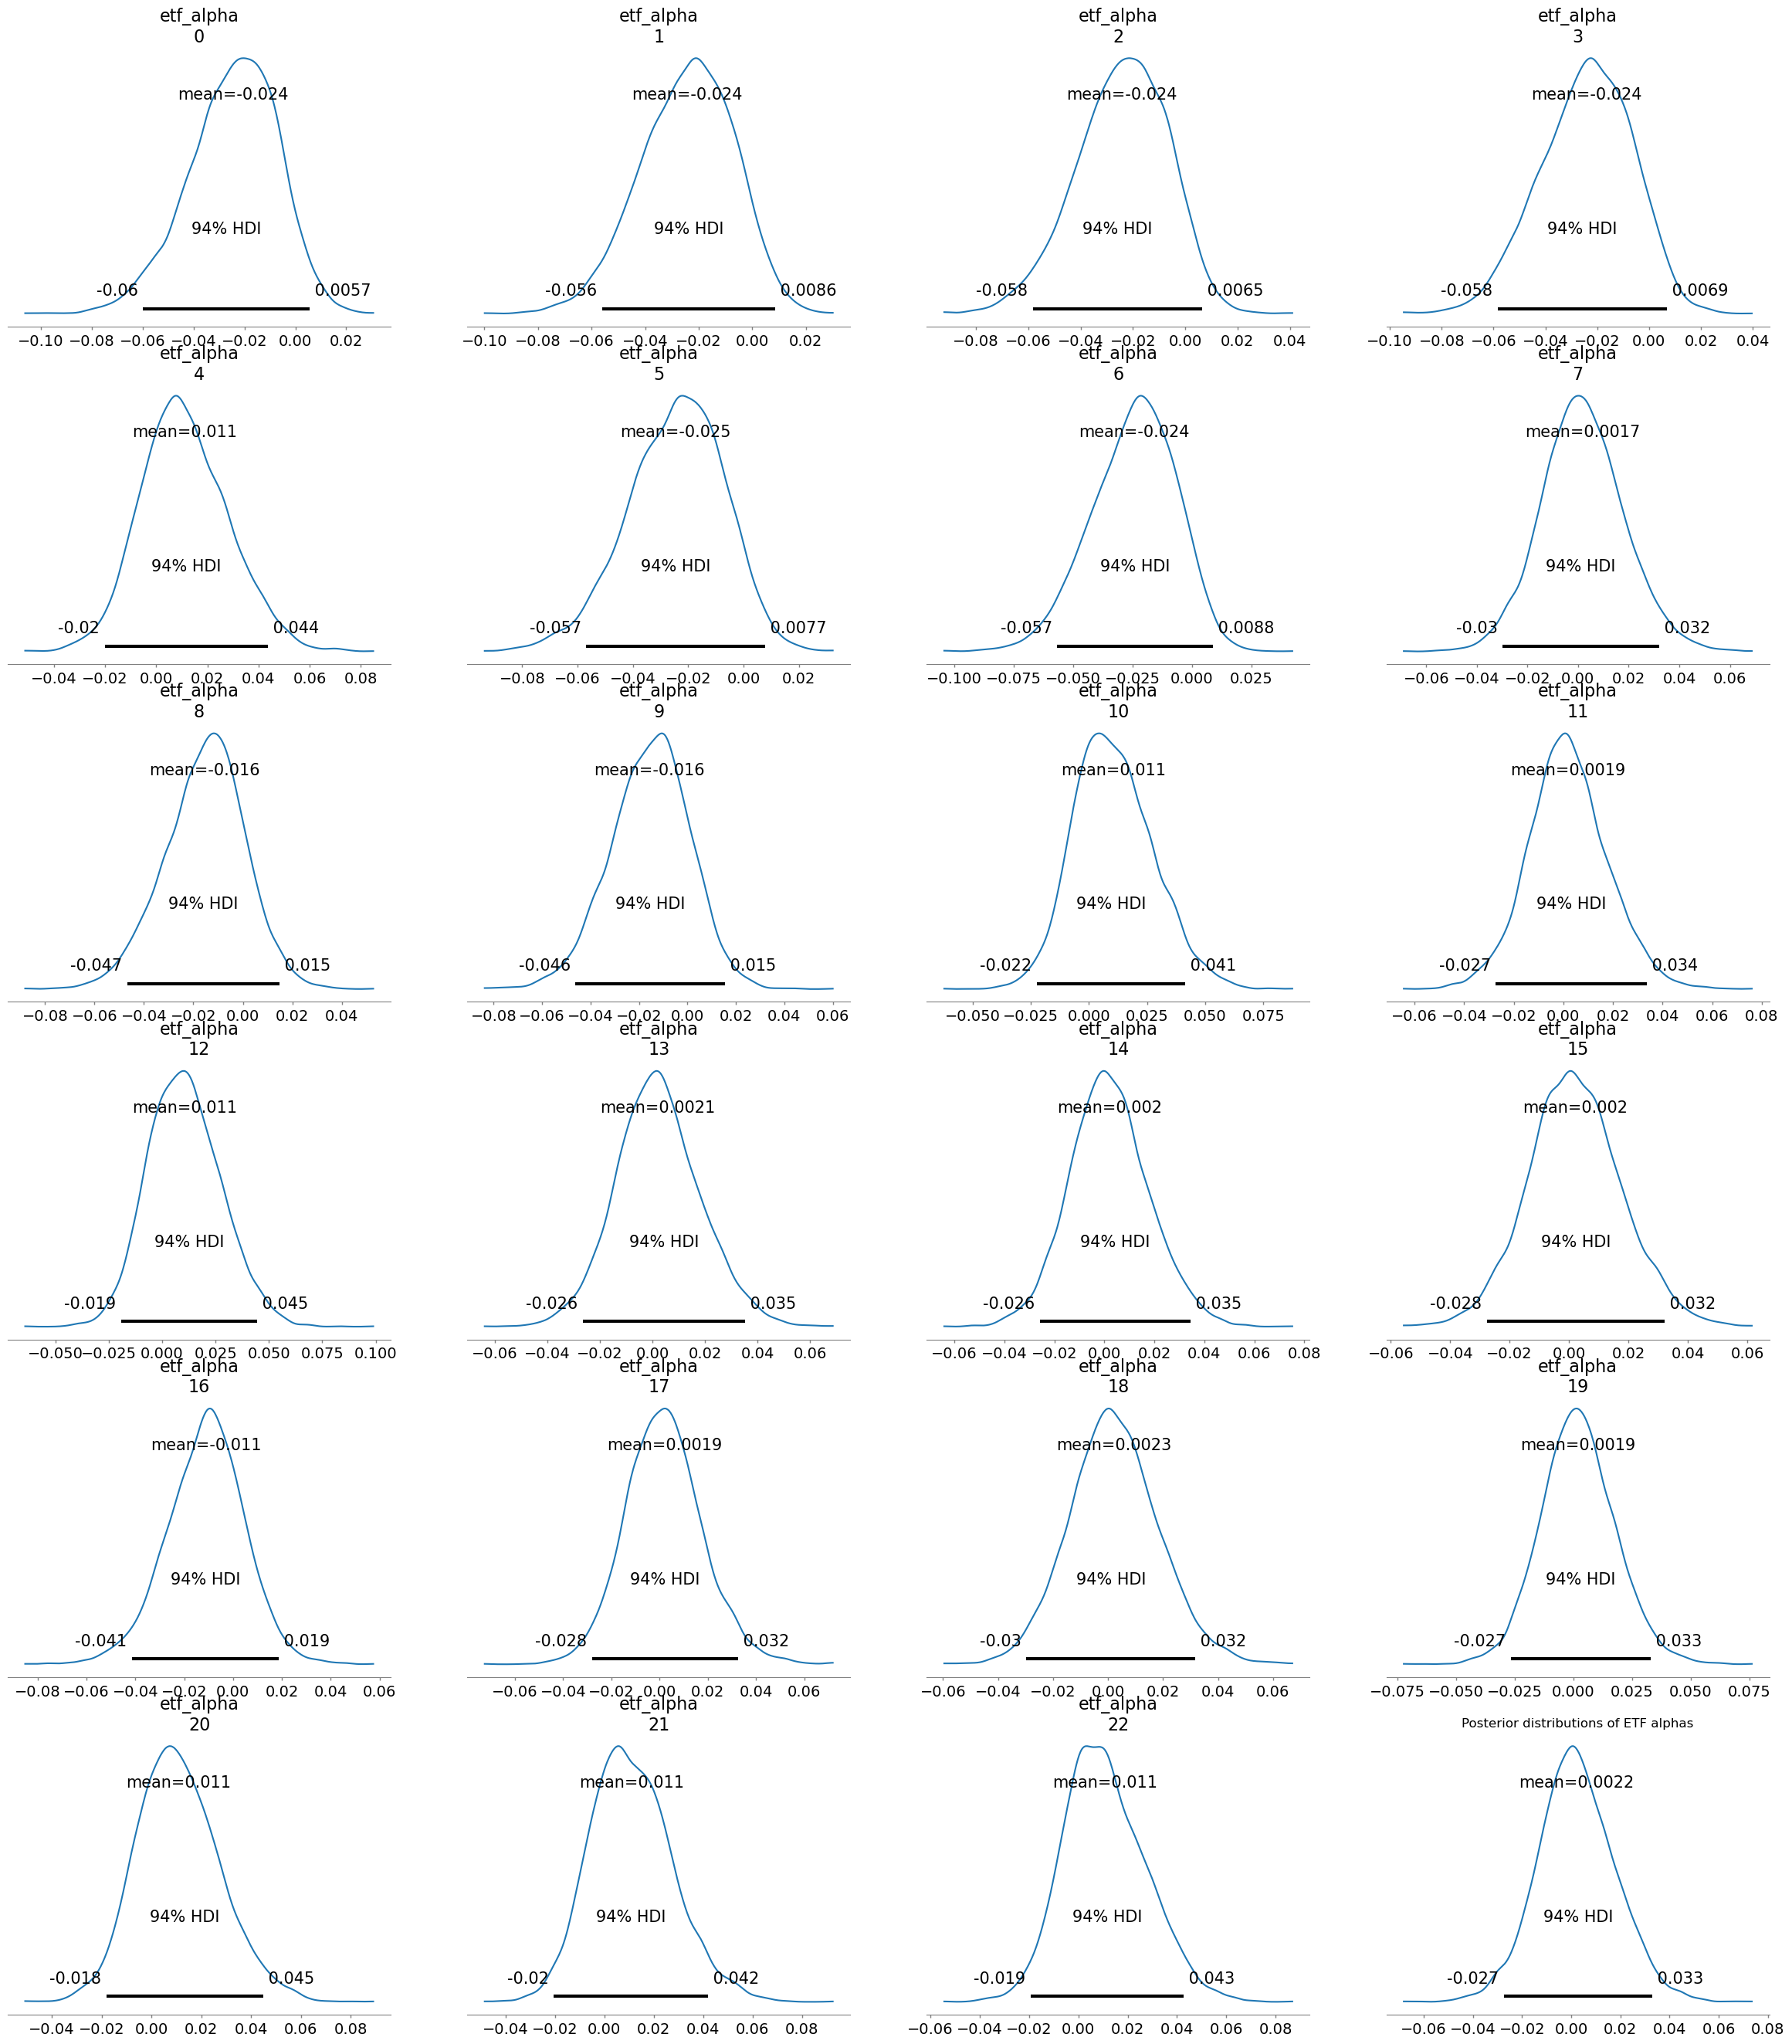

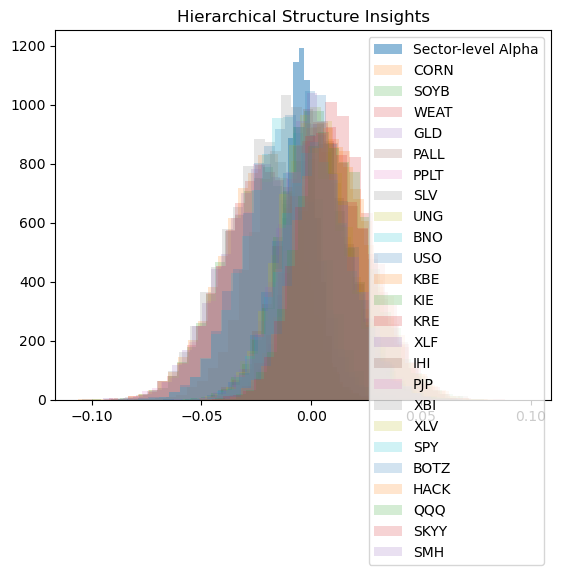

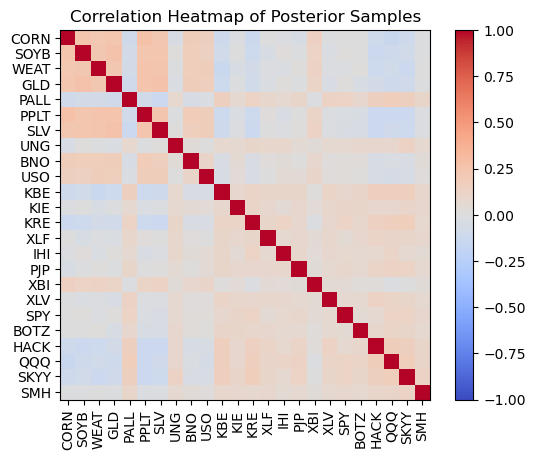

In [11]:
# Continuation for above
# 2. Uncertainty Measures - Credible intervals
credible_intervals = az.hdi(etf_alpha_samples, hdi_prob=0.94)  # 94% credible intervals
intervals_df = pd.DataFrame(credible_intervals, columns=['Lower', 'Upper'], index=etfs)
print("\nCredible Intervals:\n", intervals_df)

# 3. Posterior samples visualization
az.plot_posterior(trace, var_names=['etf_alpha'])
plt.title('Posterior distributions of ETF alphas')
plt.show()

# Hierarchical insights - comparing sector-level alpha to individual ETF alphas
# sector_alpha_samples = trace['sector_alpha']
sector_alpha_samples = trace.posterior['sector_alpha'].values.reshape(-1)
plt.hist(sector_alpha_samples, bins=30, alpha=0.5, label="Sector-level Alpha")
for idx, etf in enumerate(etfs):
    plt.hist(etf_alpha_samples[:, idx], bins=30, alpha=0.2, label=etf)
plt.legend(loc='upper right')
plt.title('Hierarchical Structure Insights')
plt.show()

# 4. Heatmap of correlations in posterior samples
correlation_matrix = np.corrcoef(etf_alpha_samples, rowvar=False)
plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(ticks=range(len(etfs)), labels=etfs, rotation=90)
plt.yticks(ticks=range(len(etfs)), labels=etfs)
plt.title('Correlation Heatmap of Posterior Samples')
plt.show()

# 5. Tables and other visualizations can be incorporated as per requirements.

In [6]:
# print(trace.varnames)
print(trace.posterior)

<xarray.Dataset>
Dimensions:          (chain: 4, draw: 2000, etf_alpha_dim_0: 24, mu_dim_0: 24)
Coordinates:
  * chain            (chain) int32 0 1 2 3
  * draw             (draw) int32 0 1 2 3 4 5 ... 1994 1995 1996 1997 1998 1999
  * etf_alpha_dim_0  (etf_alpha_dim_0) int32 0 1 2 3 4 5 6 ... 18 19 20 21 22 23
  * mu_dim_0         (mu_dim_0) int32 0 1 2 3 4 5 6 7 ... 17 18 19 20 21 22 23
Data variables:
    sector_alpha     (chain, draw) float64 -0.01418 -0.009254 ... -0.008544
    etf_alpha        (chain, draw, etf_alpha_dim_0) float64 -0.00687 ... -0.0...
    sector_sigma     (chain, draw) float64 0.03233 0.01825 ... 0.02654 0.02182
    mu               (chain, draw, mu_dim_0) float64 0.04313 ... -0.02262
Attributes:
    created_at:                 2023-10-29T16:30:07.418096
    arviz_version:              0.16.1
    inference_library:          pymc
    inference_library_version:  5.8.1
    sampling_time:              174.54008316993713
    tuning_steps:               1000


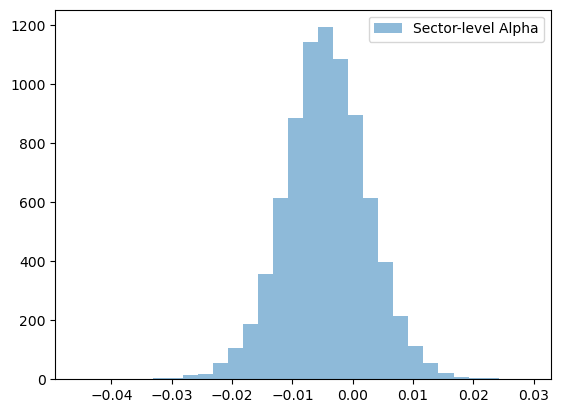

In [7]:
# Extracting samples for sector_alpha
sector_alpha_samples = trace.posterior['sector_alpha'].values.reshape(-1)

# Example: Plotting histogram for sector_alpha
import matplotlib.pyplot as plt
plt.hist(sector_alpha_samples, bins=30, alpha=0.5, label="Sector-level Alpha")
plt.legend()
plt.show()

# Similarly, you can proceed with the other variables. Ensure that when you extract data for
# multi-dimensional variables like etf_alpha, you handle the multiple dimensions appropriately.

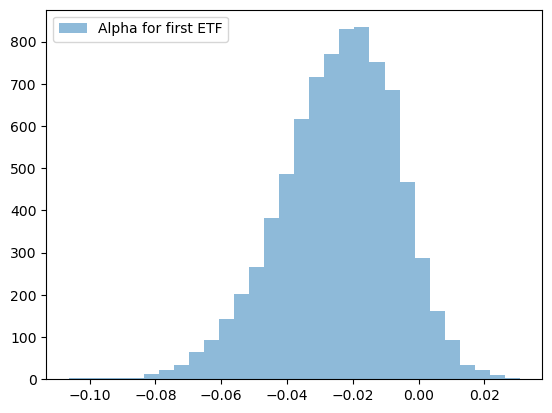

In [10]:
# For instance, if you want to visualize the samples for a specific ETF (let's say the first one), you'd do something like

etf_alpha_samples_for_first_etf = trace.posterior['etf_alpha'].sel(etf_alpha_dim_0=0).values.reshape(-1)
plt.hist(etf_alpha_samples_for_first_etf, bins=30, alpha=0.5, label="Alpha for first ETF")
plt.legend()
plt.show()

# You can adjust the etf_alpha_dim_0 index to get data for other ETFs.

In [ ]:
# Comparing Over Actual Returns

In [12]:
# Attempt 1: # Comparing Over Actual Returns

from sklearn.metrics import mean_squared_error, r2_score

# let df = test_df, which is actually FALSE FALSE FLASE, need to take only of 2023 data.
test_df = df

# Compute the daily return for each ticker
test_df['daily_return'] = test_df.groupby('Ticker')['Close'].pct_change()

# Compute the cumulative return for each ticker
test_df['cumulative_return'] = test_df.groupby('Ticker')['daily_return'].transform(lambda x: (1 + x).cumprod())

# Get the last cumulative return for each ticker for the entire year 2023
actual_returns = test_df.groupby('Ticker')['cumulative_return'].last() - 1

# Merge the predicted returns and actual returns for comparison
comparison_df = predictions_df.merge(pd.DataFrame({'Ticker': actual_returns.index, 
                                                   'Actual_Return': actual_returns.values}),
                                     on='Ticker')

mse = mean_squared_error(comparison_df['Actual_Return'], comparison_df['Predicted_Return'])
print(f"Mean Squared Error: {mse}")

r2 = r2_score(comparison_df['Actual_Return'], comparison_df['Predicted_Return'])
print(f"R-squared: {r2}")

Mean Squared Error: 0.21590606146199076
R-squared: -0.8442458530079737


#### Actual vs Predicted Plot

C:\Users\saide\anaconda3\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\saide\anaconda3\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


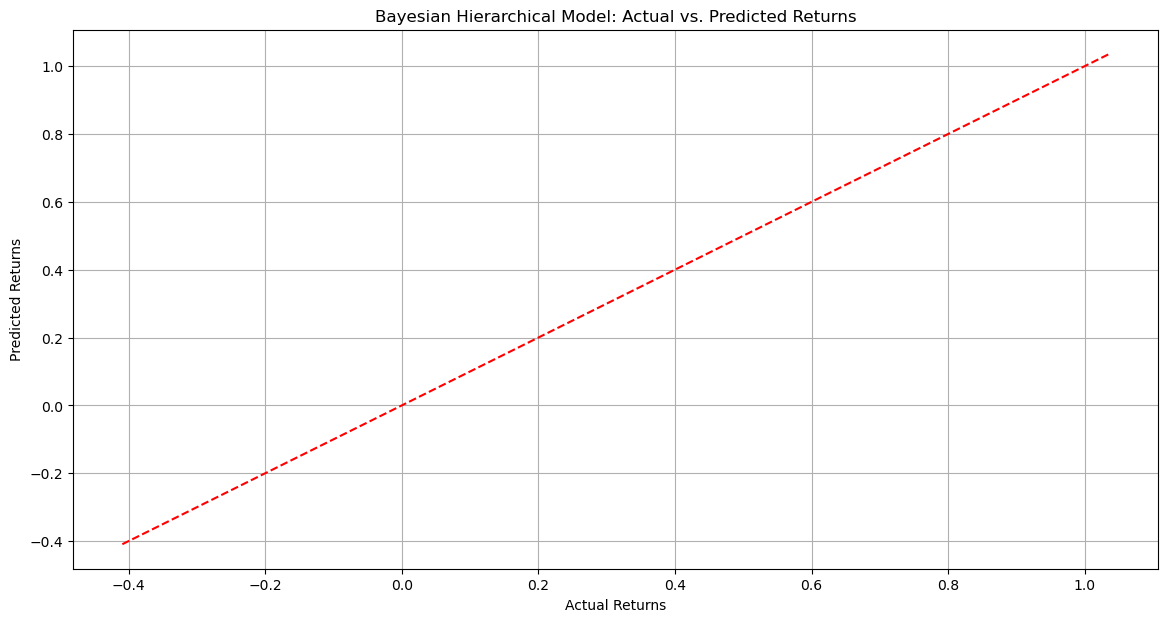

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# For the Bayesian Hierarchical Model:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=actual_returns, y=predictions_df['Predicted_Return'])
plt.plot([min(actual_returns), max(actual_returns)], [min(actual_returns), max(actual_returns)], color='red', linestyle='--')
plt.title("Bayesian Hierarchical Model: Actual vs. Predicted Returns")
plt.xlabel("Actual Returns")
plt.ylabel("Predicted Returns")
plt.grid(True)
plt.show()

In [ ]:
# Residual Analysis

C:\Users\saide\anaconda3\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\saide\anaconda3\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


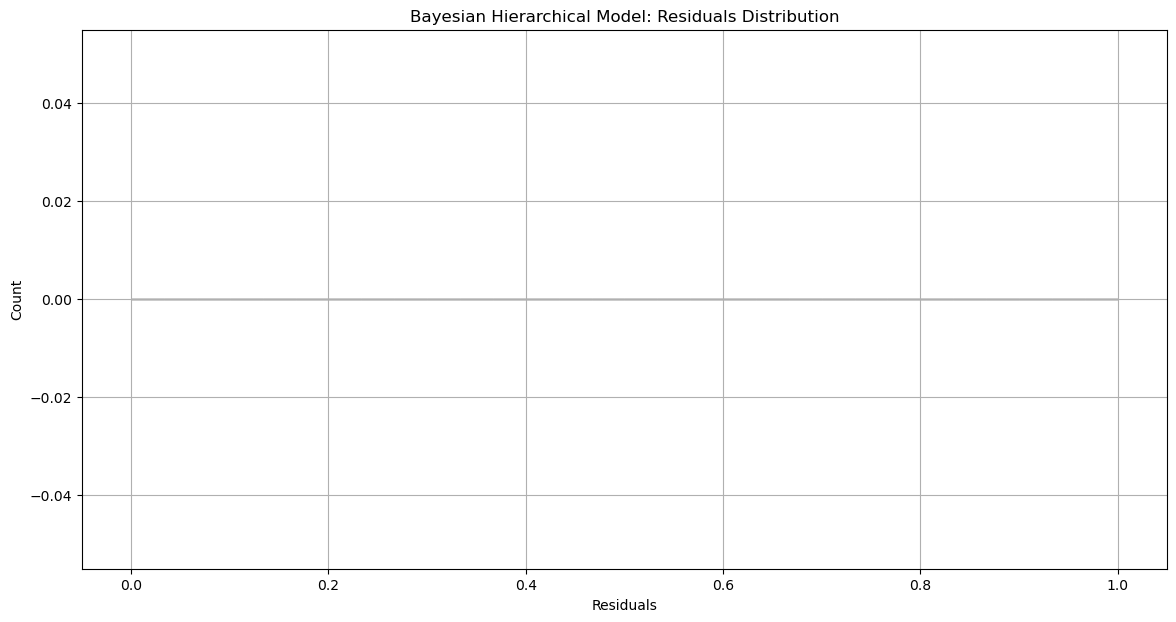

In [14]:
# Calculate residuals for both models
residuals_bhm = actual_returns - predictions_df['Predicted_Return']

# Residuals histogram for Bayesian Hierarchical Model
plt.figure(figsize=(14, 7))
sns.histplot(residuals_bhm, bins=30, kde=True)
plt.title("Bayesian Hierarchical Model: Residuals Distribution")
plt.xlabel("Residuals")
plt.grid(True)
plt.show()

### Heatmaps for predicted returns

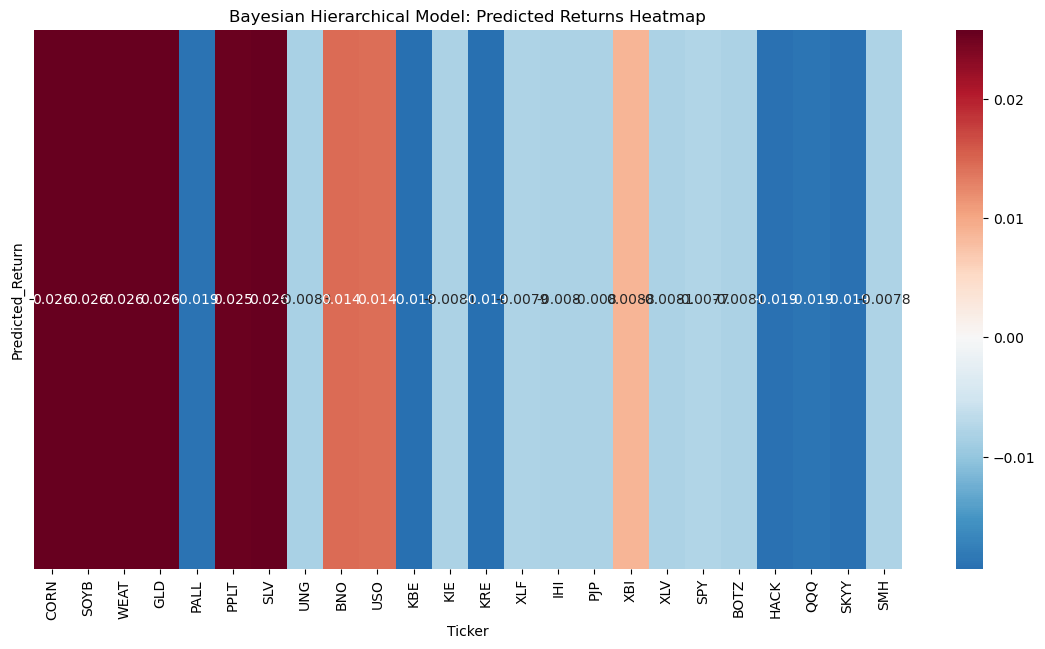

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# For Bayesian Hierarchical Model:
plt.figure(figsize=(14, 7))
sns.heatmap(predictions_df[['Ticker', 'Predicted_Return']].set_index('Ticker').T, cmap='RdBu_r', annot=True, center=0)
plt.title("Bayesian Hierarchical Model: Predicted Returns Heatmap")
plt.show()

### UPDATE 13_11_2023

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sector_alpha, sector_sigma, etf_alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 134 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


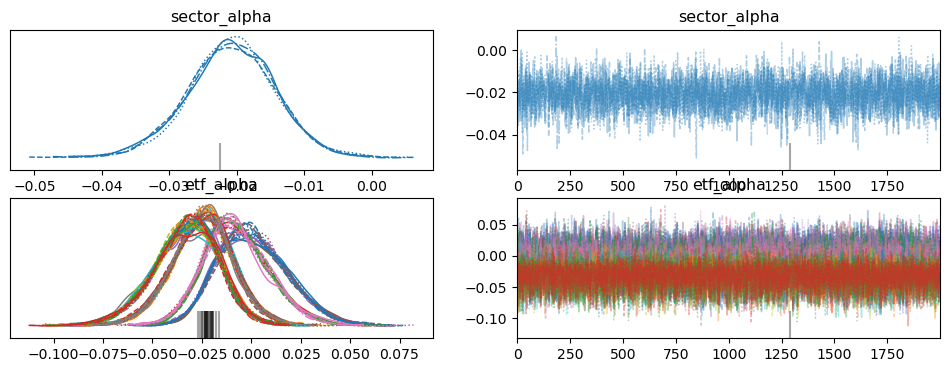

NameError: name 'future_optimized_weights' is not defined

In [2]:
import pymc as pm
import pandas as pd
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
from collections import defaultdict

# Load data
df = pd.read_excel('etf_ei_merged_data.xlsx')
df['Date'] = pd.to_datetime(df['Date'])

# Filtering data from 2018 to 2022
df_train = df[(df['Date'] >= '2018-01-01') & (df['Date'] <= '2022-12-31')]

# Set up a list of unique sectors and ETFs
sectors = df_train['Sector'].unique().tolist()
etfs = df_train['Ticker'].unique().tolist()

# Integrate the views from the Black-Litterman model
combined_views = defaultdict(float)
signal_views = defaultdict(dict)


# Moving Average Signal
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['MA_50'] > ticker_data['MA_200']:
        signal_views[ticker]['ma_signal'] = 0.02

# Momentum-based views
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['momentum'] > 0:
        signal_views[ticker]['momentum_signal'] = 0.03
    elif ticker_data['momentum'] < 0:
        signal_views[ticker]['momentum_signal'] = -0.03

# Volume-based views
average_volume = df.groupby('Ticker')['Volume'].mean()
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['Volume'] > 1.5 * average_volume[ticker]:
        signal_views[ticker]['volume_signal'] = 0.02

# BCI-based views
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['bci'] > 100:
        if ticker_data['Sector'] == 'Banking':
            signal_views[ticker]['bci_signal_banking'] = 0.025
        elif ticker_data['Sector'] == 'Gold':
            signal_views[ticker]['bci_signal_gold'] = -0.025

# CCI-based views
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['cci'] > 100:
        if ticker_data['Sector'] == 'Retail' or ticker_data['Sector'] == 'Technology':
            signal_views[ticker]['cci_signal'] = 0.02

# Interest rate views
if df.iloc[-1]['long_term_ir'] - df.iloc[-30]['long_term_ir'] > df.iloc[-1]['short_term_ir'] - df.iloc[-30]['short_term_ir']:
    for ticker in df[df['Sector'] == 'Banking']['Ticker'].unique():
        signal_views[ticker]['ir_signal'] = 0.015

# Moving average crossover views
for ticker in df['Ticker'].unique():
    recent_data = df[df['Ticker'] == ticker].tail(2)
    if recent_data.iloc[0]['MA_50'] < recent_data.iloc[0]['MA_200'] and recent_data.iloc[1]['MA_50'] > recent_data.iloc[1]['MA_200']:
        signal_views[ticker]['ma_crossover_signal'] = 0.03
    elif recent_data.iloc[0]['MA_50'] > recent_data.iloc[0]['MA_200'] and recent_data.iloc[1]['MA_50'] < recent_data.iloc[1]['MA_200']:
        signal_views[ticker]['ma_crossover_signal'] = -0.03

def ma_signal(ticker_data):
    return 0.02 if ticker_data['MA_50'] > ticker_data['MA_200'] else 0

def momentum_signal(ticker_data):
    if ticker_data['momentum'] > 0:
        return 0.03
    elif ticker_data['momentum'] < 0:
        return -0.03
    return 0

def volume_signal(ticker_data, average_volume):
    return 0.02 if ticker_data['Volume'] > 1.5 * average_volume else 0

def bci_signal(ticker_data):
    if ticker_data['bci'] > 100:
        if ticker_data['Sector'] == 'Banking':
            return 0.025
        elif ticker_data['Sector'] == 'Gold':
            return -0.025
    return 0

def cci_signal(ticker_data):
    if ticker_data['cci'] > 100 and ticker_data['Sector'] in ['Retail', 'Technology']:
        return 0.02
    return 0

def ir_signal(ticker_data, df):
    if df.iloc[-1]['long_term_ir'] - df.iloc[-30]['long_term_ir'] > df.iloc[-1]['short_term_ir'] - df.iloc[-30]['short_term_ir']:
        if ticker_data['Sector'] == 'Banking':
            return 0.015
    return 0

# ... (Views generation code remains the same)

# Applying the views on the dataframe
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    
    average_volume = df[df['Ticker'] == ticker]['Volume'].mean()
    
    signal_views[ticker]['ma_signal'] = ma_signal(ticker_data)
    signal_views[ticker]['momentum_signal'] = momentum_signal(ticker_data)
    signal_views[ticker]['volume_signal'] = volume_signal(ticker_data, average_volume)
    signal_views[ticker]['bci_signal'] = bci_signal(ticker_data)
    signal_views[ticker]['cci_signal'] = cci_signal(ticker_data)
    signal_views[ticker]['ir_signal'] = ir_signal(ticker_data, df)
    
    # ... Apply the rest of your views in a similar fashion ...

# Combine views
for ticker, views_dict in signal_views.items():
    combined_view = sum(views_dict.values())
    combined_views[ticker] = combined_view

# Capping views
MAX_VIEW = 0.05
MIN_VIEW = -0.05
for ticker, view in combined_views.items():
    if view > MAX_VIEW:
        combined_views[ticker] = MAX_VIEW
    elif view < MIN_VIEW:
        combined_views[ticker] = MIN_VIEW

# Assuming 'prices_all' is your DataFrame with daily prices of all assets for the entire period
prices_all = df.pivot(index='Date', columns='Ticker', values='Close')

# Assuming 'prices_2023' is your DataFrame with daily prices of all assets for 2023
prices_2023 = df[df['Date'] >= '2023-01-01'].pivot(index='Date', columns='Ticker', values='Close')

# Calculate historical returns for all assets
returns_all = prices_all.pct_change()

# Calculate expected returns using the Bayesian Hierarchical Model (BHM)
priors_mean = {ticker: combined_views.get(ticker, 0) for ticker in etfs}

with pm.Model() as model:
    # Hyperpriors for sectors
    sector_alpha = pm.Normal('sector_alpha', mu=0, sigma=0.5)
    sector_sigma = pm.HalfNormal('sector_sigma', sigma=0.5)
    
    # ETF-specific parameters
    etf_alpha = pm.Normal('etf_alpha', mu=sector_alpha, sigma=sector_sigma, shape=len(etfs))
    
    # Implementing views as priors
    mu = pm.Deterministic('mu', etf_alpha + np.array([priors_mean[ticker] for ticker in etfs]))
    
    # Capture the observed data
    for idx, ticker in enumerate(etfs):
        returns = df_train[df_train['Ticker'] == ticker]['log_return'].values
        pm.Normal(ticker, mu=mu[idx], observed=returns)
        
    # Sample
    trace = pm.sample(2000, tune=1000, target_accept=0.99)

# Visualizing the results
az.plot_trace(trace, var_names=['sector_alpha', 'etf_alpha'])
plt.show()

# Extract etf_alpha samples from trace
etf_alpha_samples = trace.posterior['etf_alpha'].values.reshape(-1, len(etfs))

# Recreating 'mu' values from the samples
mu_samples = etf_alpha_samples + np.array([priors_mean[ticker] for ticker in etfs])

# Calculating predicted returns
predicted_returns = np.mean(mu_samples, axis=0)
predictions_df = pd.DataFrame({
    'Ticker': etfs,
    'Predicted_Return': predicted_returns
})

# Assuming 'future_optimized_weights' is the variable storing optimized weights from the Black-Litterman model
# Portfolio Construction for 2023 using the weights optimized using Black-Litterman model outputs
portfolio_returns_2023 = prices_2023.pct_change() * pd.Series(future_optimized_weights)

# Calculate cumulative returns for both simulated portfolio and actual market data
cumulative_returns_2023_simulated = (1 + portfolio_returns_2023).cumprod()
cumulative_returns_2023_actual = (1 + prices_2023.pct_change().sum(axis=1)).cumprod()

# Visualization
plt.figure(figsize=(10, 5))
plt.plot(cumulative_returns_2023_simulated, label="Simulated Portfolio")
plt.plot(cumulative_returns_2023_actual, label="Actual Market Data")
plt.title("Comparison of Simulated Portfolio vs Actual Market Data")
plt.legend()
plt.show()

# Calculate performance metrics
total_return_simulated = cumulative_returns_2023_simulated.iloc[-1] - 1
total_return_actual = cumulative_returns_2023_actual.iloc[-1] - 1

sharpe_ratio_simulated = portfolio_returns_2023.sum(axis=1).mean() / portfolio_returns_2023.sum(axis=1).std()
sharpe_ratio_actual = prices_2023.pct_change().sum(axis=1).mean() / prices_2023.pct_change().sum(axis=1).std()

max_drawdown_simulated = (cumulative_returns_2023_simulated / cumulative_returns_2023_simulated.cummax() - 1).min()
max_drawdown_actual = (cumulative_returns_2023_actual / cumulative_returns_2023_actual.cummax() - 1).min()

print("Performance Metrics for Simulated Portfolio:")
print(f"Total Return: {total_return_simulated:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio_simulated:.2f}")
print(f"Max Drawdown: {max_drawdown_simulated:.2%}")

print("\nPerformance Metrics for Actual Market Data:")
print(f"Total Return: {total_return_actual:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio_actual:.2f}")
print(f"Max Drawdown: {max_drawdown_actual:.2%}")


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sector_alpha, sector_sigma, etf_alpha]


Sampling 3 chains for 1_000 tune and 467 draw iterations (3_000 + 1_401 draws total) took 109 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


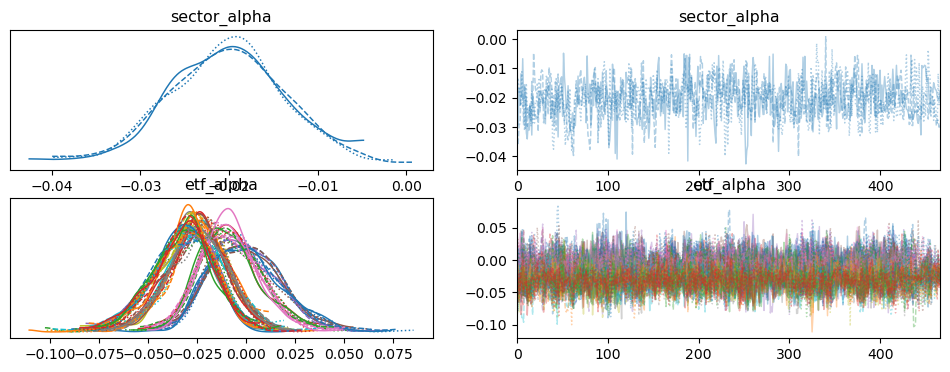

NameError: name 'cumulative_returns_2023_bhm' is not defined

<Figure size 1000x500 with 0 Axes>

In [9]:
# ... (Previous code remains the same)
import pymc as pm
import pandas as pd
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
from collections import defaultdict

# Load data
df = pd.read_excel('etf_ei_merged_data.xlsx')
df['Date'] = pd.to_datetime(df['Date'])

# Filtering data from 2018 to 2022
df_train = df[(df['Date'] >= '2018-01-01') & (df['Date'] <= '2022-12-31')]

# Set up a list of unique sectors and ETFs
sectors = df_train['Sector'].unique().tolist()
etfs = df_train['Ticker'].unique().tolist()

# Integrate the views from the Black-Litterman model
combined_views = defaultdict(float)
signal_views = defaultdict(dict)


# Moving Average Signal
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['MA_50'] > ticker_data['MA_200']:
        signal_views[ticker]['ma_signal'] = 0.02

# Momentum-based views
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['momentum'] > 0:
        signal_views[ticker]['momentum_signal'] = 0.03
    elif ticker_data['momentum'] < 0:
        signal_views[ticker]['momentum_signal'] = -0.03

# Volume-based views
average_volume = df.groupby('Ticker')['Volume'].mean()
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['Volume'] > 1.5 * average_volume[ticker]:
        signal_views[ticker]['volume_signal'] = 0.02

# BCI-based views
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['bci'] > 100:
        if ticker_data['Sector'] == 'Banking':
            signal_views[ticker]['bci_signal_banking'] = 0.025
        elif ticker_data['Sector'] == 'Gold':
            signal_views[ticker]['bci_signal_gold'] = -0.025

# CCI-based views
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['cci'] > 100:
        if ticker_data['Sector'] == 'Retail' or ticker_data['Sector'] == 'Technology':
            signal_views[ticker]['cci_signal'] = 0.02

# Interest rate views
if df.iloc[-1]['long_term_ir'] - df.iloc[-30]['long_term_ir'] > df.iloc[-1]['short_term_ir'] - df.iloc[-30]['short_term_ir']:
    for ticker in df[df['Sector'] == 'Banking']['Ticker'].unique():
        signal_views[ticker]['ir_signal'] = 0.015

# Moving average crossover views
for ticker in df['Ticker'].unique():
    recent_data = df[df['Ticker'] == ticker].tail(2)
    if recent_data.iloc[0]['MA_50'] < recent_data.iloc[0]['MA_200'] and recent_data.iloc[1]['MA_50'] > recent_data.iloc[1]['MA_200']:
        signal_views[ticker]['ma_crossover_signal'] = 0.03
    elif recent_data.iloc[0]['MA_50'] > recent_data.iloc[0]['MA_200'] and recent_data.iloc[1]['MA_50'] < recent_data.iloc[1]['MA_200']:
        signal_views[ticker]['ma_crossover_signal'] = -0.03

def ma_signal(ticker_data):
    return 0.02 if ticker_data['MA_50'] > ticker_data['MA_200'] else 0

def momentum_signal(ticker_data):
    if ticker_data['momentum'] > 0:
        return 0.03
    elif ticker_data['momentum'] < 0:
        return -0.03
    return 0

def volume_signal(ticker_data, average_volume):
    return 0.02 if ticker_data['Volume'] > 1.5 * average_volume else 0

def bci_signal(ticker_data):
    if ticker_data['bci'] > 100:
        if ticker_data['Sector'] == 'Banking':
            return 0.025
        elif ticker_data['Sector'] == 'Gold':
            return -0.025
    return 0

def cci_signal(ticker_data):
    if ticker_data['cci'] > 100 and ticker_data['Sector'] in ['Retail', 'Technology']:
        return 0.02
    return 0

def ir_signal(ticker_data, df):
    if df.iloc[-1]['long_term_ir'] - df.iloc[-30]['long_term_ir'] > df.iloc[-1]['short_term_ir'] - df.iloc[-30]['short_term_ir']:
        if ticker_data['Sector'] == 'Banking':
            return 0.015
    return 0

# ... (Views generation code remains the same)

# Applying the views on the dataframe
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    
    average_volume = df[df['Ticker'] == ticker]['Volume'].mean()
    
    signal_views[ticker]['ma_signal'] = ma_signal(ticker_data)
    signal_views[ticker]['momentum_signal'] = momentum_signal(ticker_data)
    signal_views[ticker]['volume_signal'] = volume_signal(ticker_data, average_volume)
    signal_views[ticker]['bci_signal'] = bci_signal(ticker_data)
    signal_views[ticker]['cci_signal'] = cci_signal(ticker_data)
    signal_views[ticker]['ir_signal'] = ir_signal(ticker_data, df)
    
    # ... Apply the rest of your views in a similar fashion ...

# Combine views
for ticker, views_dict in signal_views.items():
    combined_view = sum(views_dict.values())
    combined_views[ticker] = combined_view

# Capping views
MAX_VIEW = 0.05
MIN_VIEW = -0.05
for ticker, view in combined_views.items():
    if view > MAX_VIEW:
        combined_views[ticker] = MAX_VIEW
    elif view < MIN_VIEW:
        combined_views[ticker] = MIN_VIEW

# Assuming 'prices_all' is your DataFrame with daily prices of all assets for the entire period
prices_all = df.pivot(index='Date', columns='Ticker', values='Close')

# Assuming 'prices_2023' is your DataFrame with daily prices of all assets for 2023
prices_2023 = df[df['Date'] >= '2023-01-01'].pivot(index='Date', columns='Ticker', values='Close')

# Calculate historical returns for all assets
returns_all = prices_all.pct_change()

# Calculate expected returns using the Bayesian Hierarchical Model (BHM)
priors_mean = {ticker: combined_views.get(ticker, 0) for ticker in etfs}

with pm.Model() as model:
    # Hyperpriors for sectors
    sector_alpha = pm.Normal('sector_alpha', mu=0, sigma=0.5)
    sector_sigma = pm.HalfNormal('sector_sigma', sigma=0.5)
    
    # ETF-specific parameters
    etf_alpha = pm.Normal('etf_alpha', mu=sector_alpha, sigma=sector_sigma, shape=len(etfs))
    
    # Implementing views as priors
    mu = pm.Deterministic('mu', etf_alpha + np.array([priors_mean[ticker] for ticker in etfs]))
    
    # Capture the observed data
    for idx, ticker in enumerate(etfs):
        returns = df_train[df_train['Ticker'] == ticker]['log_return'].values
        pm.Normal(ticker, mu=mu[idx], observed=returns)
        
    # Sample
    trace = pm.sample(2000, tune=1000, target_accept=0.99)

# Visualizing the results
az.plot_trace(trace, var_names=['sector_alpha', 'etf_alpha'])
plt.show()

# Extract etf_alpha samples from trace
etf_alpha_samples = trace.posterior['etf_alpha'].values.reshape(-1, len(etfs))

# ... (Previous code remains the same)

# Assuming 'etf_alpha_samples' is the variable storing samples of etf_alpha from the BHM trace
# Recreating 'mu' values from the samples
mu_samples = etf_alpha_samples + np.array([priors_mean[ticker] for ticker in etfs])

# Calculate the mean of posterior returns as expected returns
expected_returns_bhm = np.mean(mu_samples, axis=0)

# Assuming 'prices_2023' is your DataFrame with daily prices of all assets for 2023
# Portfolio Construction for 2023 using the mean of posterior returns
portfolio_returns_2023_bhm = prices_2023.pct_change() * pd.Series(expected_returns_bhm)

# Visualization for BHM Simulated Portfolio
plt.figure(figsize=(10, 5))

# Plot BHM simulated portfolio returns for all tickers
for ticker in cumulative_returns_2023_bhm.columns:
    plt.plot(cumulative_returns_2023_bhm[ticker], label=f"BHM Simulated Portfolio ({ticker})", alpha=0.7)

plt.title("BHM Simulated Portfolio Performance")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()


# Assuming 'equal_weights' is the variable storing equal weights for each ticker
# Portfolio Construction for 2023 for actual market data using equal weights
equal_weights = 1 / len(etfs)
actual_returns_2023 = prices_2023.pct_change() * equal_weights

# Calculate cumulative returns for actual market data
cumulative_returns_2023_actual = (1 + actual_returns_2023.sum(axis=1)).cumprod()

# Visualization
plt.figure(figsize=(10, 5))
plt.plot(cumulative_returns_2023_actual, label="Actual Market Data")
plt.title("Actual Market Data Performance")
plt.legend()
plt.show()

# Calculate performance metrics for BHM simulated portfolio
total_return_bhm = cumulative_returns_2023_bhm.iloc[-1] - 1
sharpe_ratio_bhm = portfolio_returns_2023_bhm.sum(axis=1).mean() / portfolio_returns_2023_bhm.sum(axis=1).std()
max_drawdown_bhm = (cumulative_returns_2023_bhm / cumulative_returns_2023_bhm.cummax() - 1).min()

# Print performance metrics for BHM simulated portfolio
print("Performance Metrics for BHM Simulated Portfolio:")
print(f"Total Return: {total_return_bhm.values[0]:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio_bhm:.2f}")
print(f"Max Drawdown: {max_drawdown_bhm.values[0]:.2%}")

# Calculate performance metrics for actual market data
total_return_actual = cumulative_returns_2023_actual.iloc[-1] - 1
sharpe_ratio_actual = actual_returns_2023.sum(axis=1).mean() / actual_returns_2023.sum(axis=1).std()
max_drawdown_actual = (cumulative_returns_2023_actual / cumulative_returns_2023_actual.cummax() - 1).min()

print("\nPerformance Metrics for Actual Market Data:")
print(f"Total Return: {total_return_actual:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio_actual:.2f}")
print(f"Max Drawdown: {max_drawdown_actual:.2%}")


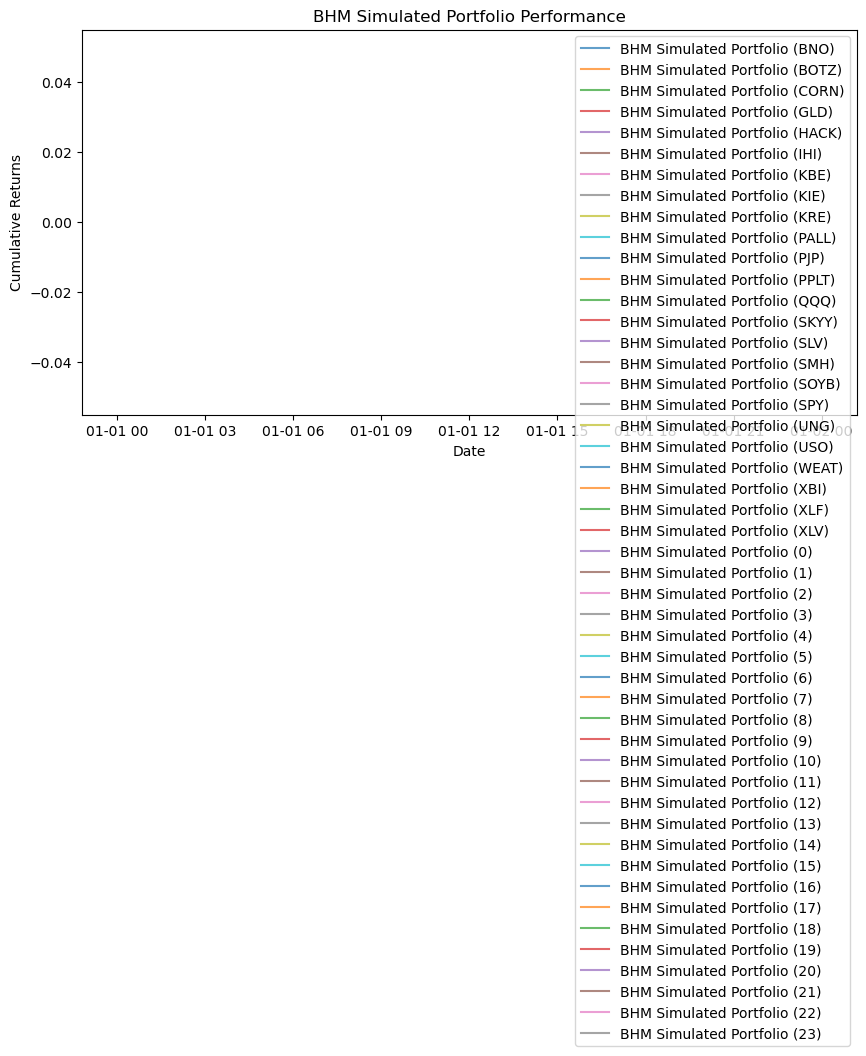

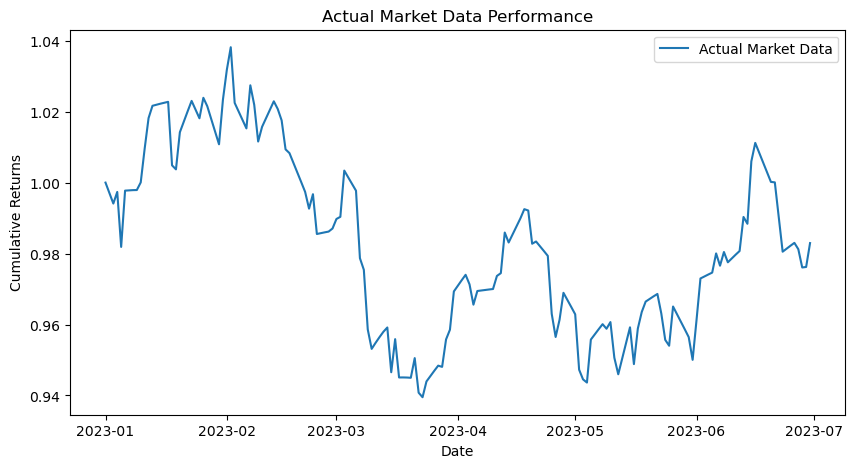

Performance Metrics for BHM Simulated Portfolio:
Total Return: nan%
Sharpe Ratio: nan
Max Drawdown: nan%

Performance Metrics for Actual Market Data:
Total Return: -1.70%
Sharpe Ratio: -0.06
Max Drawdown: -9.50%


In [8]:
# ... (Previous code remains the same)

# Calculate the mean of posterior returns as expected returns
expected_returns_bhm = np.mean(mu_samples, axis=0)

# Assuming 'prices_2023' is your DataFrame with daily prices of all assets for 2023
# Portfolio Construction for 2023 using the mean of posterior returns
portfolio_returns_2023_bhm = prices_2023.pct_change() * pd.Series(expected_returns_bhm)

# Calculate cumulative returns for BHM simulated portfolio
cumulative_returns_2023_bhm = (1 + portfolio_returns_2023_bhm).cumprod()

# Visualization for BHM Simulated Portfolio
plt.figure(figsize=(10, 5))

# Plot BHM simulated portfolio returns for all tickers
for ticker in cumulative_returns_2023_bhm.columns:
    plt.plot(cumulative_returns_2023_bhm[ticker], label=f"BHM Simulated Portfolio ({ticker})", alpha=0.7)

plt.title("BHM Simulated Portfolio Performance")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()

# Assuming 'equal_weights' is the variable storing equal weights for each ticker
# Portfolio Construction for 2023 for actual market data using equal weights
equal_weights = 1 / len(etfs)
actual_returns_2023 = prices_2023.pct_change() * equal_weights

# Calculate cumulative returns for actual market data
cumulative_returns_2023_actual = (1 + actual_returns_2023.sum(axis=1)).cumprod()

# Visualization
plt.figure(figsize=(10, 5))
plt.plot(cumulative_returns_2023_actual, label="Actual Market Data")
plt.title("Actual Market Data Performance")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()

# Calculate performance metrics for BHM simulated portfolio
total_return_bhm = cumulative_returns_2023_bhm.iloc[-1] - 1
sharpe_ratio_bhm = portfolio_returns_2023_bhm.mean().mean() / portfolio_returns_2023_bhm.mean().std()
max_drawdown_bhm = (cumulative_returns_2023_bhm / cumulative_returns_2023_bhm.cummax() - 1).min()

# Print performance metrics for BHM simulated portfolio
print("Performance Metrics for BHM Simulated Portfolio:")
print(f"Total Return: {total_return_bhm.mean():.2%}")
print(f"Sharpe Ratio: {sharpe_ratio_bhm:.2f}")
print(f"Max Drawdown: {max_drawdown_bhm.mean():.2%}")

# Calculate performance metrics for actual market data
total_return_actual = cumulative_returns_2023_actual.iloc[-1] - 1
sharpe_ratio_actual = actual_returns_2023.mean().mean() / actual_returns_2023.mean().std()
max_drawdown_actual = (cumulative_returns_2023_actual / cumulative_returns_2023_actual.cummax() - 1).min()

print("\nPerformance Metrics for Actual Market Data:")
print(f"Total Return: {total_return_actual:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio_actual:.2f}")
print(f"Max Drawdown: {max_drawdown_actual:.2%}")

In [2]:
# print(prices_all)
df.info()
prices_all.info()
privces_2023.info()

NameError: name 'df' is not defined

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sector_alpha, sector_sigma, etf_alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 348 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


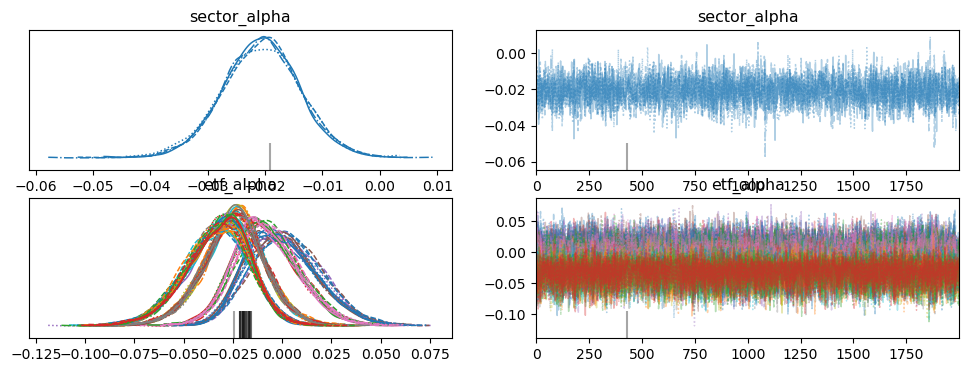

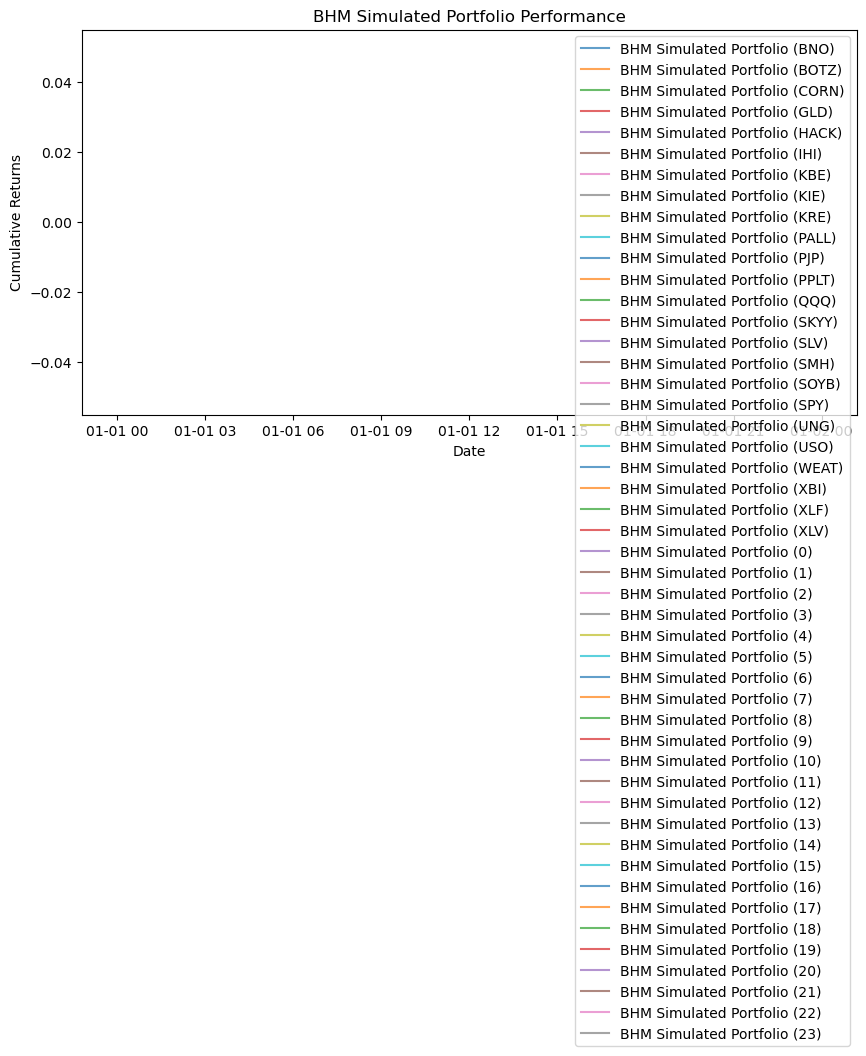

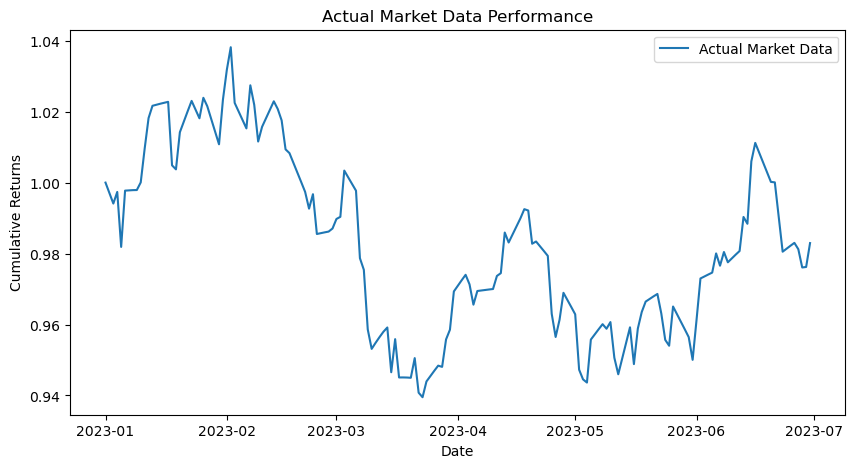

Performance Metrics for BHM Simulated Portfolio:
Total Return: nan%
Sharpe Ratio: nan
Max Drawdown: nan%

Performance Metrics for Actual Market Data:
Total Return: -1.70%
Sharpe Ratio: -0.06
Max Drawdown: -9.50%


In [9]:
# ... (Previous code remains the same)

# Assuming 'prices_all' is your DataFrame with daily prices of all assets for the entire period
prices_all = df.pivot(index='Date', columns='Ticker', values='Close')

# Assuming 'prices_2023' is your DataFrame with daily prices of all assets for 2023
prices_2023 = df[df['Date'] >= '2023-01-01'].pivot(index='Date', columns='Ticker', values='Close')

# Calculate historical returns for all assets
returns_all = prices_all.pct_change()

# Calculate expected returns using the Bayesian Hierarchical Model (BHM)
priors_mean = {ticker: combined_views.get(ticker, 0) for ticker in etfs}

with pm.Model() as model:
    # Hyperpriors for sectors
    sector_alpha = pm.Normal('sector_alpha', mu=0, sigma=0.5)
    sector_sigma = pm.HalfNormal('sector_sigma', sigma=0.5)
    
    # ETF-specific parameters
    etf_alpha = pm.Normal('etf_alpha', mu=sector_alpha, sigma=sector_sigma, shape=len(etfs))
    
    # Implementing views as priors
    mu = pm.Deterministic('mu', etf_alpha + np.array([priors_mean[ticker] for ticker in etfs]))
    
    # Capture the observed data
    for idx, ticker in enumerate(etfs):
        returns = df_train[df_train['Ticker'] == ticker]['log_return'].values
        pm.Normal(ticker, mu=mu[idx], observed=returns)
        
    # Sample
    trace = pm.sample(2000, tune=1000, target_accept=0.99)

# Visualizing the results
az.plot_trace(trace, var_names=['sector_alpha', 'etf_alpha'])
plt.show()

# Extract etf_alpha samples from trace
etf_alpha_samples = trace.posterior['etf_alpha'].values.reshape(-1, len(etfs))

# Recreating 'mu' values from the samples
mu_samples = etf_alpha_samples + np.array([priors_mean[ticker] for ticker in etfs])

# Calculate the mean of posterior returns as expected returns
expected_returns_bhm = np.mean(mu_samples, axis=0)

# Portfolio Construction for 2023 using the mean of posterior returns
portfolio_returns_2023_bhm = prices_2023.pct_change() * pd.Series(expected_returns_bhm)

# Calculate cumulative returns for BHM simulated portfolio
cumulative_returns_2023_bhm = (1 + portfolio_returns_2023_bhm).cumprod()

# Visualization for BHM Simulated Portfolio
plt.figure(figsize=(10, 5))

# Plot BHM simulated portfolio returns for all tickers
for ticker in cumulative_returns_2023_bhm.columns:
    plt.plot(cumulative_returns_2023_bhm[ticker], label=f"BHM Simulated Portfolio ({ticker})", alpha=0.7)

plt.title("BHM Simulated Portfolio Performance")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()

# Portfolio Construction for 2023 for actual market data using equal weights
equal_weights = 1 / len(etfs)
actual_returns_2023 = prices_2023.pct_change() * equal_weights

# Calculate cumulative returns for actual market data
cumulative_returns_2023_actual = (1 + actual_returns_2023.sum(axis=1)).cumprod()

# Visualization
plt.figure(figsize=(10, 5))
plt.plot(cumulative_returns_2023_actual, label="Actual Market Data")
plt.title("Actual Market Data Performance")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()

# Calculate performance metrics for BHM simulated portfolio
total_return_bhm = cumulative_returns_2023_bhm.iloc[-1] - 1
sharpe_ratio_bhm = portfolio_returns_2023_bhm.mean().mean() / portfolio_returns_2023_bhm.mean().std()
max_drawdown_bhm = (cumulative_returns_2023_bhm / cumulative_returns_2023_bhm.cummax() - 1).min()

# Print performance metrics for BHM simulated portfolio
print("Performance Metrics for BHM Simulated Portfolio:")
print(f"Total Return: {total_return_bhm.mean():.2%}")
print(f"Sharpe Ratio: {sharpe_ratio_bhm:.2f}")
print(f"Max Drawdown: {max_drawdown_bhm.mean():.2%}")

# Calculate performance metrics for actual market data
total_return_actual = cumulative_returns_2023_actual.iloc[-1] - 1
sharpe_ratio_actual = actual_returns_2023.mean().mean() / actual_returns_2023.mean().std()
max_drawdown_actual = (cumulative_returns_2023_actual / cumulative_returns_2023_actual.cummax() - 1).min()

print("\nPerformance Metrics for Actual Market Data:")
print(f"Total Return: {total_return_actual:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio_actual:.2f}")
print(f"Max Drawdown: {max_drawdown_actual:.2%}")

In [5]:
# print(prices_all)
df.info()
prices_all.info()
prices_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48168 entries, 0 to 48167
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           48168 non-null  datetime64[ns]
 1   Open           48168 non-null  float64       
 2   High           48168 non-null  float64       
 3   Low            48168 non-null  float64       
 4   Close          48168 non-null  float64       
 5   Adj Close      48168 non-null  float64       
 6   Volume         48168 non-null  float64       
 7   Sector         48168 non-null  object        
 8   Ticker         48168 non-null  object        
 9   log_return     48168 non-null  float64       
 10  daily_return   48168 non-null  float64       
 11  volatility     48168 non-null  float64       
 12  momentum       48168 non-null  float64       
 13  Direction      48168 non-null  int64         
 14  MA_50          48168 non-null  float64       
 15  MA_100         4816

In [7]:
df.set_index('Date', inplace=True)
prices_all.set_index('Date', inplace=True)
prices_2023.set_index('Date', inplace=True)

KeyError: "None of ['Date'] are in the columns"

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sector_alpha, sector_sigma, etf_alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 235 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


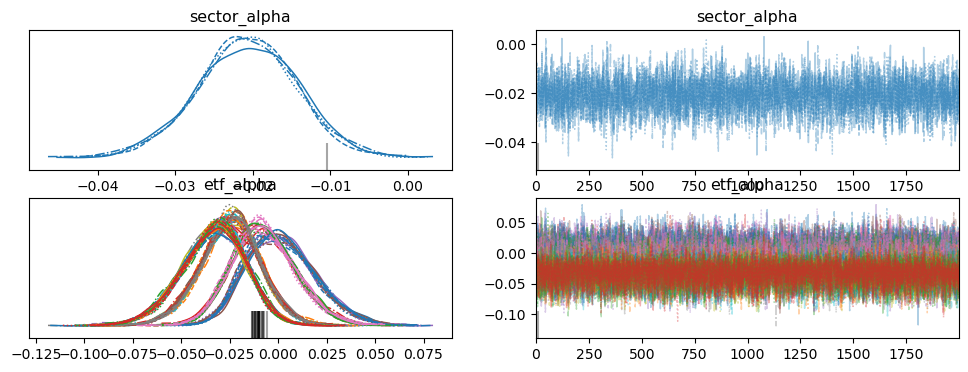

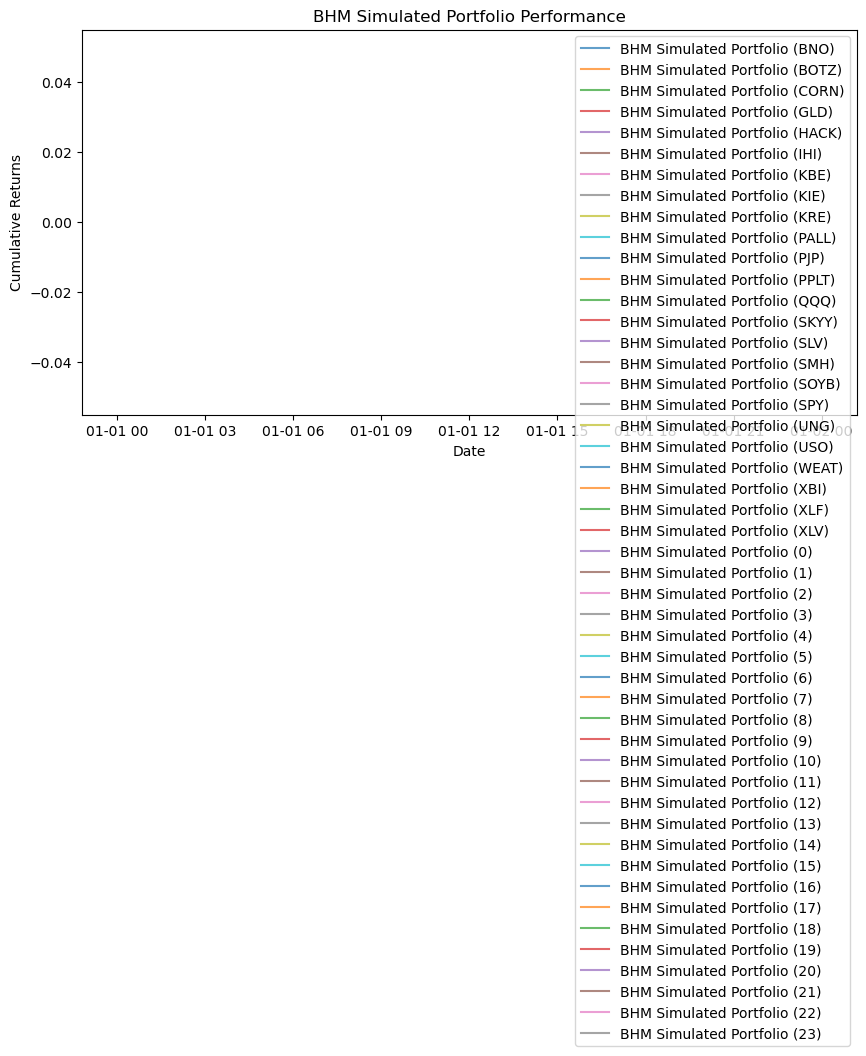

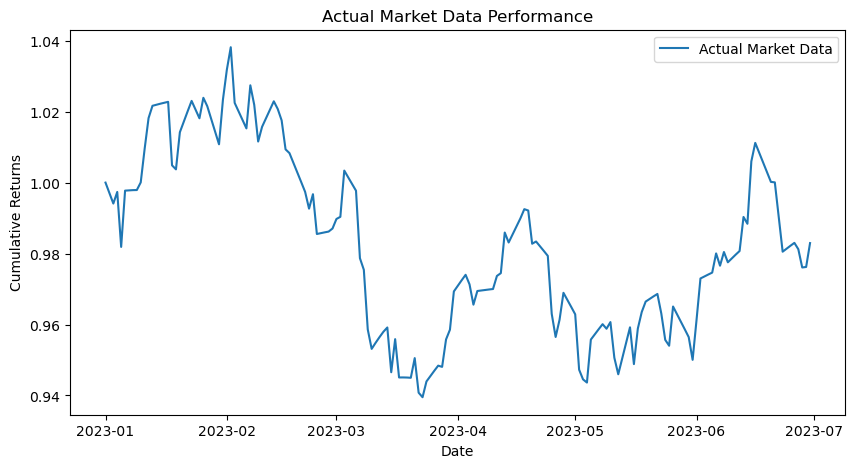

Performance Metrics for BHM Simulated Portfolio:
Total Return: nan%
Sharpe Ratio: nan
Max Drawdown: nan%

Performance Metrics for Actual Market Data:
Total Return: -1.70%
Sharpe Ratio: -0.06
Max Drawdown: -9.50%


In [10]:
# ... (Previous code remains the same)
import pymc as pm
import pandas as pd
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
from collections import defaultdict

# Load data
df = pd.read_excel('etf_ei_merged_data.xlsx')
df['Date'] = pd.to_datetime(df['Date'])

# Filtering data from 2018 to 2022
df_train = df[(df['Date'] >= '2018-01-01') & (df['Date'] <= '2022-12-31')]

# Set up a list of unique sectors and ETFs
sectors = df_train['Sector'].unique().tolist()
etfs = df_train['Ticker'].unique().tolist()

# Integrate the views from the Black-Litterman model
combined_views = defaultdict(float)
signal_views = defaultdict(dict)


# Moving Average Signal
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['MA_50'] > ticker_data['MA_200']:
        signal_views[ticker]['ma_signal'] = 0.02

# Momentum-based views
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['momentum'] > 0:
        signal_views[ticker]['momentum_signal'] = 0.03
    elif ticker_data['momentum'] < 0:
        signal_views[ticker]['momentum_signal'] = -0.03

# Volume-based views
average_volume = df.groupby('Ticker')['Volume'].mean()
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['Volume'] > 1.5 * average_volume[ticker]:
        signal_views[ticker]['volume_signal'] = 0.02

# BCI-based views
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['bci'] > 100:
        if ticker_data['Sector'] == 'Banking':
            signal_views[ticker]['bci_signal_banking'] = 0.025
        elif ticker_data['Sector'] == 'Gold':
            signal_views[ticker]['bci_signal_gold'] = -0.025

# CCI-based views
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['cci'] > 100:
        if ticker_data['Sector'] == 'Retail' or ticker_data['Sector'] == 'Technology':
            signal_views[ticker]['cci_signal'] = 0.02

# Interest rate views
if df.iloc[-1]['long_term_ir'] - df.iloc[-30]['long_term_ir'] > df.iloc[-1]['short_term_ir'] - df.iloc[-30]['short_term_ir']:
    for ticker in df[df['Sector'] == 'Banking']['Ticker'].unique():
        signal_views[ticker]['ir_signal'] = 0.015

# Moving average crossover views
for ticker in df['Ticker'].unique():
    recent_data = df[df['Ticker'] == ticker].tail(2)
    if recent_data.iloc[0]['MA_50'] < recent_data.iloc[0]['MA_200'] and recent_data.iloc[1]['MA_50'] > recent_data.iloc[1]['MA_200']:
        signal_views[ticker]['ma_crossover_signal'] = 0.03
    elif recent_data.iloc[0]['MA_50'] > recent_data.iloc[0]['MA_200'] and recent_data.iloc[1]['MA_50'] < recent_data.iloc[1]['MA_200']:
        signal_views[ticker]['ma_crossover_signal'] = -0.03

def ma_signal(ticker_data):
    return 0.02 if ticker_data['MA_50'] > ticker_data['MA_200'] else 0

def momentum_signal(ticker_data):
    if ticker_data['momentum'] > 0:
        return 0.03
    elif ticker_data['momentum'] < 0:
        return -0.03
    return 0

def volume_signal(ticker_data, average_volume):
    return 0.02 if ticker_data['Volume'] > 1.5 * average_volume else 0

def bci_signal(ticker_data):
    if ticker_data['bci'] > 100:
        if ticker_data['Sector'] == 'Banking':
            return 0.025
        elif ticker_data['Sector'] == 'Gold':
            return -0.025
    return 0

def cci_signal(ticker_data):
    if ticker_data['cci'] > 100 and ticker_data['Sector'] in ['Retail', 'Technology']:
        return 0.02
    return 0

def ir_signal(ticker_data, df):
    if df.iloc[-1]['long_term_ir'] - df.iloc[-30]['long_term_ir'] > df.iloc[-1]['short_term_ir'] - df.iloc[-30]['short_term_ir']:
        if ticker_data['Sector'] == 'Banking':
            return 0.015
    return 0

# ... (Views generation code remains the same)

# Applying the views on the dataframe
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    
    average_volume = df[df['Ticker'] == ticker]['Volume'].mean()
    
    signal_views[ticker]['ma_signal'] = ma_signal(ticker_data)
    signal_views[ticker]['momentum_signal'] = momentum_signal(ticker_data)
    signal_views[ticker]['volume_signal'] = volume_signal(ticker_data, average_volume)
    signal_views[ticker]['bci_signal'] = bci_signal(ticker_data)
    signal_views[ticker]['cci_signal'] = cci_signal(ticker_data)
    signal_views[ticker]['ir_signal'] = ir_signal(ticker_data, df)
    
    # ... Apply the rest of your views in a similar fashion ...

# Combine views
for ticker, views_dict in signal_views.items():
    combined_view = sum(views_dict.values())
    combined_views[ticker] = combined_view

# Capping views
MAX_VIEW = 0.05
MIN_VIEW = -0.05
for ticker, view in combined_views.items():
    if view > MAX_VIEW:
        combined_views[ticker] = MAX_VIEW
    elif view < MIN_VIEW:
        combined_views[ticker] = MIN_VIEW
        
# Assuming 'prices_all' is your DataFrame with daily prices of all assets for the entire period
prices_all = df.pivot(index='Date', columns='Ticker', values='Close')

# Assuming 'prices_2023' is your DataFrame with daily prices of all assets for 2023
prices_2023 = df[df['Date'] >= '2023-01-01'].pivot(index='Date', columns='Ticker', values='Close')

# Calculate historical returns for all assets
returns_all = prices_all.pct_change()

# Calculate expected returns using the Bayesian Hierarchical Model (BHM)
priors_mean = {ticker: combined_views.get(ticker, 0) for ticker in etfs}

with pm.Model() as model:
    # Hyperpriors for sectors
    sector_alpha = pm.Normal('sector_alpha', mu=0, sigma=0.5)
    sector_sigma = pm.HalfNormal('sector_sigma', sigma=0.5)
    
    # ETF-specific parameters
    etf_alpha = pm.Normal('etf_alpha', mu=sector_alpha, sigma=sector_sigma, shape=len(etfs))
    
    # Implementing views as priors
    mu = pm.Deterministic('mu', etf_alpha + np.array([priors_mean[ticker] for ticker in etfs]))
    
    # Capture the observed data
    for idx, ticker in enumerate(etfs):
        returns = df_train[df_train['Ticker'] == ticker]['log_return'].values
        pm.Normal(ticker, mu=mu[idx], observed=returns)
        
    # Sample
    trace = pm.sample(2000, tune=1000, target_accept=0.99)

# Visualizing the results
az.plot_trace(trace, var_names=['sector_alpha', 'etf_alpha'])
plt.show()

# Extract etf_alpha samples from trace
etf_alpha_samples = trace.posterior['etf_alpha'].values.reshape(-1, len(etfs))

# Recreating 'mu' values from the samples
mu_samples = etf_alpha_samples + np.array([priors_mean[ticker] for ticker in etfs])

# Calculate the mean of posterior returns as expected returns
expected_returns_bhm = np.mean(mu_samples, axis=0)

# Portfolio Construction for 2023 using the mean of posterior returns
portfolio_returns_2023_bhm = prices_2023.pct_change() * pd.Series(expected_returns_bhm)

# Calculate cumulative returns for BHM simulated portfolio
cumulative_returns_2023_bhm = (1 + portfolio_returns_2023_bhm).cumprod()

# Visualization for BHM Simulated Portfolio
plt.figure(figsize=(10, 5))

# Plot BHM simulated portfolio returns for all tickers
for ticker in cumulative_returns_2023_bhm.columns:
    plt.plot(cumulative_returns_2023_bhm[ticker], label=f"BHM Simulated Portfolio ({ticker})", alpha=0.7)

plt.title("BHM Simulated Portfolio Performance")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()

# Portfolio Construction for 2023 for actual market data using equal weights
equal_weights = 1 / len(etfs)
actual_returns_2023 = prices_2023.pct_change() * equal_weights

# Calculate cumulative returns for actual market data
cumulative_returns_2023_actual = (1 + actual_returns_2023.sum(axis=1)).cumprod()

# Visualization
plt.figure(figsize=(10, 5))
plt.plot(cumulative_returns_2023_actual, label="Actual Market Data")
plt.title("Actual Market Data Performance")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()

# Calculate performance metrics for BHM simulated portfolio
total_return_bhm = cumulative_returns_2023_bhm.iloc[-1] - 1
sharpe_ratio_bhm = portfolio_returns_2023_bhm.mean().mean() / portfolio_returns_2023_bhm.mean().std()
max_drawdown_bhm = (cumulative_returns_2023_bhm / cumulative_returns_2023_bhm.cummax() - 1).min()

# Print performance metrics for BHM simulated portfolio
print("Performance Metrics for BHM Simulated Portfolio:")
print(f"Total Return: {total_return_bhm.mean():.2%}")
print(f"Sharpe Ratio: {sharpe_ratio_bhm:.2f}")
print(f"Max Drawdown: {max_drawdown_bhm.mean():.2%}")

# Calculate performance metrics for actual market data
total_return_actual = cumulative_returns_2023_actual.iloc[-1] - 1
sharpe_ratio_actual = actual_returns_2023.mean().mean() / actual_returns_2023.mean().std()
max_drawdown_actual = (cumulative_returns_2023_actual / cumulative_returns_2023_actual.cummax() - 1).min()

print("\nPerformance Metrics for Actual Market Data:")
print(f"Total Return: {total_return_actual:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio_actual:.2f}")
print(f"Max Drawdown: {max_drawdown_actual:.2%}")

In [11]:
print(priors_mean)

{'CORN': -0.03, 'SOYB': 0.03, 'WEAT': 0.05, 'GLD': -0.009999999999999998, 'PALL': -0.03, 'PPLT': -0.03, 'SLV': -0.009999999999999998, 'UNG': 0.05, 'BNO': 0.03, 'USO': 0.03, 'KBE': -0.03, 'KIE': 0.03, 'KRE': -0.009999999999999998, 'XLF': 0.03, 'IHI': 0.05, 'PJP': 0.03, 'XBI': -0.009999999999999998, 'XLV': 0.03, 'SPY': 0.05, 'BOTZ': 0.05, 'HACK': 0.05, 'QQQ': 0.05, 'SKYY': 0.05, 'SMH': 0.05}


In [12]:
print(cumulative_returns_2023_bhm.columns)

Index([ 'BNO', 'BOTZ', 'CORN',  'GLD', 'HACK',  'IHI',  'KBE',  'KIE',  'KRE',
       'PALL',  'PJP', 'PPLT',  'QQQ', 'SKYY',  'SLV',  'SMH', 'SOYB',  'SPY',
        'UNG',  'USO', 'WEAT',  'XBI',  'XLF',  'XLV',      0,      1,      2,
            3,      4,      5,      6,      7,      8,      9,     10,     11,
           12,     13,     14,     15,     16,     17,     18,     19,     20,
           21,     22,     23],
      dtype='object')


In [6]:
import pymc as pm
import pandas as pd
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
from collections import defaultdict

# Load data
df = pd.read_excel('etf_ei_merged_data.xlsx')

df['Date'] = pd.to_datetime(df['Date'])

# Separate data for testing (2023) and historical data (2018-2022)
testing_data = df[df['Date'].between('2023-01-01', '2023-06-30')]
df = df[df['Date'].between('2018-01-01', '2022-12-31')]

prices_all = df.pivot(index='Date', columns='Ticker', values='Close')

# Set up a list of unique sectors and ETFs
sectors = df_train['Sector'].unique().tolist()
etfs = df_train['Ticker'].unique().tolist()

combined_views = defaultdict(float)
signal_views = defaultdict(dict)

# Moving Average Signal
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['MA_50'] > ticker_data['MA_200']:
        signal_views[ticker]['ma_signal'] = 0.025

# Momentum-based views
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['momentum'] > 0:
        signal_views[ticker]['momentum_signal'] = 0.03
    elif ticker_data['momentum'] < 0:
        signal_views[ticker]['momentum_signal'] = -0.03

# Volume-based views
average_volume = df.groupby('Ticker')['Volume'].mean()
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['Volume'] > 1.5 * average_volume[ticker]:
        signal_views[ticker]['volume_signal'] = 0.02

# BCI-based views
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['bci'] > 100:
        if ticker_data['Sector'] == 'Banking':
            signal_views[ticker]['bci_signal_banking'] = 0.025
        elif ticker_data['Sector'] == 'Gold':
            signal_views[ticker]['bci_signal_gold'] = -0.025

# CCI-based views
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    if ticker_data['cci'] > 100 and ticker_data['Sector'] in ['Retail', 'Technology']:
        signal_views[ticker]['cci_signal'] = 0.02

# Interest rate views
if df.iloc[-1]['long_term_ir'] - df.iloc[-30]['long_term_ir'] > df.iloc[-1]['short_term_ir'] - df.iloc[-30]['short_term_ir']:
    for ticker in df[df['Sector'] == 'Banking']['Ticker'].unique():
        signal_views[ticker]['ir_signal'] = 0.015

# Moving average crossover views
for ticker in df['Ticker'].unique():
    recent_data = df[df['Ticker'] == ticker].tail(2)
    if recent_data.iloc[0]['MA_50'] < recent_data.iloc[0]['MA_200'] and recent_data.iloc[1]['MA_50'] > recent_data.iloc[1]['MA_200']:
        signal_views[ticker]['ma_crossover_signal'] = 0.03
    elif recent_data.iloc[0]['MA_50'] > recent_data.iloc[0]['MA_200'] and recent_data.iloc[1]['MA_50'] < recent_data.iloc[1]['MA_200']:
        signal_views[ticker]['ma_crossover_signal'] = -0.03

def ma_signal(ticker_data):
    return 0.02 if ticker_data['MA_50'] > ticker_data['MA_200'] else 0

def momentum_signal(ticker_data):
    if ticker_data['momentum'] > 0:
        return 0.03
    elif ticker_data['momentum'] < 0:
        return -0.03
    return 0

def volume_signal(ticker_data, average_volume):
    return 0.02 if ticker_data['Volume'] > 1.5 * average_volume else 0

def bci_signal(ticker_data):
    if ticker_data['bci'] > 100:
        if ticker_data['Sector'] == 'Banking':
            return 0.025
        elif ticker_data['Sector'] == 'Gold':
            return -0.025
    return 0

def cci_signal(ticker_data):
    if ticker_data['cci'] > 100 and ticker_data['Sector'] in ['Retail', 'Technology']:
        return 0.02
    return 0

def ir_signal(ticker_data, df):
    if df.iloc[-1]['long_term_ir'] - df.iloc[-30]['long_term_ir'] > df.iloc[-1]['short_term_ir'] - df.iloc[-30]['short_term_ir']:
        if ticker_data['Sector'] == 'Banking':
            return 0.015
    return 0

# ... Continue for all your views in a similar fashion ...

# Applying the views on the dataframe
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker].iloc[-1]
    
    average_volume = df[df['Ticker'] == ticker]['Volume'].mean()
    
    signal_views[ticker]['ma_signal'] = ma_signal(ticker_data)
    signal_views[ticker]['momentum_signal'] = momentum_signal(ticker_data)
    signal_views[ticker]['volume_signal'] = volume_signal(ticker_data, average_volume)
    signal_views[ticker]['bci_signal'] = bci_signal(ticker_data)
    signal_views[ticker]['cci_signal'] = cci_signal(ticker_data)
    signal_views[ticker]['ir_signal'] = ir_signal(ticker_data, df)
    
    # ... Apply the rest of your views in a similar fashion ...

# Combine views
for ticker, views_dict in signal_views.items():
    combined_view = sum(views_dict.values())
    combined_views[ticker] = combined_view

# Capping views
MAX_VIEW = 0.5
MIN_VIEW = -0.5
for ticker, view in combined_views.items():
    if view > MAX_VIEW:
        combined_views[ticker] = MAX_VIEW
    elif view < MIN_VIEW:
        combined_views[ticker] = MIN_VIEW

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sector_alpha, sector_sigma, etf_alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 229 seconds.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.


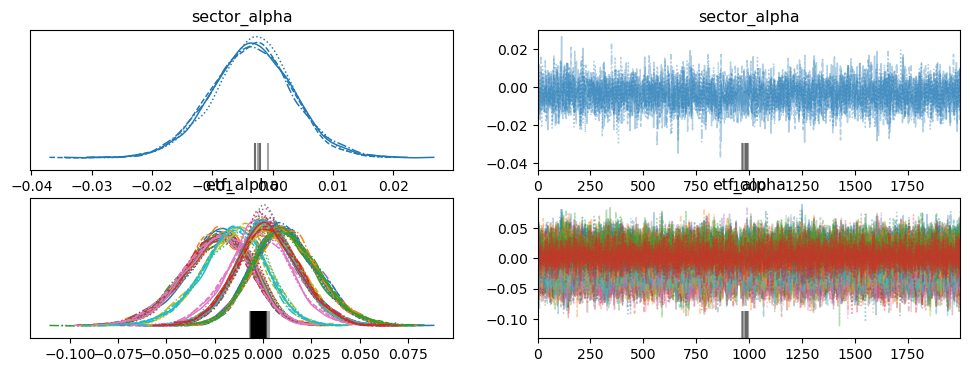

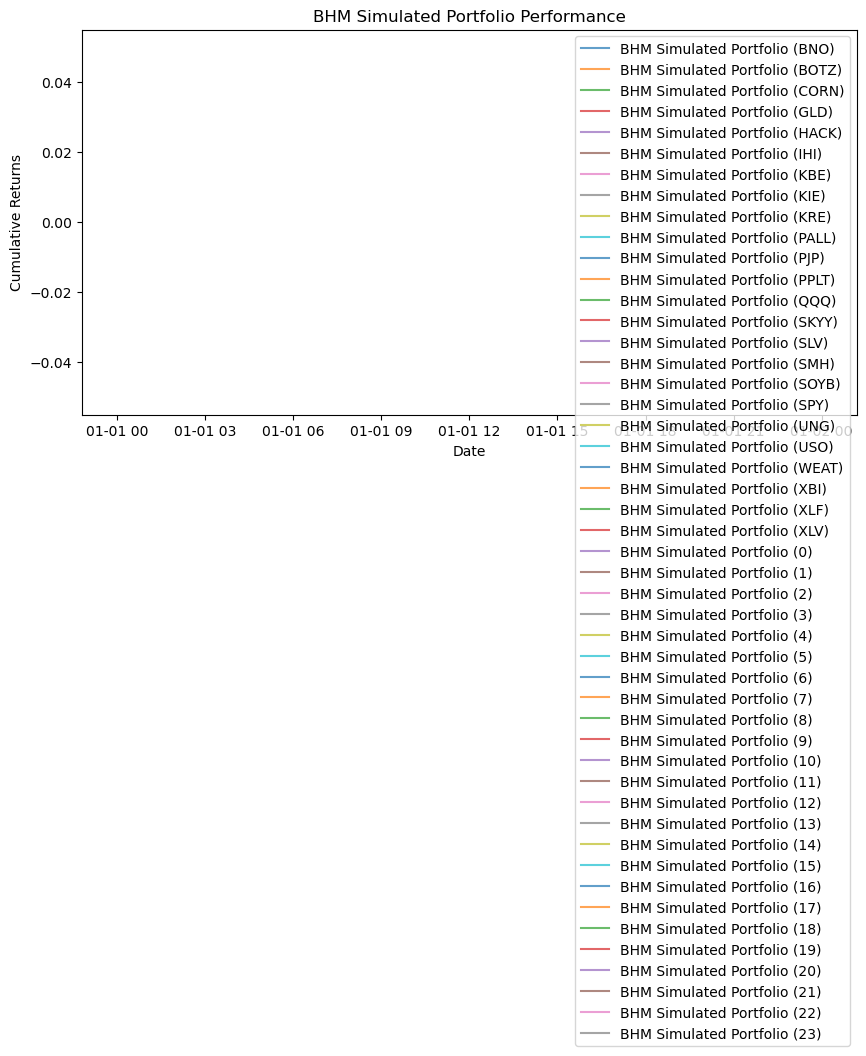

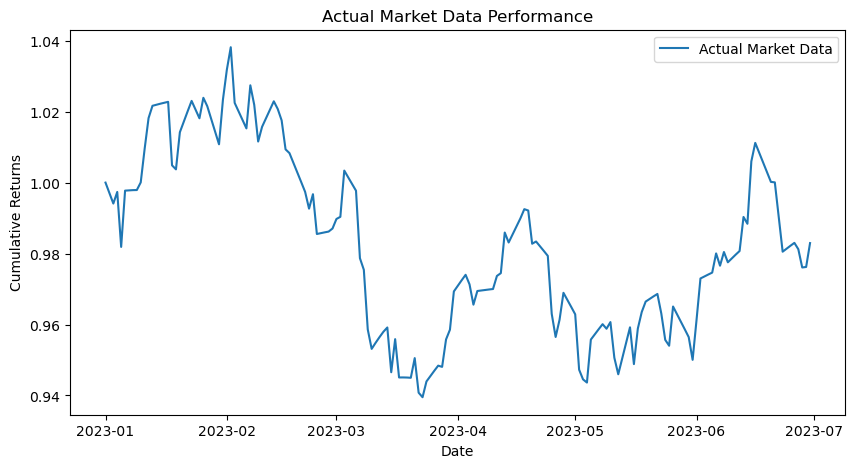

Performance Metrics for BHM Simulated Portfolio:
Total Return: nan%
Sharpe Ratio: nan
Max Drawdown: nan%

Performance Metrics for Actual Market Data:
Total Return: -1.70%
Sharpe Ratio: -0.06
Max Drawdown: -9.50%


In [12]:
# Assuming 'prices_2023' is your DataFrame with daily prices of all assets for 2023
prices_2023 = testing_data.pivot(index='Date', columns='Ticker', values='Close')

# Calculate expected returns using the Bayesian Hierarchical Model (BHM)
priors_mean = {ticker: combined_views.get(ticker, 0) for ticker in etfs}

with pm.Model() as model:
    # Hyperpriors for sectors
    sector_alpha = pm.Normal('sector_alpha', mu=0, sigma=0.5)
    sector_sigma = pm.HalfNormal('sector_sigma', sigma=0.5)
    
    # ETF-specific parameters
    etf_alpha = pm.Normal('etf_alpha', mu=sector_alpha, sigma=sector_sigma, shape=len(etfs))
    
    # Implementing views as priors
    mu = etf_alpha + np.array([priors_mean[ticker] for ticker in etfs])

    # Capture the observed data
    returns = []
    for idx, ticker in enumerate(etfs):
        returns.append(prices_all[ticker].pct_change().dropna().values)
        pm.Normal(ticker, mu=mu[idx], observed=returns[idx])
        
    # Sample
    trace = pm.sample(2000, tune=1000, target_accept=0.99)

# ... (Previous code remains the same)

# Visualizing the results
az.plot_trace(trace, var_names=['sector_alpha', 'etf_alpha'])
plt.show()

# Extract etf_alpha samples from trace
etf_alpha_samples = trace.posterior['etf_alpha'].values.reshape(-1, len(etfs))

# Recreating 'mu' values from the samples
mu_samples = etf_alpha_samples + np.array([priors_mean[ticker] for ticker in etfs])

# Calculate the mean of posterior returns as expected returns
expected_returns_bhm = np.mean(mu_samples, axis=0)

# Portfolio Construction for 2023 using the mean of posterior returns
portfolio_returns_2023_bhm = prices_2023.pct_change() * pd.Series(expected_returns_bhm)

# Calculate cumulative returns for BHM simulated portfolio
cumulative_returns_2023_bhm = (1 + portfolio_returns_2023_bhm).cumprod()

# Visualization for BHM Simulated Portfolio
plt.figure(figsize=(10, 5))

# Plot BHM simulated portfolio returns for all tickers
for ticker in cumulative_returns_2023_bhm.columns:
    plt.plot(cumulative_returns_2023_bhm[ticker], label=f"BHM Simulated Portfolio ({ticker})", alpha=0.7)

plt.title("BHM Simulated Portfolio Performance")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()

# Portfolio Construction for 2023 for actual market data using equal weights
equal_weights = 1 / len(etfs)
actual_returns_2023 = prices_2023.pct_change() * equal_weights

# Calculate cumulative returns for actual market data
cumulative_returns_2023_actual = (1 + actual_returns_2023.sum(axis=1)).cumprod()

# Visualization
plt.figure(figsize=(10, 5))
plt.plot(cumulative_returns_2023_actual, label="Actual Market Data")
plt.title("Actual Market Data Performance")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()

# Calculate performance metrics for BHM simulated portfolio
total_return_bhm = cumulative_returns_2023_bhm.iloc[-1] - 1
sharpe_ratio_bhm = portfolio_returns_2023_bhm.mean().mean() / portfolio_returns_2023_bhm.mean().std()
max_drawdown_bhm = (cumulative_returns_2023_bhm / cumulative_returns_2023_bhm.cummax() - 1).min()

# Print performance metrics for BHM simulated portfolio
print("Performance Metrics for BHM Simulated Portfolio:")
print(f"Total Return: {total_return_bhm.mean():.2%}")
print(f"Sharpe Ratio: {sharpe_ratio_bhm:.2f}")
print(f"Max Drawdown: {max_drawdown_bhm.mean():.2%}")

# Calculate performance metrics for actual market data
total_return_actual = cumulative_returns_2023_actual.iloc[-1] - 1
sharpe_ratio_actual = actual_returns_2023.mean().mean() / actual_returns_2023.mean().std()
max_drawdown_actual = (cumulative_returns_2023_actual / cumulative_returns_2023_actual.cummax() - 1).min()

print("\nPerformance Metrics for Actual Market Data:")
print(f"Total Return: {total_return_actual:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio_actual:.2f}")
print(f"Max Drawdown: {max_drawdown_actual:.2%}")

In [19]:
# print(prices_2023.head())
# print(df.head())
# print(cumulative_returns_2023_bhm.head())
print(" printing prices_2023.columns")
print(prices_2023.columns)
print("cumulative_returns_2023_bhm.columns")
print(cumulative_returns_2023_bhm.columns)
print("printing expected_returns_bhm ")
print(expected_returns_bhm)
print("printing portfolio_returns_2023_bhm.head() ")
print(portfolio_returns_2023_bhm.head())

 printing prices_2023.columns
Index(['BNO', 'BOTZ', 'CORN', 'GLD', 'HACK', 'IHI', 'KBE', 'KIE', 'KRE',
       'PALL', 'PJP', 'PPLT', 'QQQ', 'SKYY', 'SLV', 'SMH', 'SOYB', 'SPY',
       'UNG', 'USO', 'WEAT', 'XBI', 'XLF', 'XLV'],
      dtype='object', name='Ticker')
cumulative_returns_2023_bhm.columns
Index([ 'BNO', 'BOTZ', 'CORN',  'GLD', 'HACK',  'IHI',  'KBE',  'KIE',  'KRE',
       'PALL',  'PJP', 'PPLT',  'QQQ', 'SKYY',  'SLV',  'SMH', 'SOYB',  'SPY',
        'UNG',  'USO', 'WEAT',  'XBI',  'XLF',  'XLV',      0,      1,      2,
            3,      4,      5,      6,      7,      8,      9,     10,     11,
           12,     13,     14,     15,     16,     17,     18,     19,     20,
           21,     22,     23],
      dtype='object')
printing expected_returns_bhm 
[ 0.02593544  0.02584625  0.02587601  0.02565486 -0.01824031  0.02568869
  0.02571787 -0.00744357  0.01464033  0.01440139 -0.01820926 -0.00723909
 -0.018413   -0.00732465 -0.00723052 -0.00752081 -0.0017744  -0.00734408


In [20]:
print(len(expected_returns_bhm))
print(len(etfs))

24
24


In [ ]:
print(" df.head()")
print(df.head(1))
print("testing_data.head()")
print(testing_data.head(1))
print("prices_all.head()")
print(prices_all.head(1))
print("prices_2023.head()")
print(prices_2023.head(1))

In [36]:
print(df.info())
print(testing_data.info())
print(prices_all.info())
print(prices_2023.info())
print(prices_2023.pct_change().info())
print(expected_returns_bhm)
print(prices_2023.info())

<class 'pandas.core.frame.DataFrame'>
Index: 43824 entries, 0 to 43823
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           43824 non-null  datetime64[ns]
 1   Open           43824 non-null  float64       
 2   High           43824 non-null  float64       
 3   Low            43824 non-null  float64       
 4   Close          43824 non-null  float64       
 5   Adj Close      43824 non-null  float64       
 6   Volume         43824 non-null  float64       
 7   Sector         43824 non-null  object        
 8   Ticker         43824 non-null  object        
 9   log_return     43824 non-null  float64       
 10  daily_return   43824 non-null  float64       
 11  volatility     43824 non-null  float64       
 12  momentum       43824 non-null  float64       
 13  Direction      43824 non-null  int64         
 14  MA_50          43824 non-null  float64       
 15  MA_100         43824 non

In [24]:
print(prices_2023.pct_change())
print(expected_returns_bhm)
print(prices_2023.info())

Ticker           BNO      BOTZ      CORN       GLD      HACK       IHI  \
Date                                                                     
2023-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
2023-01-02 -0.010377  0.001214 -0.002801  0.002084 -0.000625  0.000238   
2023-01-03 -0.010486  0.001212 -0.002808  0.002080 -0.000625  0.000238   
2023-01-04 -0.053078  0.015012 -0.019527  0.009412  0.003869  0.019194   
2023-01-05  0.007396 -0.014790 -0.006894 -0.012451 -0.032872 -0.006153   
...              ...       ...       ...       ...       ...       ...   
2023-06-26  0.001857 -0.002157  0.001694  0.000579 -0.001361 -0.001504   
2023-06-27 -0.026211  0.015130 -0.042155 -0.004594  0.017576 -0.002169   
2023-06-28  0.017944  0.008162 -0.032600 -0.002307  0.001406  0.001992   
2023-06-29  0.008814 -0.003872 -0.013901 -0.001072  0.005616  0.007231   
2023-06-30  0.011517  0.015548 -0.052114  0.006663  0.008775  0.013281   

Ticker           KBE       KIE       

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sector_alpha, sector_sigma, etf_alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 289 seconds.


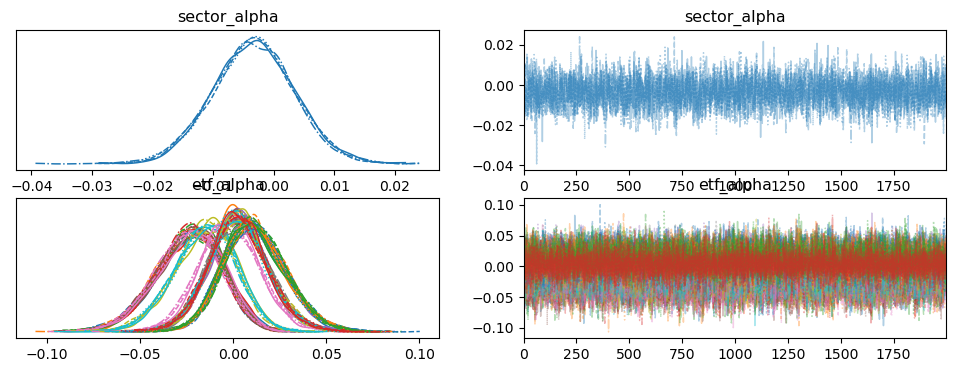

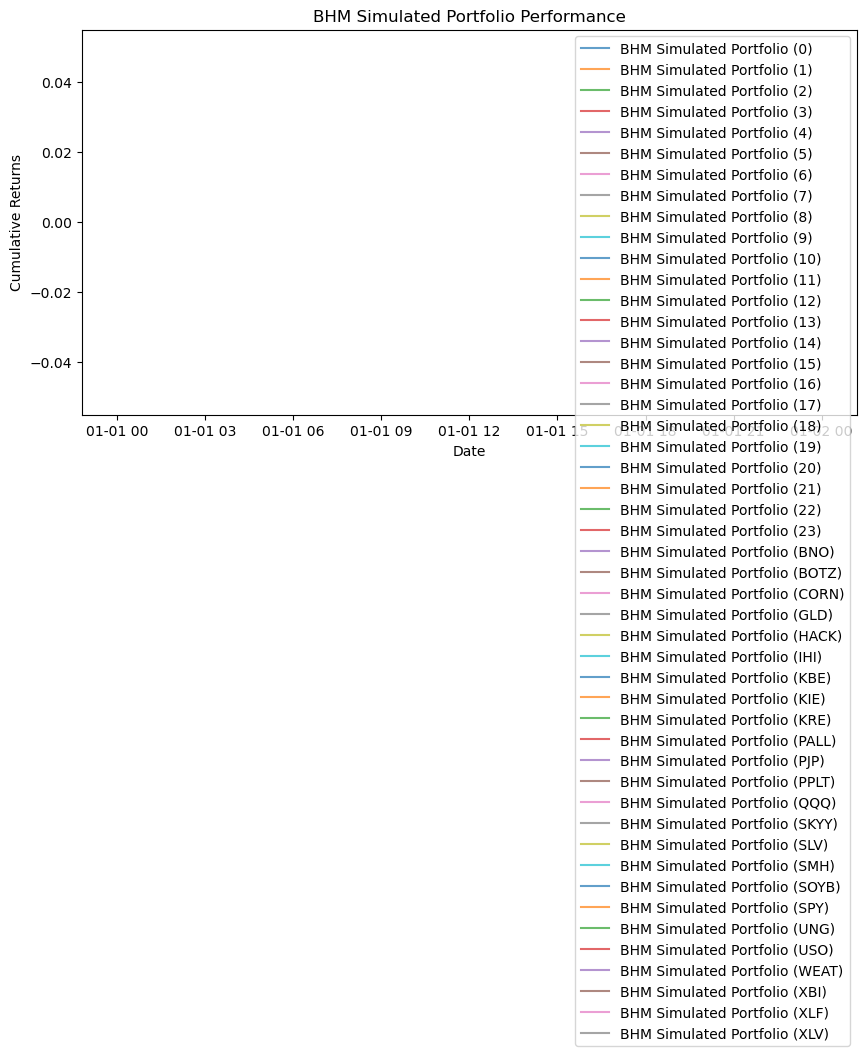

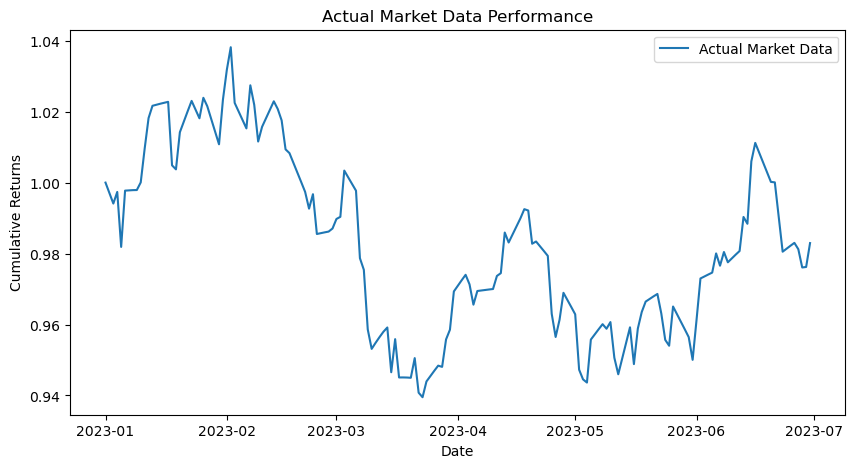

Performance Metrics for BHM Simulated Portfolio:
Total Return: nan%
Sharpe Ratio: nan
Max Drawdown: nan%

Performance Metrics for Actual Market Data:
Total Return: -1.70%
Sharpe Ratio: -0.06
Max Drawdown: -9.50%


In [37]:
# Assuming 'prices_2023' is your DataFrame with daily prices of all assets for 2023
prices_2023 = testing_data.pivot(index='Date', columns='Ticker', values='Close')

# Calculate expected returns using the Bayesian Hierarchical Model (BHM)
priors_mean = {ticker: combined_views.get(ticker, 0) for ticker in etfs}

with pm.Model() as model:
    # Hyperpriors for sectors
    sector_alpha = pm.Normal('sector_alpha', mu=0, sigma=0.5)
    sector_sigma = pm.HalfNormal('sector_sigma', sigma=0.5)
    
    # ETF-specific parameters
    etf_alpha = pm.Normal('etf_alpha', mu=sector_alpha, sigma=sector_sigma, shape=len(etfs))
    
    # Implementing views as priors
    mu = etf_alpha + np.array([priors_mean[ticker] for ticker in etfs])

    # Capture the observed data
    returns = []
    for idx, ticker in enumerate(etfs):
        returns.append(prices_all[ticker].pct_change().dropna().values)
        pm.Normal(ticker, mu=mu[idx], observed=returns[idx])
        
    # Sample
    trace = pm.sample(2000, tune=1000, target_accept=0.99)

# ... (Previous code remains the same)

# Visualizing the results
az.plot_trace(trace, var_names=['sector_alpha', 'etf_alpha'])
plt.show()

# Extract etf_alpha samples from trace
etf_alpha_samples = trace.posterior['etf_alpha'].values.reshape(-1, len(etfs))

# Recreating 'mu' values from the samples
mu_samples = etf_alpha_samples + np.array([priors_mean[ticker] for ticker in etfs])

# Calculate the mean of posterior returns as expected returns
expected_returns_bhm = np.mean(mu_samples, axis=0)

# Portfolio Construction for 2023 using the mean of posterior returns
portfolio_returns_2023_bhm = prices_2023[etfs].pct_change() * pd.Series(expected_returns_bhm)

# Calculate cumulative returns for BHM simulated portfolio
cumulative_returns_2023_bhm = (1 + portfolio_returns_2023_bhm).cumprod()

# Visualization for BHM Simulated Portfolio
plt.figure(figsize=(10, 5))

# Plot BHM simulated portfolio returns for all tickers
for ticker in cumulative_returns_2023_bhm.columns:
    plt.plot(cumulative_returns_2023_bhm[ticker], label=f"BHM Simulated Portfolio ({ticker})", alpha=0.7)

plt.title("BHM Simulated Portfolio Performance")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()

# Portfolio Construction for 2023 for actual market data using equal weights
equal_weights = 1 / len(etfs)
actual_returns_2023 = prices_2023.pct_change() * equal_weights

# Calculate cumulative returns for actual market data
cumulative_returns_2023_actual = (1 + actual_returns_2023.sum(axis=1)).cumprod()

# Visualization
plt.figure(figsize=(10, 5))
plt.plot(cumulative_returns_2023_actual, label="Actual Market Data")
plt.title("Actual Market Data Performance")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()

# Calculate performance metrics for BHM simulated portfolio
total_return_bhm = cumulative_returns_2023_bhm.iloc[-1] - 1
sharpe_ratio_bhm = portfolio_returns_2023_bhm.mean().mean() / portfolio_returns_2023_bhm.mean().std()
max_drawdown_bhm = (cumulative_returns_2023_bhm / cumulative_returns_2023_bhm.cummax() - 1).min()

# Print performance metrics for BHM simulated portfolio
print("Performance Metrics for BHM Simulated Portfolio:")
print(f"Total Return: {total_return_bhm.mean():.2%}")
print(f"Sharpe Ratio: {sharpe_ratio_bhm:.2f}")
print(f"Max Drawdown: {max_drawdown_bhm.mean():.2%}")

# Calculate performance metrics for actual market data
total_return_actual = cumulative_returns_2023_actual.iloc[-1] - 1
sharpe_ratio_actual = actual_returns_2023.mean().mean() / actual_returns_2023.mean().std()
max_drawdown_actual = (cumulative_returns_2023_actual / cumulative_returns_2023_actual.cummax() - 1).min()

print("\nPerformance Metrics for Actual Market Data:")
print(f"Total Return: {total_return_actual:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio_actual:.2f}")
print(f"Max Drawdown: {max_drawdown_actual:.2%}")

In [ ]:
Expanding and working over the data -> 16 - 11 - 2023

In [38]:
# Assuming 'prices_2023' is your DataFrame with daily prices of all assets for 2023
prices_2023 = testing_data.pivot(index='Date', columns='Ticker', values='Close')

# Calculate expected returns using the Bayesian Hierarchical Model (BHM)
priors_mean = {ticker: combined_views.get(ticker, 0) for ticker in etfs}

print(prices_2023.head())
print(priors_mean)

Ticker            BNO       BOTZ       CORN         GLD       HACK        IHI  \
Date                                                                            
2023-01-01  27.705000  20.599999  26.780000  170.349998  43.994999  52.594999   
2023-01-02  27.417500  20.625000  26.704999  170.704998  43.967499  52.607499   
2023-01-03  27.129999  20.650000  26.629999  171.059998  43.939999  52.619999   
2023-01-04  25.690001  20.959999  26.110001  172.669998  44.110001  53.630001   
2023-01-05  25.879999  20.650000  25.930000  170.520004  42.660000  53.299999   

Ticker            KBE        KIE        KRE        PALL  ...        SLV  \
Date                                                     ...              
2023-01-01  45.060001  40.945000  58.535002  161.684998  ...  22.035000   
2023-01-02  45.015001  40.942499  58.432502  159.972496  ...  22.042500   
2023-01-03  44.970001  40.939999  58.330002  158.259995  ...  22.049999   
2023-01-04  45.480000  41.410000  59.119999  166.229996  

In [39]:
with pm.Model() as model:
    # Hyperpriors for sectors
    sector_alpha = pm.Normal('sector_alpha', mu=0, sigma=0.5)
    sector_sigma = pm.HalfNormal('sector_sigma', sigma=0.5)
    
    # ETF-specific parameters
    etf_alpha = pm.Normal('etf_alpha', mu=sector_alpha, sigma=sector_sigma, shape=len(etfs))
    
    # Implementing views as priors
    mu = etf_alpha + np.array([priors_mean[ticker] for ticker in etfs])

    # Capture the observed data
    returns = []
    for idx, ticker in enumerate(etfs):
        returns.append(prices_all[ticker].pct_change().dropna().values)
        pm.Normal(ticker, mu=mu[idx], observed=returns[idx])
        
    # Sample
    trace = pm.sample(2000, tune=1000, target_accept=0.99)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sector_alpha, sector_sigma, etf_alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 227 seconds.


In [41]:
print(trace)

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data


In [42]:
print(returns)

[array([ 0.00118835, -0.00059349, -0.00356291, ..., -0.00258977,
       -0.00111271, -0.00278501]), array([ 0.0009759 ,  0.0038997 , -0.00332971, ..., -0.00105488,
        0.0031679 , -0.0041228 ]), array([ 0.00330033,  0.00164477, -0.00328407, ..., -0.01388891,
        0.02176698, -0.00375939]), array([ 0.00300541, -0.00263685,  0.00512738, ...,  0.00559825,
        0.00467867,  0.00209266]), array([ 0.00698962, -0.00976541,  0.01392248, ...,  0.01140134,
       -0.01520937, -0.01037188]), array([0.00440578, 0.01388118, 0.00722887, ..., 0.04852502, 0.01202855,
       0.0032232 ]), array([ 0.00340451, -0.00246755,  0.00371054, ...,  0.01712958,
        0.00227588,  0.00034059]), array([ 0.00754402, -0.016639  , -0.0406091 , ..., -0.03388706,
       -0.03026132, -0.02340427]), array([ 0.        ,  0.01933704,  0.00162595, ...,  0.00072729,
        0.02761629, -0.01016621]), array([ 0.00124429,  0.02236955,  0.0024311 , ..., -0.00072912,
        0.02305562, -0.00880759]), array([ 0.00068

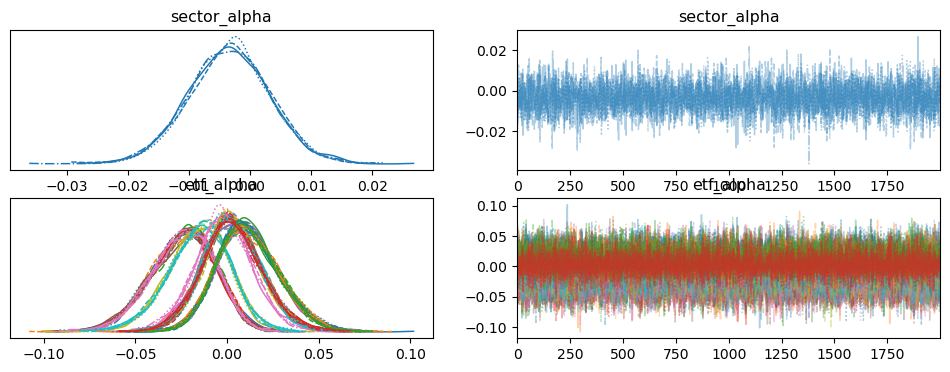

In [43]:
# ... (Previous code remains the same)

# Visualizing the results
az.plot_trace(trace, var_names=['sector_alpha', 'etf_alpha'])
plt.show()

In [47]:
# Extract etf_alpha samples from trace
etf_alpha_samples = trace.posterior['etf_alpha'].values.reshape(-1, len(etfs))
print(etf_alpha_samples)
print(len(etf_alpha_samples))

[[-3.39692775e-02 -1.82499108e-02 -4.22916433e-02 ...  3.51491456e-02
  -3.48210135e-03  8.23903838e-03]
 [-3.84656822e-02 -1.79526556e-02 -2.88285727e-02 ...  2.81903955e-02
   2.79350994e-02  8.06962628e-03]
 [-2.06669902e-02 -4.84358492e-02 -3.80364312e-02 ...  1.35429312e-03
  -1.07971335e-03  2.29446160e-03]
 ...
 [-3.17762464e-02  5.86024440e-03  1.92651291e-05 ...  1.50808414e-02
  -2.07754859e-03  7.84574319e-03]
 [-8.38012499e-03 -3.06898393e-02 -4.93705816e-02 ...  1.46561614e-02
  -4.85431680e-03 -9.82865876e-03]
 [ 3.68360450e-04 -5.36048872e-02 -4.70496199e-02 ...  1.48426586e-02
  -2.79862847e-02 -9.22840888e-03]]
8000


In [48]:
# Recreating 'mu' values from the samples
mu_samples = etf_alpha_samples + np.array([priors_mean[ticker] for ticker in etfs])
print(mu_samples)
print(len(mu_samples))

[[ 0.01603072  0.03175009  0.00770836 ...  0.00514915 -0.0334821
  -0.00176096]
 [ 0.01153432  0.03204734  0.02117143 ... -0.0018096  -0.0020649
  -0.00193037]
 [ 0.02933301  0.00156415  0.01196357 ... -0.02864571 -0.03107971
  -0.00770554]
 ...
 [ 0.01822375  0.05586024  0.05001927 ... -0.01491916 -0.03207755
  -0.00215426]
 [ 0.04161988  0.01931016  0.00062942 ... -0.01534384 -0.03485432
  -0.01982866]
 [ 0.05036836 -0.00360489  0.00295038 ... -0.01515734 -0.05798628
  -0.01922841]]
8000


In [51]:
# Calculate the mean of posterior returns as expected returns
expected_returns_bhm = np.mean(mu_samples, axis=0)
print(expected_returns_bhm)
print(len(expected_returns_bhm))
print('1 row * 24 columns')

[ 0.02588606  0.02596443  0.02579982  0.02589087 -0.01808532  0.02563605
  0.02605926 -0.00735336  0.01479101  0.01472299 -0.01837034 -0.00749145
 -0.01844219 -0.00738845 -0.00706784 -0.00711597 -0.00181512 -0.00718211
 -0.00733183 -0.00756968 -0.0184855  -0.01842982 -0.01844726 -0.00714207]
24
1 row * 24 columns


In [63]:
# Portfolio Construction for 2023 using the mean of posterior returns
# may be column name must match to multiply
"""
my_series_reshaped = my_series.to_frame()
"""
portfolio_returns_2023_bhm = prices_2023[etfs].pct_change() * pd.Series(expected_returns_bhm).to_frame()
print(prices_2023[etfs])
print("above is [181 rows * 24 columns] -> prices_2023[etfs]")
print(prices_2023[etfs].pct_change())
print("above is [181 rows * 24 columns] -> print(prices_2023[etfs].pct_change()) ")

Ticker           CORN       SOYB  WEAT         GLD        PALL        PPLT  \
Date                                                                         
2023-01-01  26.780000  28.265000  7.92  170.349998  161.684998   99.919998   
2023-01-02  26.704999  28.147501  7.89  170.704998  159.972496  100.239998   
2023-01-03  26.629999  28.030001  7.86  171.059998  158.259995  100.559998   
2023-01-04  26.110001  27.830000  7.55  172.669998  166.229996  100.050003   
2023-01-05  25.930000  27.660000  7.55  170.520004  161.610001   98.260002   
...               ...        ...   ...         ...         ...         ...   
2023-06-26  25.620001  27.430000  7.21  178.509995  120.400002   85.639999   
2023-06-27  24.540001  26.910000  6.86  177.690002  120.120003   85.519997   
2023-06-28  23.740000  26.299999  6.60  177.279999  116.360001   84.459999   
2023-06-29  23.410000  26.270000  6.59  177.089996  113.529999   82.940002   
2023-06-30  22.190001  27.320000  6.44  178.270004  113.779999  

In [71]:
print(pd.Series(expected_returns_bhm)) 
print(pd.Series(expected_returns_bhm).shape)
print(pd.Series(expected_returns_bhm).shape[0]) # no.of rows
print(pd.Series(expected_returns_bhm).info()) 
print( "expected_returns_bhm is 24 rows * 1 column")   
print(portfolio_returns_2023_bhm)
print(portfolio_returns_2023_bhm.columns)
# print(expected_returns_bhm.columns)
print(prices_2023[etfs].pct_change().columns)

0     0.025886
1     0.025964
2     0.025800
3     0.025891
4    -0.018085
5     0.025636
6     0.026059
7    -0.007353
8     0.014791
9     0.014723
10   -0.018370
11   -0.007491
12   -0.018442
13   -0.007388
14   -0.007068
15   -0.007116
16   -0.001815
17   -0.007182
18   -0.007332
19   -0.007570
20   -0.018486
21   -0.018430
22   -0.018447
23   -0.007142
dtype: float64
(24,)
24
<class 'pandas.core.series.Series'>
RangeIndex: 24 entries, 0 to 23
Series name: None
Non-Null Count  Dtype  
--------------  -----  
24 non-null     float64
dtypes: float64(1)
memory usage: 324.0 bytes
None
expected_returns_bhm is 24 rows * 1 column
                      0  BNO  BOTZ  CORN  GLD  HACK  IHI  KBE  KIE  KRE  ...  \
2023-01-01 00:00:00 NaN  NaN   NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  ...   
2023-01-02 00:00:00 NaN  NaN   NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  ...   
2023-01-03 00:00:00 NaN  NaN   NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  ...   
2023-01-04 00:00:00 NaN  NaN   NaN   NaN  NaN

In [105]:
# Update in calculating
# Assuming 'prices_2023' is your DataFrame with daily prices of all assets for 2023
# Assuming 'etfs' is the list of tickers

# Portfolio Construction for 2023 using the mean of posterior returns
portfolio_returns_2023_bhm = prices_2023[etfs].pct_change() * pd.Series(expected_returns_bhm).values.reshape(1, -1)
print(prices_2023[etfs].pct_change().shape)
print(pd.Series(expected_returns_bhm).shape)
print(portfolio_returns_2023_bhm.shape)

(181, 24)
(24,)
(181, 24)


In [106]:
# Calculate cumulative returns for BHM simulated portfolio
cumulative_returns_2023_bhm = (1 + portfolio_returns_2023_bhm).cumprod()
print(cumulative_returns_2023_bhm.shape)

(181, 24)


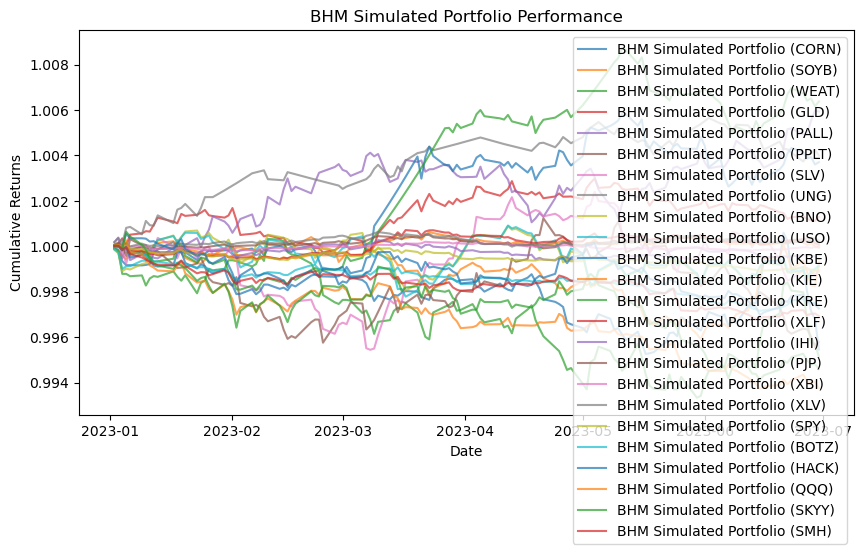

In [107]:
# Visualization for BHM Simulated Portfolio
plt.figure(figsize=(10, 5))

# Plot BHM simulated portfolio returns for all tickers
for ticker in cumulative_returns_2023_bhm.columns:
    plt.plot(cumulative_returns_2023_bhm[ticker], label=f"BHM Simulated Portfolio ({ticker})", alpha=0.7)

plt.title("BHM Simulated Portfolio Performance")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()

In [108]:
# Calculate performance metrics for BHM simulated portfolio
total_return_bhm = cumulative_returns_2023_bhm.iloc[-1] - 1
sharpe_ratio_bhm = portfolio_returns_2023_bhm.mean().mean() / portfolio_returns_2023_bhm.mean().std()
max_drawdown_bhm = (cumulative_returns_2023_bhm / cumulative_returns_2023_bhm.cummax() - 1).min()

# Print performance metrics for BHM simulated portfolio
print("Performance Metrics for BHM Simulated Portfolio:")
print(f"Total Return: {total_return_bhm.mean():.2%}")
print(f"Sharpe Ratio: {sharpe_ratio_bhm:.2f}")
print(f"Max Drawdown: {max_drawdown_bhm.mean():.2%}")

Performance Metrics for BHM Simulated Portfolio:
Total Return: -0.07%
Sharpe Ratio: -0.22
Max Drawdown: -0.31%


In [109]:
# Portfolio Construction for 2023 for actual market data using equal weights
equal_weights = 1 / len(etfs)
actual_returns_2023 = prices_2023.pct_change() * equal_weights

# Calculate cumulative returns for actual market data
cumulative_returns_2023_actual = (1 + actual_returns_2023.sum(axis=1)).cumprod()

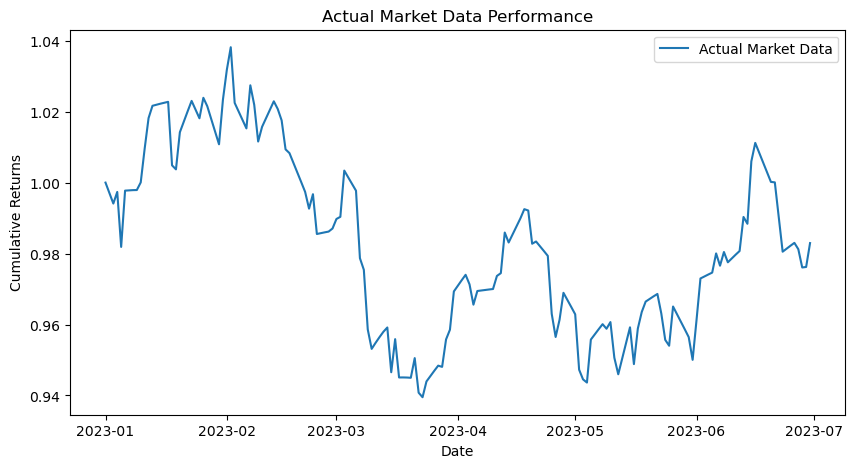


Performance Metrics for Actual Market Data:
Total Return: -1.70%
Sharpe Ratio: -0.06
Max Drawdown: -9.50%


In [110]:
# Visualization
plt.figure(figsize=(10, 5))
plt.plot(cumulative_returns_2023_actual, label="Actual Market Data")
plt.title("Actual Market Data Performance")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()

# Calculate performance metrics for actual market data
total_return_actual = cumulative_returns_2023_actual.iloc[-1] - 1
sharpe_ratio_actual = actual_returns_2023.mean().mean() / actual_returns_2023.mean().std()
max_drawdown_actual = (cumulative_returns_2023_actual / cumulative_returns_2023_actual.cummax() - 1).min()

print("\nPerformance Metrics for Actual Market Data:")
print(f"Total Return: {total_return_actual:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio_actual:.2f}")
print(f"Max Drawdown: {max_drawdown_actual:.2%}")

In [66]:
print(len(etfs))
print(etfs)

24
['CORN', 'SOYB', 'WEAT', 'GLD', 'PALL', 'PPLT', 'SLV', 'UNG', 'BNO', 'USO', 'KBE', 'KIE', 'KRE', 'XLF', 'IHI', 'PJP', 'XBI', 'XLV', 'SPY', 'BOTZ', 'HACK', 'QQQ', 'SKYY', 'SMH']
